# 1. Perkenalan 

**Nama : Dimas Furqon P.** 
**Kelas : Data Science Delta Indie Course**

**Nama Project : Final Project 2.**



# 2. Latar Belakang

## 2.a Data Overview

Mental Health Diagnosis and Treatment Monitoring Dataset adalah data yang berisi dari 500 baris yang mewakili kesehatan mental berdasarkan hasil diagnosis kesehatan mental dari kejadian nyata, rencana perawatan, dan hasil. Termasuk didalamnya demografi pasien, keparahan gejala, pengobatan, tipe terapi dan jejak peningkatan. **Dataset ini bersifat sintetis dan dibuat untuk penelitian dan tujuan analitis**


Beberapa variabel yang terdapat dalam dataset ini dan dapat dianalisis antara lain: 

1. **Patient ID**: Identitas unik pasien
2. **Age**: Usia Pasien
3. **Gender**: Laki-laki atau perempuan
4. **Diagnosis**: Kondisi Mental Health (e.g., Anxiety, Depression).
5. **Symptom Severity (1-10)**: Keparahan gejala (skala 1-10).
6. **Mood Score (1-10)**: Kondisi mood pada saat perawatan (skala 1-10).
7. **Sleep Quality (1-10)**: Kualitas tidur pasien yang dilaporkan(skala 1-10).
8. **Physical Activity**: Aktifitas(jam) dalam 1 pekan.
9. **Medication**: Pengobatan/obat yang diberikan(e.g., SSRIs, Antidepressants).
10. **Therapy Type**: Jenis terapi (e.g., CBT, DBT).
11. **Treatment Start Date**: Tanggal mulai perawatan.
12. **Treatment Duration**: Durasi perawatan dalam sepekan.
13. **Stress Level (1-10)**: Level Stres pasien.
14. **Outcome**: Hasil perawatan (e.g., Improved, Deteriorated).
15. **Treatment Progress (1-10)**: Perkembangan selama perawatan.
16. **AI-Detected Emotional State**: Kondisi emosional berdasarkan deteksi AI (e.g., Happy, Anxious).
17. **Adherence to Treatment (%)**: Persentase kepatuhan terhadap perawatan.

Kasus yang dapat digunakan

- **Klasifikasi Diagnosis**: Mengklasifikasikan pasien berdasarkan kondisi mental health mereka.
- **Prediksi Hasil**: Memprediksi "Outcomes" berdasarkan data pasien.
- **Monitoring tingkat kepatuhan**: Melakukan analisis kepatuhan pasien dan efeknya terhadap "Outcomes".
- **Deteksi Kondisi Emosional**: Menggunakan AI untuk mendeteksi jejak kondisi emosional.
- **Kemanjuran perawatan**: Evaluate the impact of different therapies on progress.
- 
Ethical Considerations
Ensure that patient data is anonymized, and models are tested for fairness and bias in their predictions. This dataset is synthetic and does not represent real patient information.

## 2.b Data Objective

Final Project 2 ini dibuat guna mengevaluasi konsep Machine Learning bertipe Klasifikasi dengan :

● Mampu memahami konsep Regression dan mampu persiapkan data untuk digunakan dengan Ensemble Model

● Mampu melakukan seleksi model terbaik

● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# 3. Import Pustaka (Library)

In [9]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pandas-dq

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [12]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from imblearn.over_sampling import SMOTE #Balancing data
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from pandas_dq import dq_report,Fix_DQ

# 4. Data Loading

## 4.1 Memanggil Dataset

In [15]:
df = pd.read_csv("mental_health_diagnosis_treatment_.csv")
df.head(10)

Patient ID  Age  Gender         Diagnosis           \
0       1      43   Female  Major Depressive Disorder   
1       2      40   Female  Major Depressive Disorder   
2       3      55   Female  Major Depressive Disorder   
3       4      34   Female  Major Depressive Disorder   
4       5      52     Male             Panic Disorder   
5       6      28     Male             Panic Disorder   
6       7      59     Male        Generalized Anxiety   
7       8      32   Female  Major Depressive Disorder   
8       9      21   Female  Major Depressive Disorder   
9      10      21   Female             Panic Disorder   

   Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0            10                     5                    8            
1             9                     5                    4            
2             6                     3                    4            
3             6                     3                    6            
4             7                     6                    6            
5             8                     7                    6            
6             6                     6                    5            
7             5                     3                    5            
8             6                     7                    7            
9             9                     5                    9            

   Physical Activity (hrs/week)     Medication     \
0                5               Mood Stabilizers   
1                7                 Antipsychotics   
2                3                          SSRIs   
3                5                          SSRIs   
4                8                    Anxiolytics   
5                4                          SSRIs   
6                3               Mood Stabilizers   
7                2                Antidepressants   
8               10                Antidepressants   
9                7                Antidepressants   

            Therapy Type          Treatment Start Date  \
0           Interpersonal Therapy      2024-01-25        
1           Interpersonal Therapy      2024-02-27        
2       Mindfulness-Based Therapy      2024-03-20        
3       Mindfulness-Based Therapy      2024-03-29        
4           Interpersonal Therapy      2024-03-18        
5    Cognitive Behavioral Therapy      2024-01-11        
6  Dialectical Behavioral Therapy      2024-02-21        
7    Cognitive Behavioral Therapy      2024-02-03        
8       Mindfulness-Based Therapy      2024-01-16        
9    Cognitive Behavioral Therapy      2024-01-03        

   Treatment Duration (weeks)  Stress Level (1-10)    Outcome     \
0              11                       9           Deteriorated   
1              11                       7              No Change   
2              14                       7           Deteriorated   
3               8                       8           Deteriorated   
4              12                       5           Deteriorated   
5              13                       9              No Change   
6              13                       8           Deteriorated   
7              12                       5              No Change   
8              15                       5              No Change   
9              11                       8              No Change   

   Treatment Progress (1-10) AI-Detected Emotional State  \
0              7                         Anxious           
1              7                         Neutral           
2              5                           Happy           
3             10                         Excited           
4              6                         Excited           
5              7                        Stressed           
6              5                         Anxious           
7              6                        Stressed           
8              6                         Neutral           
9              8     

## 4.2 Melihat ukuran/dimensi data (baris,kolom)

In [17]:
df.shape

(500, 17)

## 4.3 Pengecekan nama kolom 

In [19]:
da = df.columns.values
da
dc = pd.DataFrame({'Nama kolom':da})
dc

Nama kolom         
0                     Patient ID
1                            Age
2                         Gender
3                      Diagnosis
4        Symptom Severity (1-10)
5              Mood Score (1-10)
6           Sleep Quality (1-10)
7   Physical Activity (hrs/week)
8                     Medication
9                   Therapy Type
10          Treatment Start Date
11    Treatment Duration (weeks)
12           Stress Level (1-10)
13                       Outcome
14     Treatment Progress (1-10)
15   AI-Detected Emotional State
16    Adherence to Treatment (%)

## 4.4 Penjelasan per kolom

In [21]:
import pandas as pd

# Define the data
data = {
    "Key Features": [
        "Patient ID",
        "Age",
        "Gender",
        "Diagnosis",
        "Symptom Severity (1-10)",
        "Mood Score (1-10)",
        "Sleep Quality (1-10)",
        "Physical Activity",
        "Medication",
        "Therapy Type",
        "Treatment Start Date",
        "Treatment Duration",
        "Stress Level (1-10)",
        "Outcome",
        "Treatment Progress (1-10)",
        "AI-Detected Emotional State",
        "Adherence to Treatment (%)"
    ],
    "Explanation": [
        "Identitas unik pasien",
        "Usia Pasien",
        "Laki-laki atau perempuan",
        "Kondisi Mental Health (e.g., Anxiety, Depression)",
        "Keparahan gejala (skala 1-10)",
        "Kondisi mood pada saat perawatan (skala 1-10)",
        "Kualitas tidur pasien yang dilaporkan (skala 1-10)",
        "Aktifitas (jam) dalam 1 pekan",
        "Pengobatan/obat yang diberikan (e.g., SSRIs, Antidepressants)",
        "Jenis terapi (e.g., CBT, DBT)",
        "Tanggal mulai perawatan",
        "Durasi perawatan dalam sepekan",
        "Level Stres pasien",
        "Hasil perawatan (e.g., Improved, Deteriorated)",
        "Perkembangan selama perawatan (skala 1-10)",
        "Kondisi emosional berdasarkan deteksi AI (e.g., Happy, Anxious)",
        "Persentase kepatuhan terhadap perawatan"
    ]
}

# Create the DataFrame with an index column
penjelasan = pd.DataFrame(data)
penjelasan.index += 1  # Add an index starting from 1

# Display the DataFrame
penjelasan



Key Features          \
1                    Patient ID   
2                           Age   
3                        Gender   
4                     Diagnosis   
5       Symptom Severity (1-10)   
6             Mood Score (1-10)   
7          Sleep Quality (1-10)   
8             Physical Activity   
9                    Medication   
10                 Therapy Type   
11         Treatment Start Date   
12           Treatment Duration   
13          Stress Level (1-10)   
14                      Outcome   
15    Treatment Progress (1-10)   
16  AI-Detected Emotional State   
17   Adherence to Treatment (%)   

                             Explanation                             
1                                             Identitas unik pasien  
2                                                       Usia Pasien  
3                                          Laki-laki atau perempuan  
4                 Kondisi Mental Health (e.g., Anxiety, Depression)  
5                                     Keparahan gejala (skala 1-10)  
6                     Kondisi mood pada saat perawatan (skala 1-10)  
7                Kualitas tidur pasien yang dilaporkan (skala 1-10)  
8                                     Aktifitas (jam) dalam 1 pekan  
9     Pengobatan/obat yang diberikan (e.g., SSRIs, Antidepressants)  
10                                    Jenis terapi (e.g., CBT, DBT)  
11                                          Tanggal mulai perawatan  
12                                   Durasi perawatan dalam sepekan  
13                                               Level Stres pasien  
14                   Hasil perawatan (e.g., Improved, Deteriorated)  
15                       Perkembangan selama perawatan (skala 1-10)  
16  Kondisi emosional berdasarkan deteksi AI (e.g., Happy, Anxious)  
17                          Persentase kepatuhan terhadap perawatan

## 4.5 Tipe Data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

## 4.6 Deskriptif Statistik

In [25]:
df.describe()

Patient ID      Age     Symptom Severity (1-10)  Mood Score (1-10)  \
count  500.000000  500.000000        500.000000            500.000000       
mean   250.500000   38.708000          7.478000              5.482000       
std    144.481833   12.712433          1.706265              1.707486       
min      1.000000   18.000000          5.000000              3.000000       
25%    125.750000   28.000000          6.000000              4.000000       
50%    250.500000   38.000000          8.000000              5.000000       
75%    375.250000   50.000000          9.000000              7.000000       
max    500.000000   60.000000         10.000000              8.000000       

       Sleep Quality (1-10)  Physical Activity (hrs/week)  \
count       500.000000                500.000000            
mean          6.472000                  5.216000            
std           1.668167                  2.829374            
min           4.000000                  1.000000            
25%           5.000000                  3.000000            
50%           6.000000                  5.000000            
75%           8.000000                  8.000000            
max           9.000000                 10.000000            

       Treatment Duration (weeks)  Stress Level (1-10)  \
count          500.000000              500.000000        
mean            12.110000                7.542000        
std              2.440864                1.709409        
min              8.000000                5.000000        
25%             10.000000                6.000000        
50%             12.000000                8.000000        
75%             14.000000                9.000000        
max             16.000000               10.000000        

       Treatment Progress (1-10)  Adherence to Treatment (%)  
count         500.000000                   500.00000          
mean            7.436000                    75.45400          
std             1.725067                     9.08697          
min             5.000000                    60.00000          
25%             6.000000                    67.00000          
50%             7.000000                    76.00000          
75%             9.000000                    84.00000          
max            10.000000                    90.00000

## 4.7 Pengecekan Missing Value 

In [27]:
df.isna().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [28]:
df.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

karena data yang diperoleh dari awal sudah tidak memiliki "missing values" maka kita bisa melewatkan step untuk pembersihan missing value.

## 4.8 Pengecekan data duplikat

In [31]:
df.duplicated().sum()

0

In [32]:
df[df.duplicated()].head()

Empty DataFrame
Columns: [Patient ID, Age, Gender, Diagnosis, Symptom Severity (1-10), Mood Score (1-10), Sleep Quality (1-10), Physical Activity (hrs/week), Medication, Therapy Type, Treatment Start Date, Treatment Duration (weeks), Stress Level (1-10), Outcome, Treatment Progress (1-10), AI-Detected Emotional State, Adherence to Treatment (%)]
Index: []

setelah kita melakukan peninjauan terhadap dataset, terlihat bahwa data yang kita memiliki sudah berstatus "clean" karena tidak memiliki "missing values" dan "duplicate data"

## 4.9 Penggantian nama kolom

Karena nama kolom pada dataframe masih dirasa terlalu panjang maka perlu dilakukan simplifikasi nama pada kolom yang terlalu panjang.

In [36]:
df.columns.values

array(['Patient ID', 'Age', 'Gender', 'Diagnosis',
       'Symptom Severity (1-10)', 'Mood Score (1-10)',
       'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
       'Medication', 'Therapy Type', 'Treatment Start Date',
       'Treatment Duration (weeks)', 'Stress Level (1-10)', 'Outcome',
       'Treatment Progress (1-10)', 'AI-Detected Emotional State',
       'Adherence to Treatment (%)'], dtype=object)

In [37]:
df.rename(columns={'Symptom Severity (1-10)':'symptom',
                   'Mood Score (1-10)':'mood',
                   'Sleep Quality (1-10)':'sleep',
                   'Physical Activity (hrs/week)':'physical',
                   'Therapy Type':'Therapy',
                   'Treatment Start Date':'treatment',
                   'Treatment Duration (weeks)':'duration',
                   'Stress Level (1-10)':'stress',
                   'Treatment Progress (1-10)':'progres',
                   'AI-Detected Emotional State':'AIstate',
                   'Adherence to Treatment (%)':'Target'                   
                  },inplace = True )

In [38]:
df.tail()

Patient ID  Age Gender         Diagnosis           symptom  mood  sleep  \
495      496     24   Male         Generalized Anxiety    10       4     8     
496      497     22   Male              Panic Disorder     5       6     6     
497      498     23   Male   Major Depressive Disorder     7       3     4     
498      499     48   Male            Bipolar Disorder     9       4     6     
499      500     58   Male            Bipolar Disorder     5       7     6     

     physical     Medication                Therapy              treatment   \
495      6     Mood Stabilizers  Dialectical Behavioral Therapy  2024-04-09   
496      7      Benzodiazepines       Mindfulness-Based Therapy  2024-02-05   
497      2      Antidepressants    Cognitive Behavioral Therapy  2024-03-24   
498      9      Antidepressants       Mindfulness-Based Therapy  2024-03-22   
499      2                SSRIs    Cognitive Behavioral Therapy  2024-03-24   

     duration  stress    Outcome     progres  AIstate    Target  
495      8        9        Improved    10     Depressed    73    
496     13        6    Deteriorated     8         Happy    86    
497     10        5    Deteriorated     5       Neutral    87    
498     10        6        Improved     7       Anxious    73    
499     10        6    Deteriorated     5         Happy    70

In [39]:
## mengubah format date time pada kolom treatment

df["treatment"] = pd.to_datetime(df["treatment"], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Patient ID  500 non-null    int64         
 1   Age         500 non-null    int64         
 2   Gender      500 non-null    object        
 3   Diagnosis   500 non-null    object        
 4   symptom     500 non-null    int64         
 5   mood        500 non-null    int64         
 6   sleep       500 non-null    int64         
 7   physical    500 non-null    int64         
 8   Medication  500 non-null    object        
 9   Therapy     500 non-null    object        
 10  treatment   500 non-null    datetime64[ns]
 11  duration    500 non-null    int64         
 12  stress      500 non-null    int64         
 13  Outcome     500 non-null    object        
 14  progres     500 non-null    int64         
 15  AIstate     500 non-null    object        
 16  Target      500 non-null  

# 5. Eksplorasi Data Analisis

## 5.1 Statistik Deskriptif

In [42]:
dfc= df.copy()
dfc.describe()

Patient ID      Age       symptom      mood        sleep     physical   \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean   250.500000   38.708000    7.478000    5.482000    6.472000    5.216000   
min      1.000000   18.000000    5.000000    3.000000    4.000000    1.000000   
25%    125.750000   28.000000    6.000000    4.000000    5.000000    3.000000   
50%    250.500000   38.000000    8.000000    5.000000    6.000000    5.000000   
75%    375.250000   50.000000    9.000000    7.000000    8.000000    8.000000   
max    500.000000   60.000000   10.000000    8.000000    9.000000   10.000000   
std    144.481833   12.712433    1.706265    1.707486    1.668167    2.829374   

               treatment            duration     stress      progres   \
count                         500  500.000000  500.000000  500.000000   
mean   2024-02-18 09:53:16.800000   12.110000    7.542000    7.436000   
min           2024-01-01 00:00:00    8.000000    5.000000    5.000000   
25%           2024-01-23 18:00:00   10.000000    6.000000    6.000000   
50%           2024-02-17 00:00:00   12.000000    8.000000    7.000000   
75%           2024-03-17 00:00:00   14.000000    9.000000    9.000000   
max           2024-04-10 00:00:00   16.000000   10.000000   10.000000   
std                           NaN    2.440864    1.709409    1.725067   

        Target    
count  500.00000  
mean    75.45400  
min     60.00000  
25%     67.00000  
50%     76.00000  
75%     84.00000  
max     90.00000  
std      9.08697

In [43]:
# membuat dataset yang berisi kolom numerik 
df_nm = dfc.describe().columns.values

# membuat dataset yang berisi data kategorik (non numerik)
df_kat = dfc.drop(np.array(df_nm), axis=1)

df_n = dfc.drop(np.array(df_kat.columns.values), axis=1) 
df_num = df_n.drop(['Patient ID','treatment'], axis=1)
df_num
df_kat.tail()

Gender         Diagnosis              Medication     \
495  Male         Generalized Anxiety  Mood Stabilizers   
496  Male              Panic Disorder   Benzodiazepines   
497  Male   Major Depressive Disorder   Antidepressants   
498  Male            Bipolar Disorder   Antidepressants   
499  Male            Bipolar Disorder             SSRIs   

                Therapy                Outcome     AIstate    
495  Dialectical Behavioral Therapy      Improved  Depressed  
496       Mindfulness-Based Therapy  Deteriorated      Happy  
497    Cognitive Behavioral Therapy  Deteriorated    Neutral  
498       Mindfulness-Based Therapy      Improved    Anxious  
499    Cognitive Behavioral Therapy  Deteriorated      Happy

In [44]:
pd.DataFrame(df_kat["Gender"].value_counts())

count
Gender       
Male     266 
Female   234

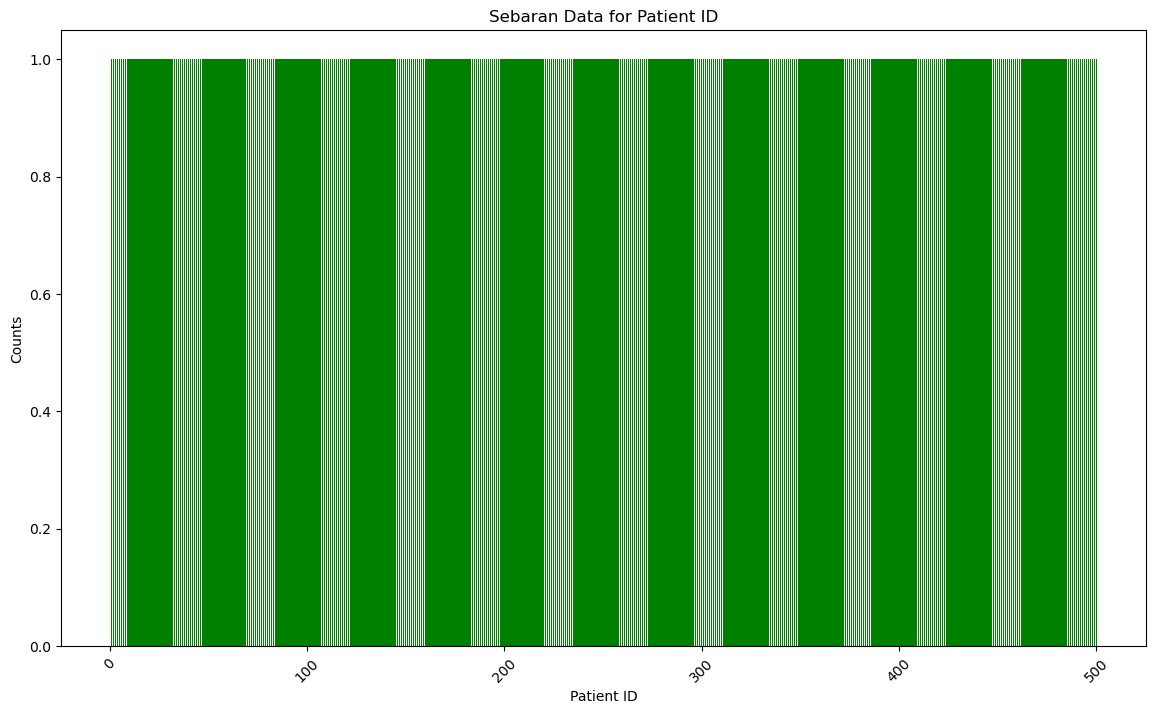

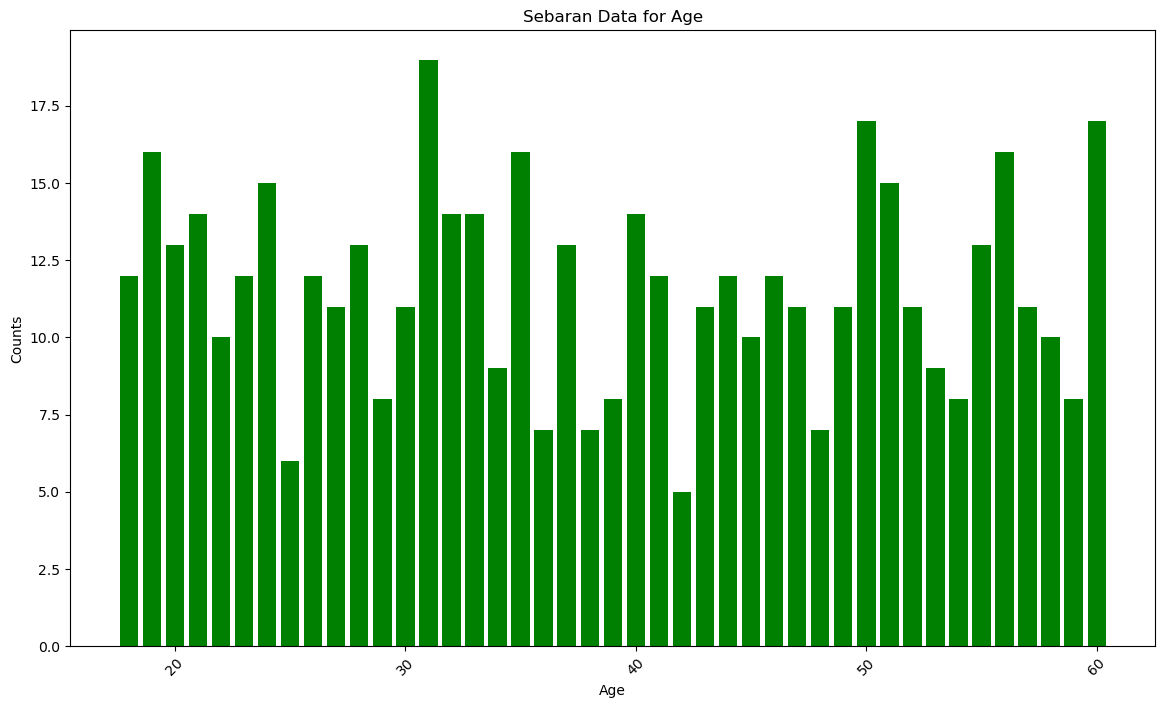

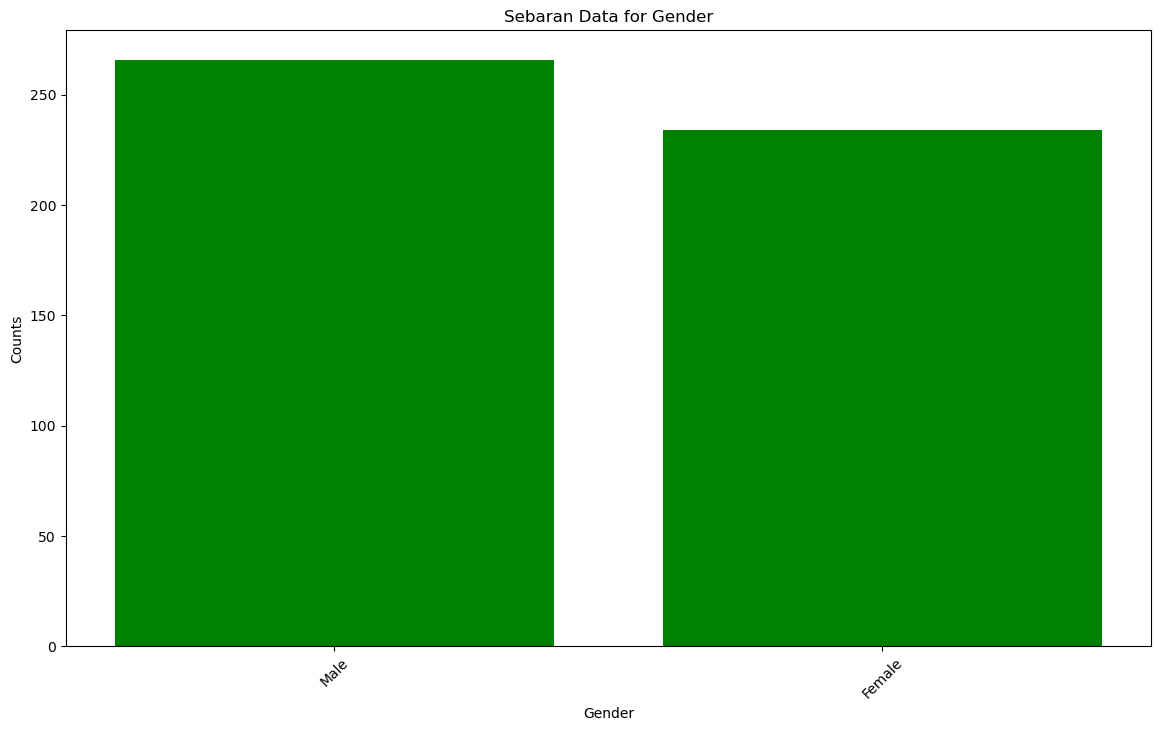

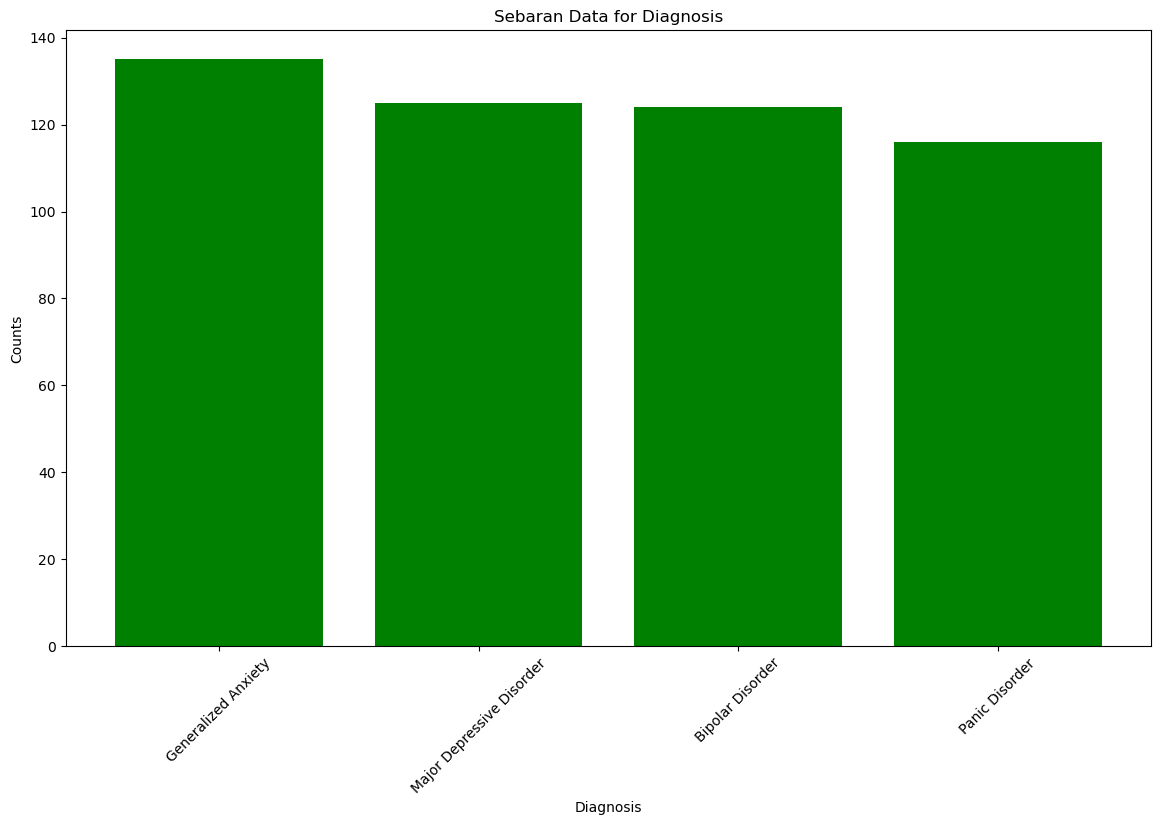

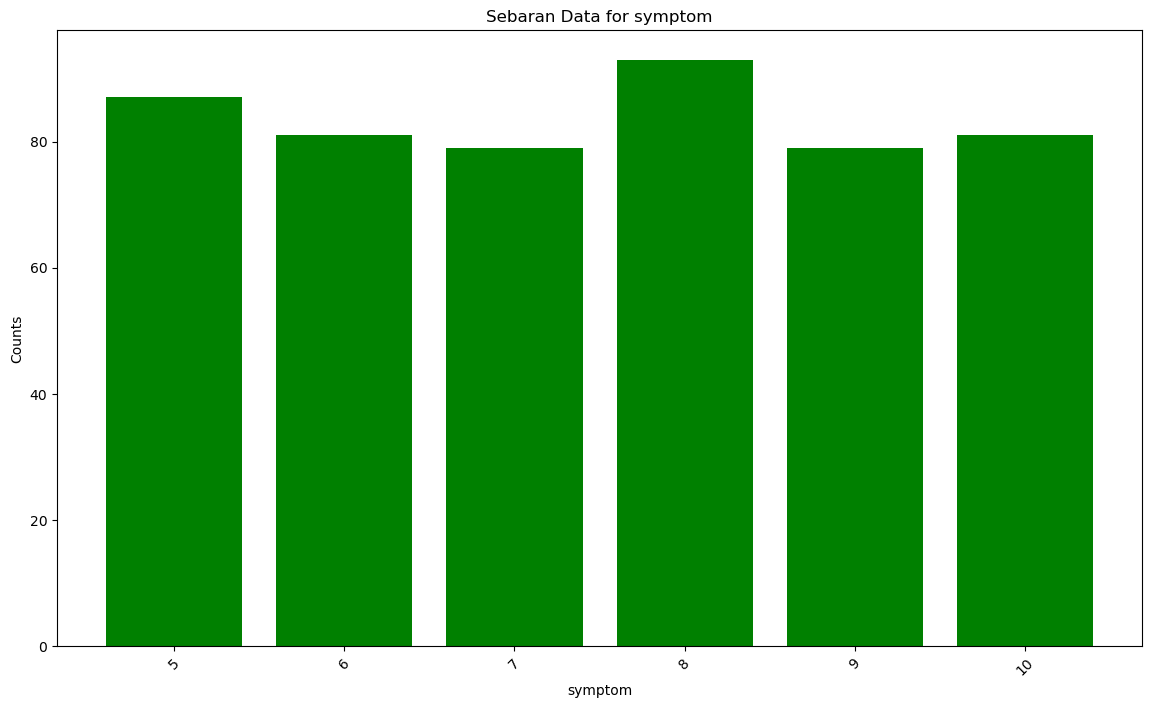

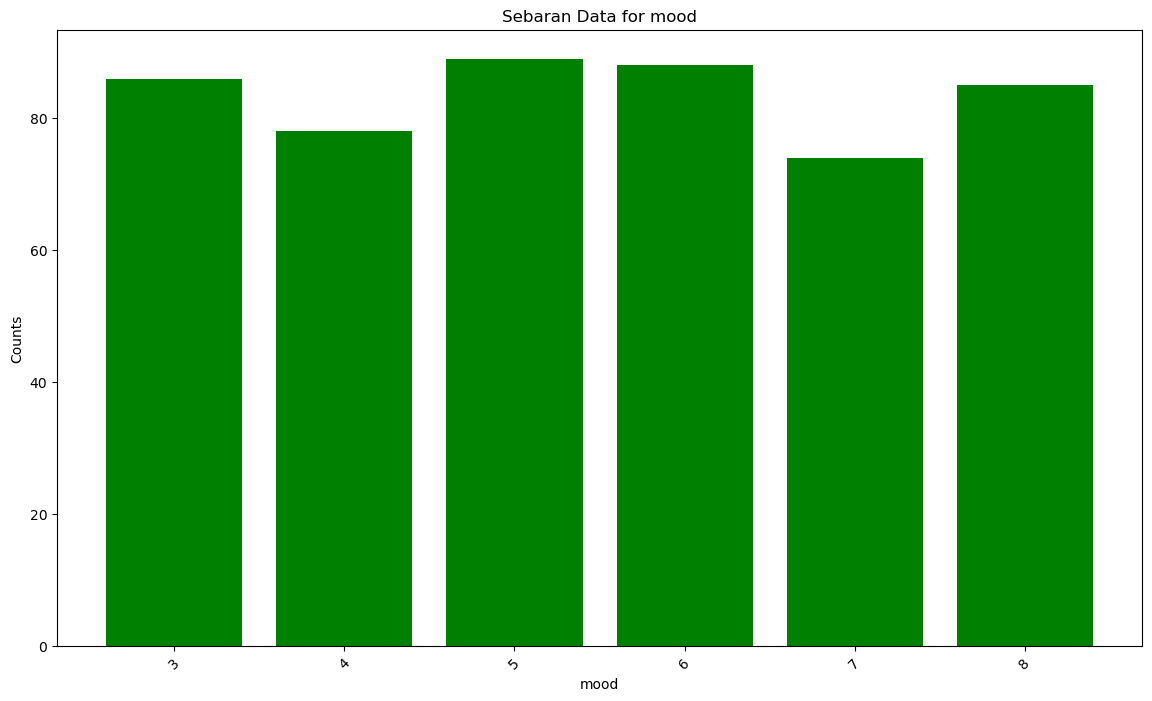

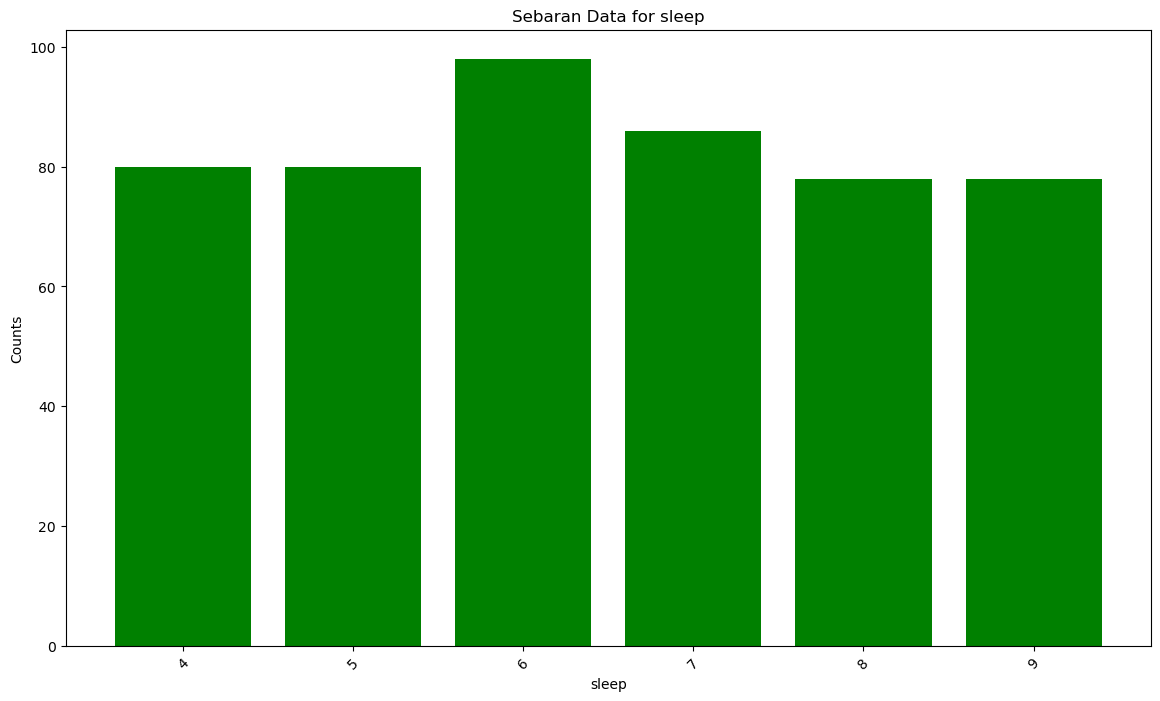

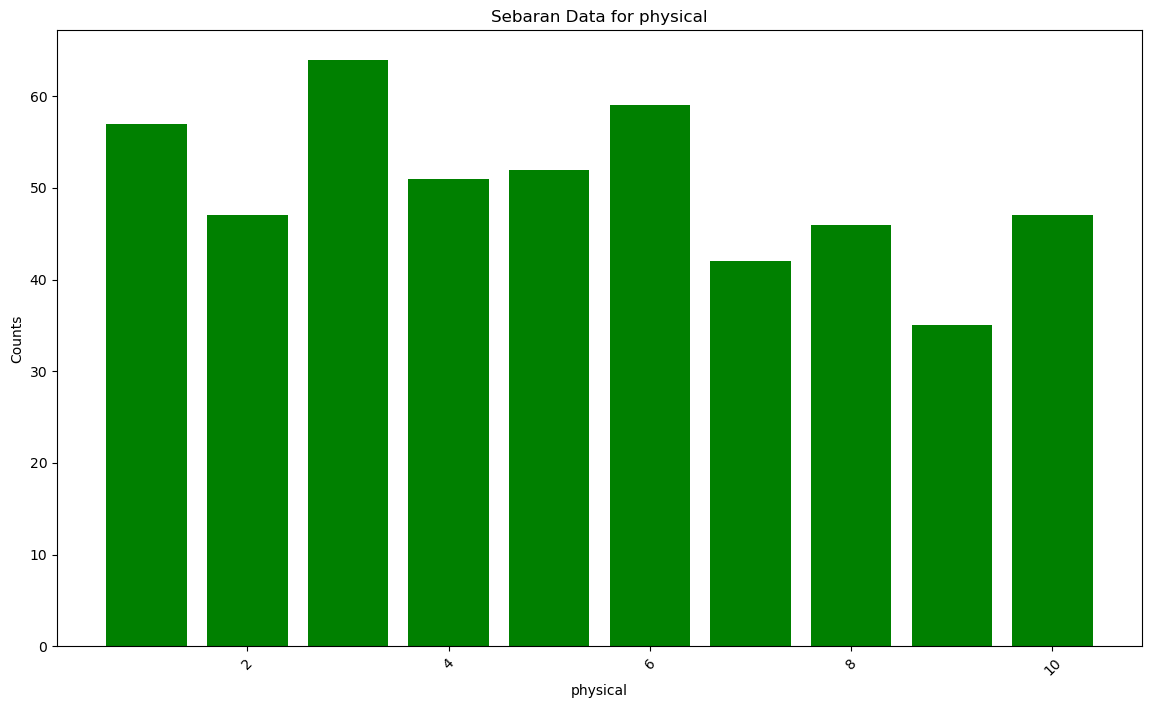

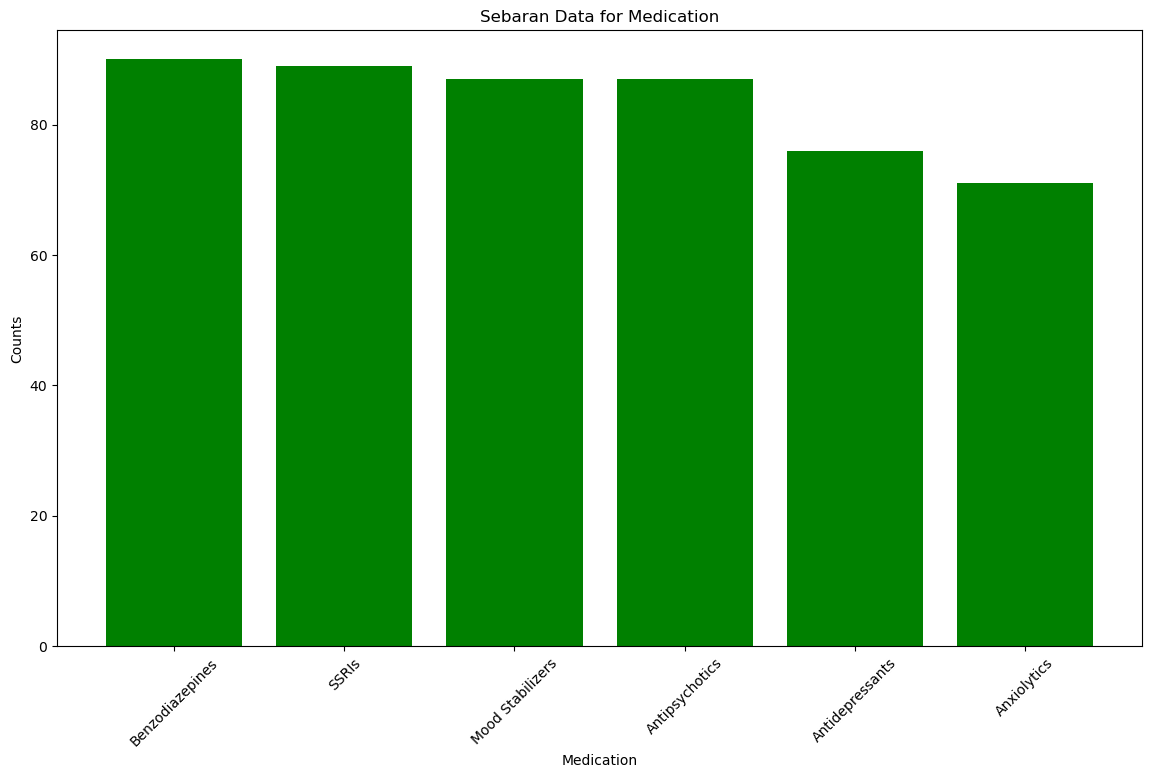

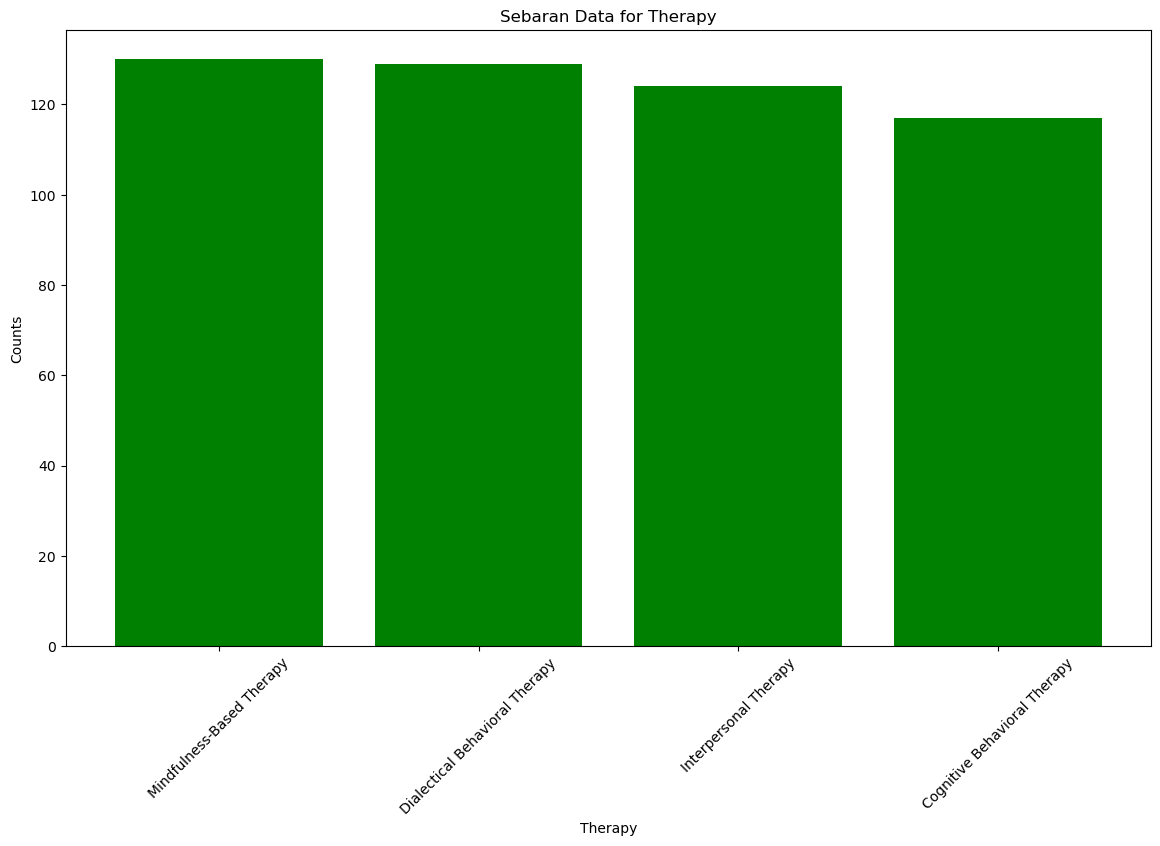

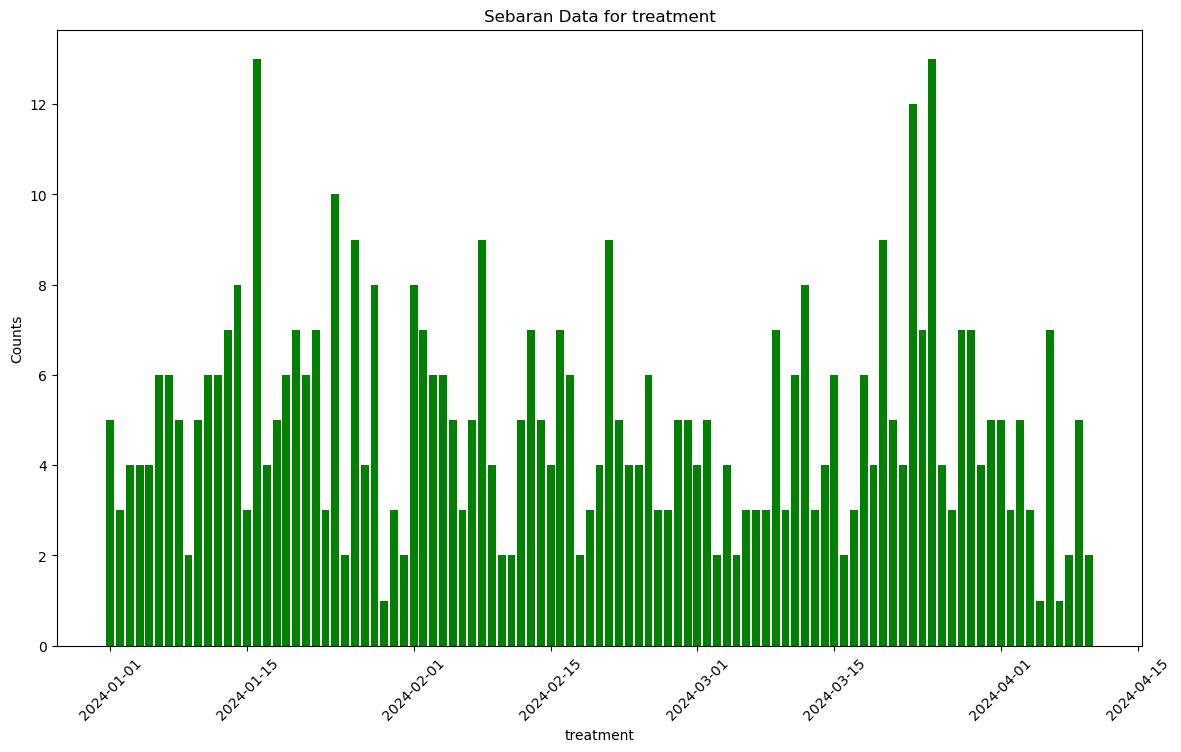

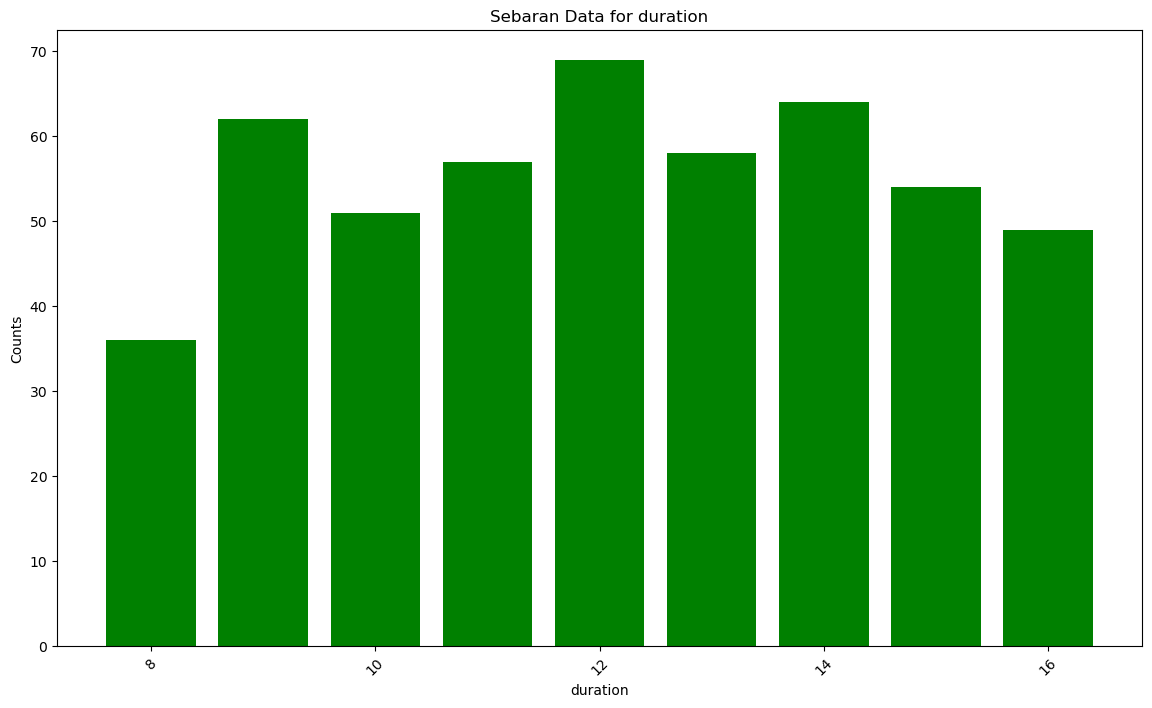

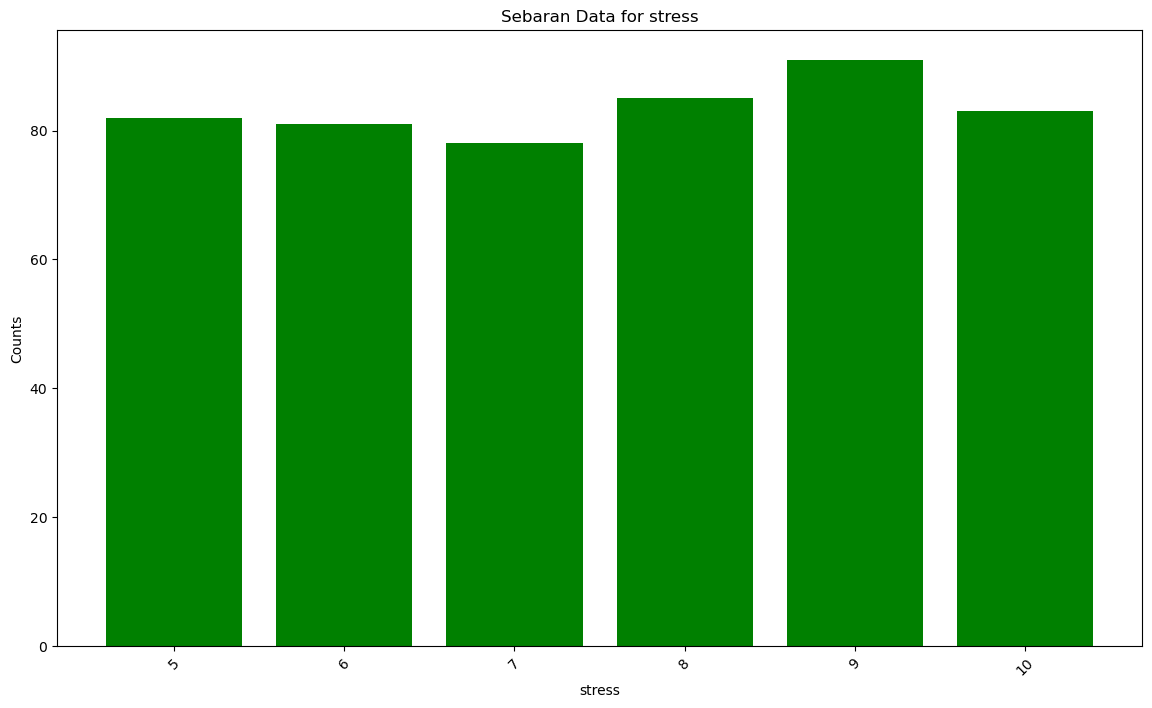

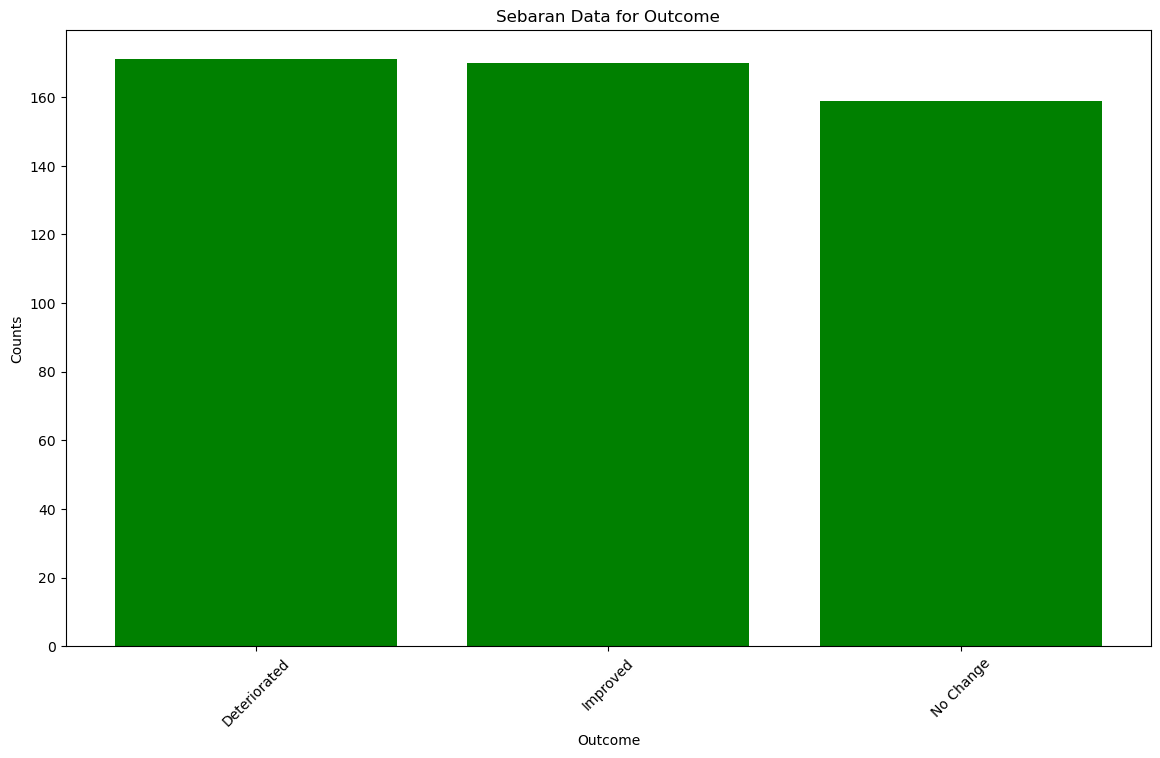

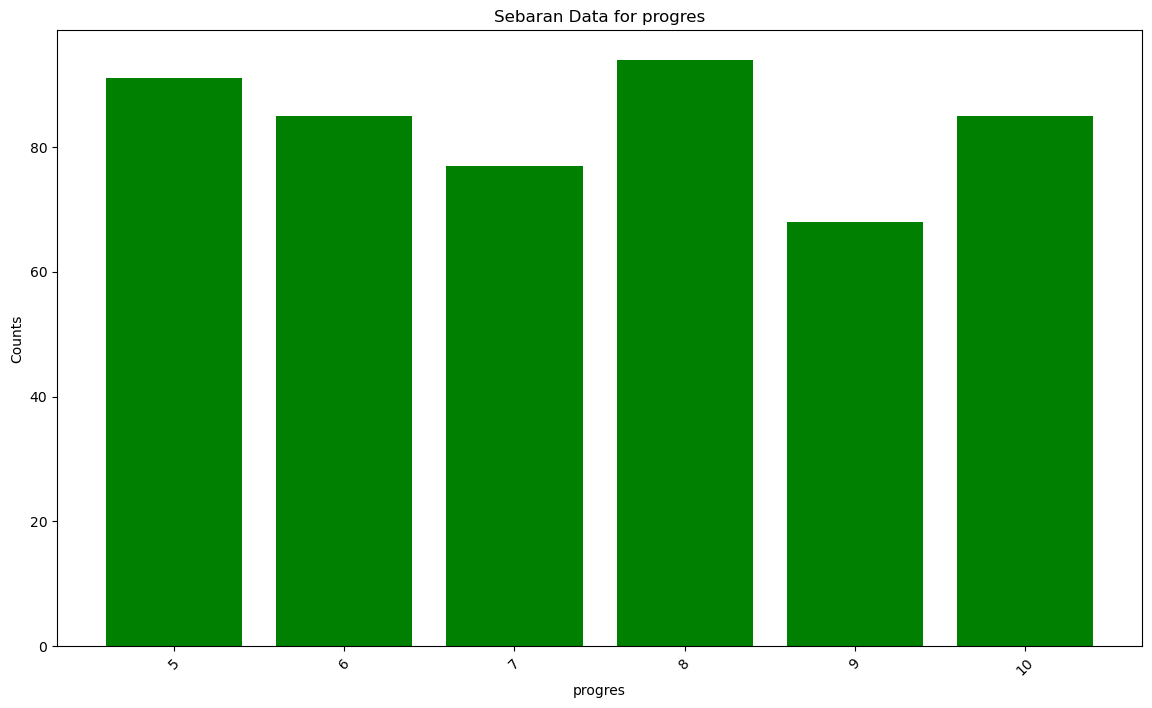

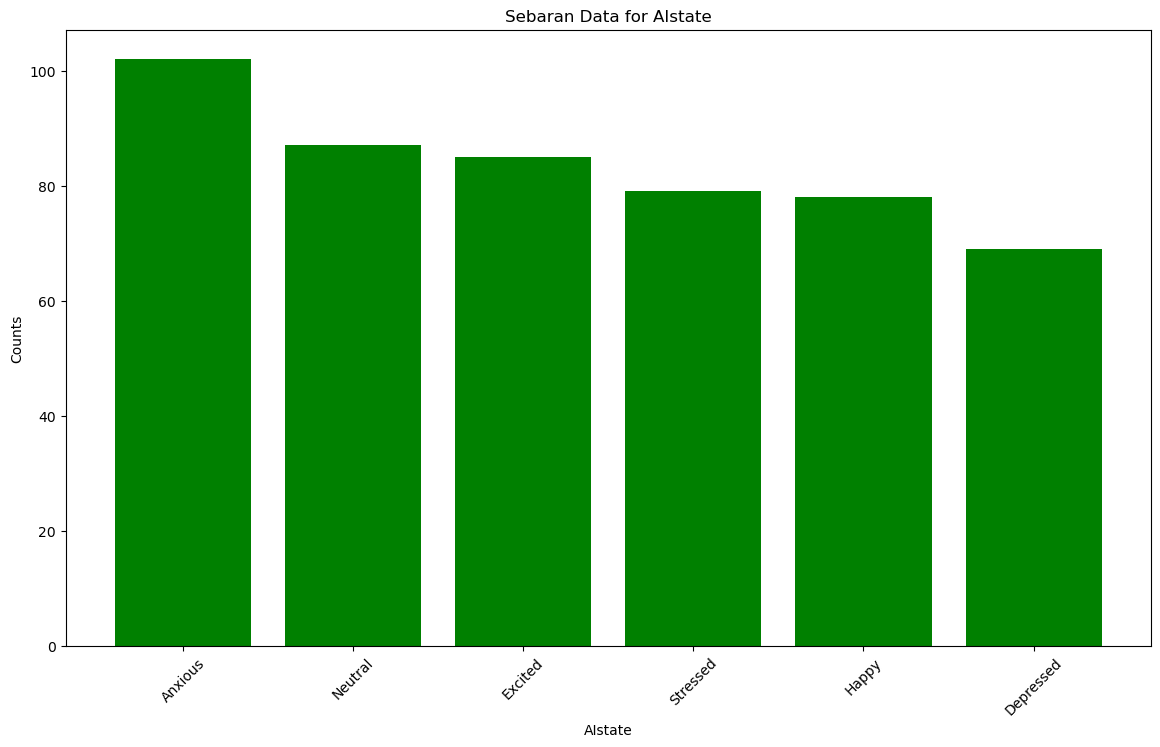

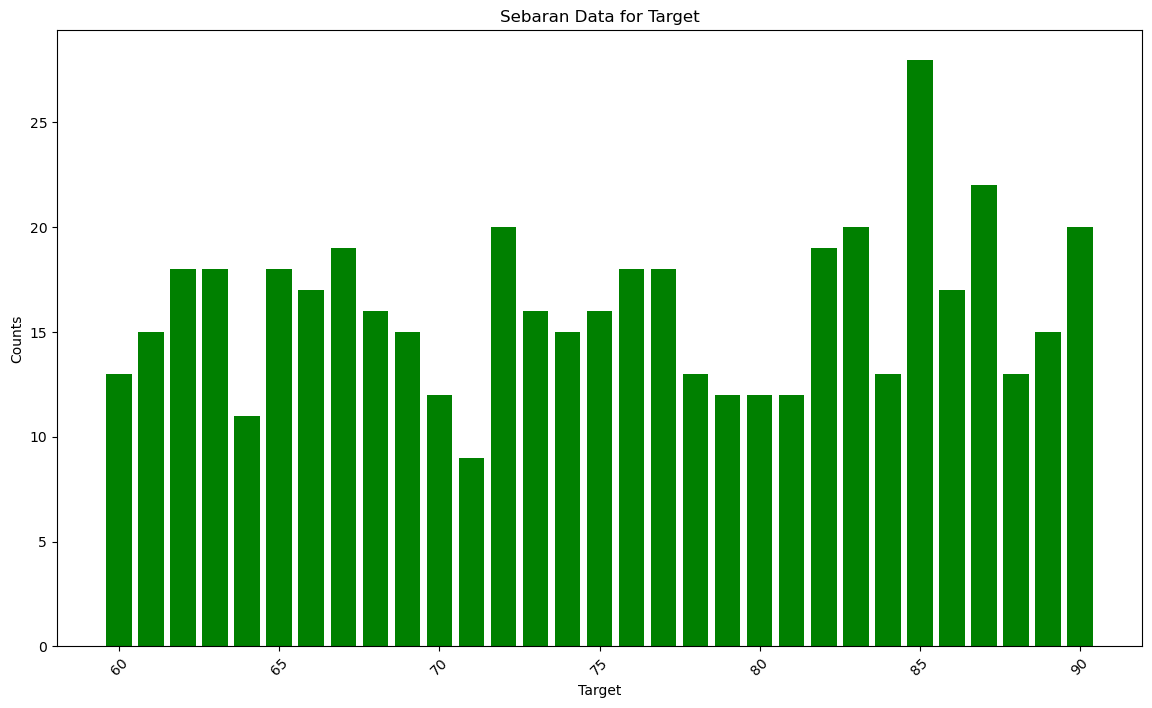

In [45]:
# Melihat grafik sebaran data
for col in df.columns:
    plt.figure(figsize=(14, 8))
    # Use the actual column data for value_counts
    counts = df[col].value_counts()
    plt.bar(counts.index,counts.values,color='Green')  # Removed the 'hue' argument
    plt.title(f"Sebaran Data for {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_23168\3566604275.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


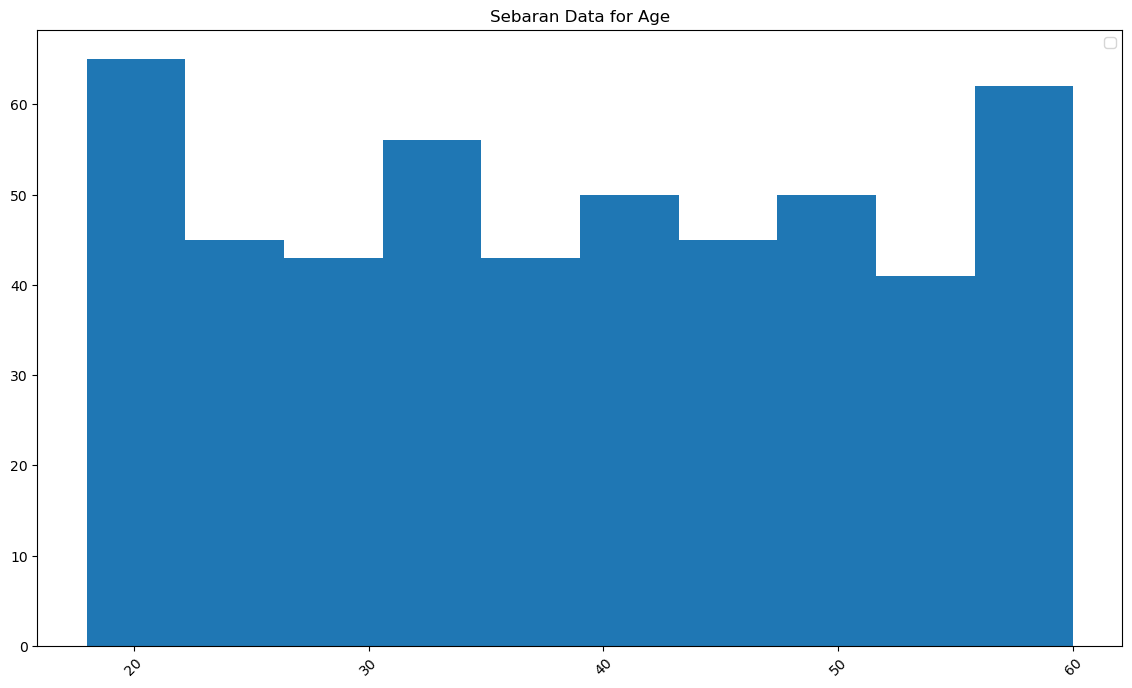

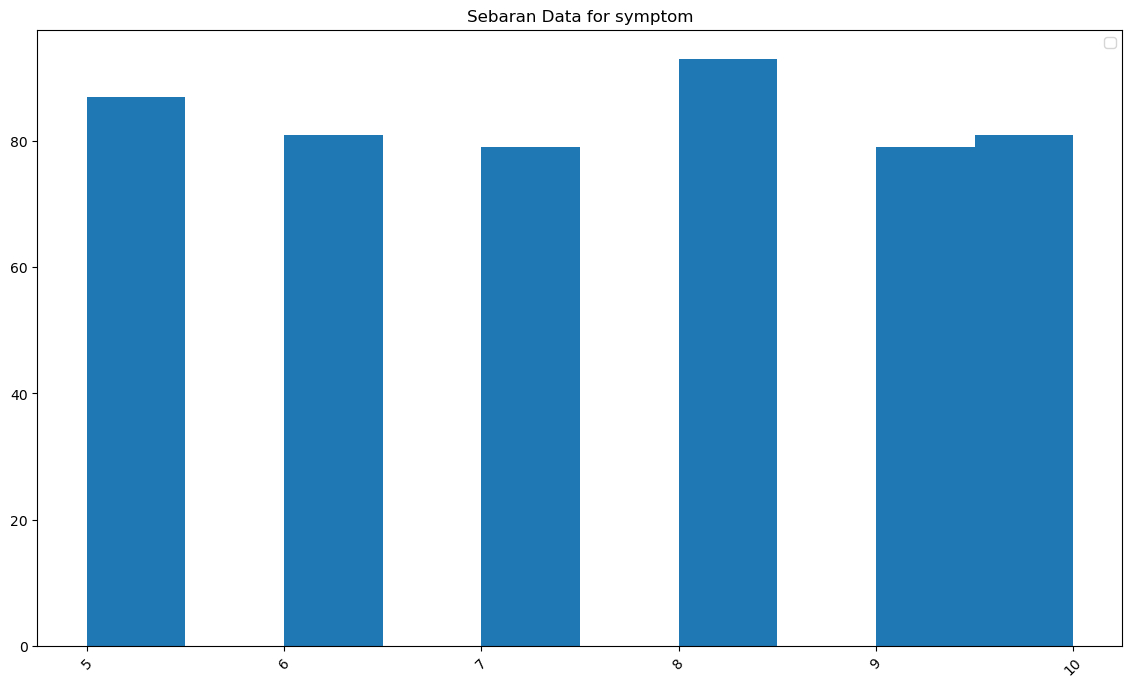

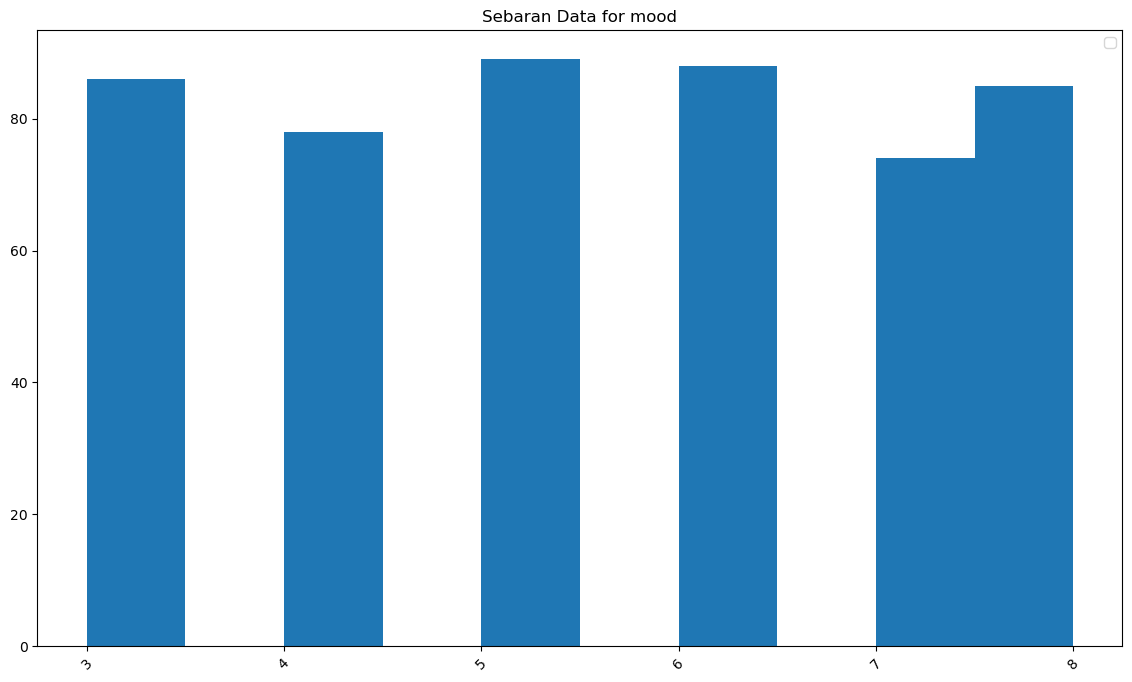

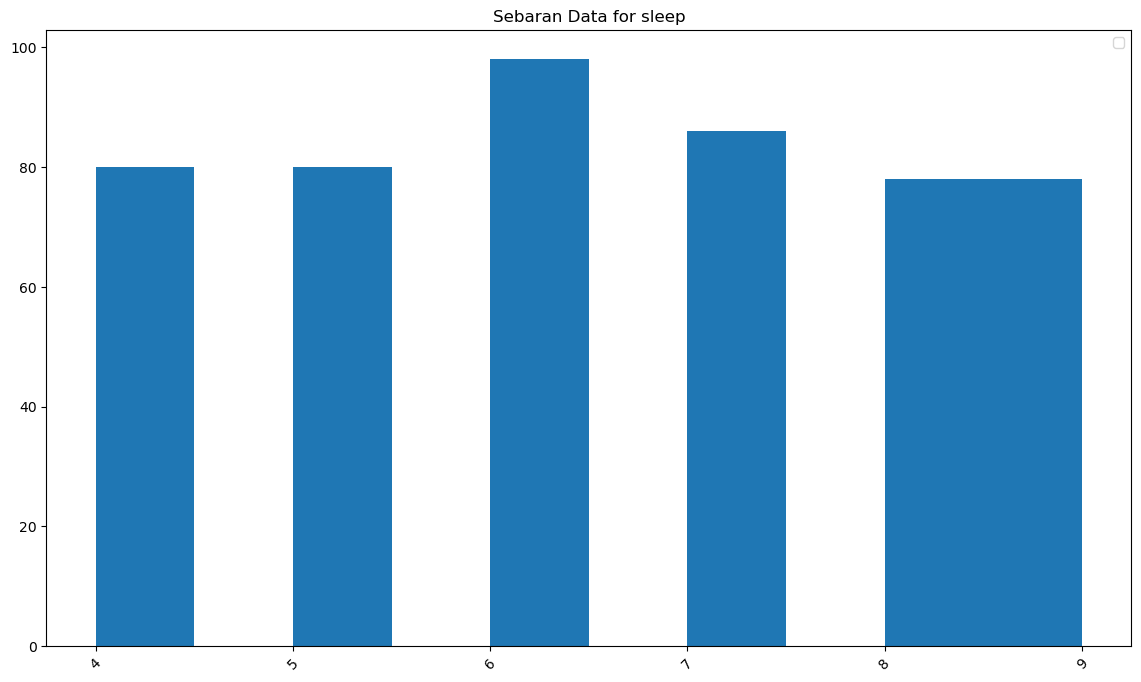

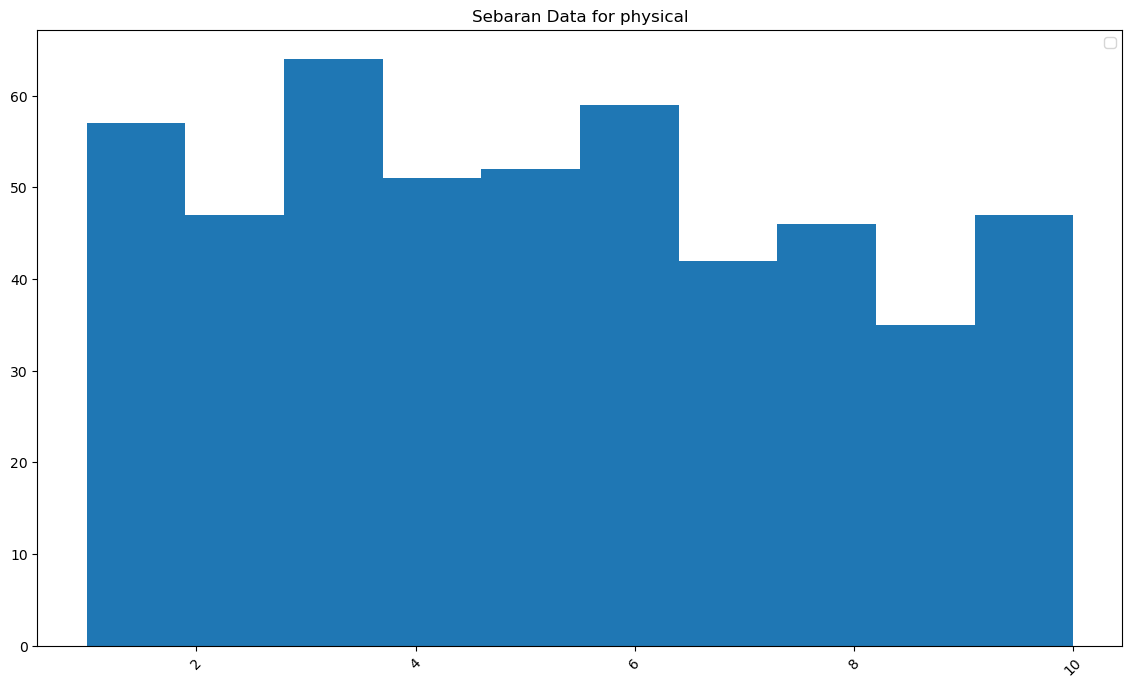

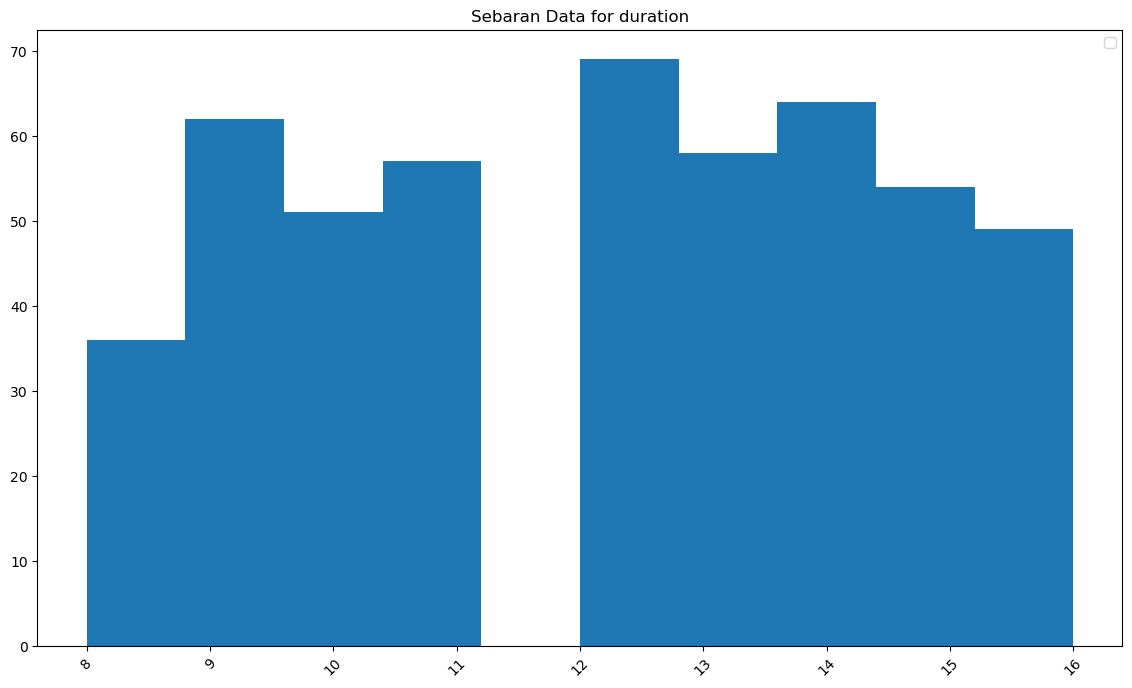

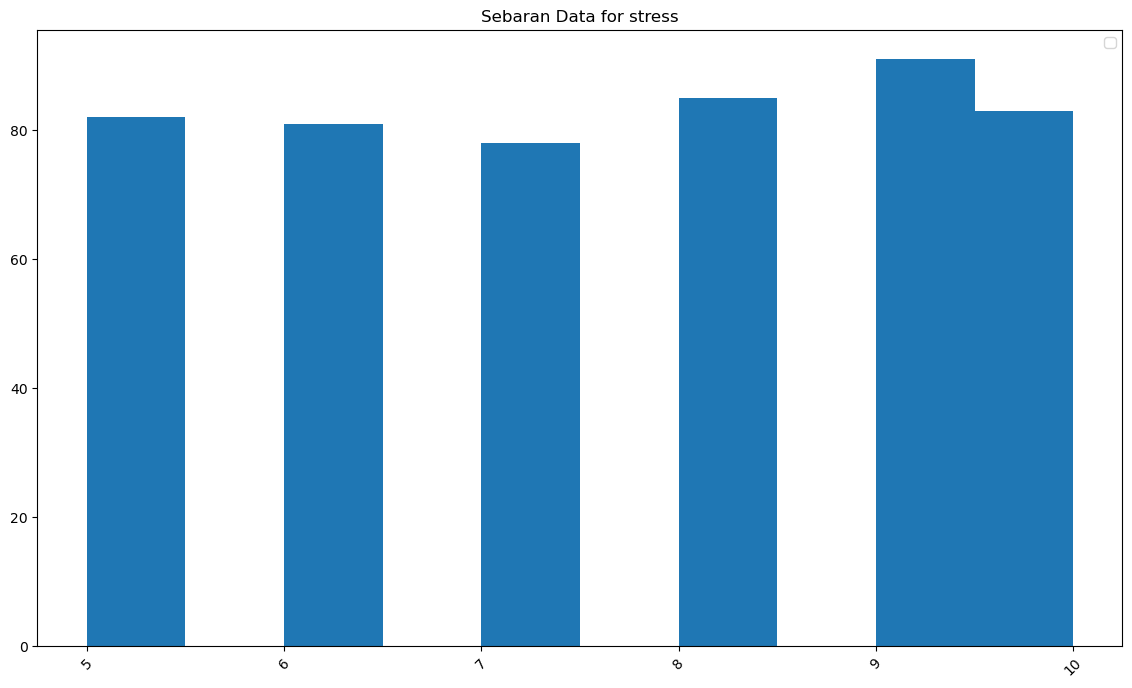

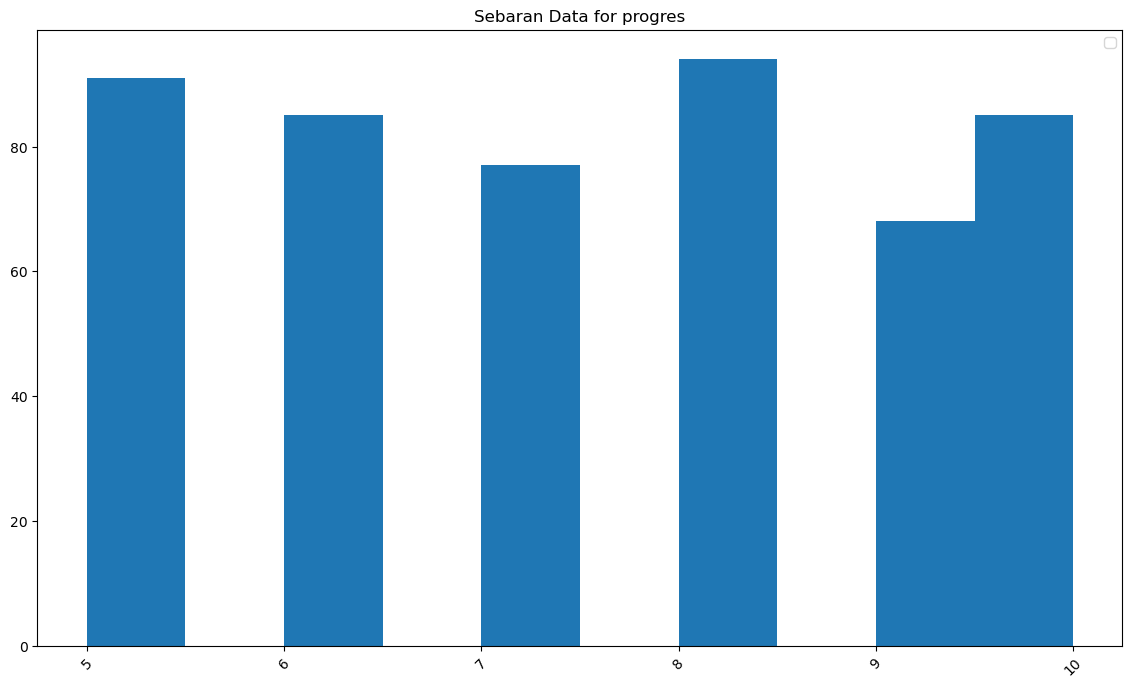

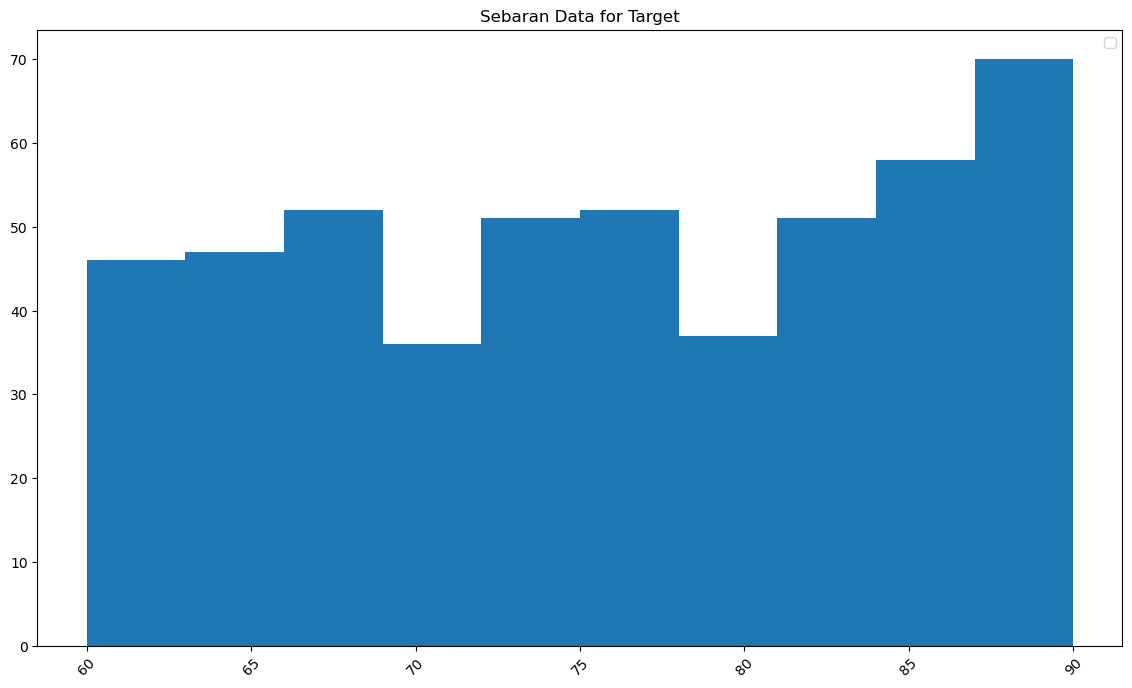

In [46]:
#melihat sebaran secara histogram untuk kolom numerik

for col in df_num.columns:
    plt.figure(figsize=(14, 8))
    # Use the actual column data for value_counts
    plt.hist(df_num[col])
    plt.title(f"Sebaran Data for {col}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

### Ukuran Pemusatan Data 

#### A. Rata-rata

In [49]:
# Memanggil Rata-rata 
mean = pd.DataFrame({"Kolom": df_num.columns.values,
                     "Rata-rata": df_num.mean(),
                     "No": np.arange(1,len(df_num.columns.values)+1,1)
                    })
mean.set_index('No',inplace=True)
np.array(mean["Kolom"])

array(['Age', 'symptom', 'mood', 'sleep', 'physical', 'duration',
       'stress', 'progres', 'Target'], dtype=object)

#### B. Modus 

In [51]:
# Memanggil modus
modus = df_num.mode().transpose()
modus["No"] = np.arange(1,len(modus)+1,1)
modus["Kolom"] = ['Age', 'symptom', 'mood', 'sleep', 'physical', 'duration',
       'stress', 'progres', 'Target']
modus.set_index('No')

0   Kolom  
No              
1   31       Age
2    8   symptom
3    5      mood
4    6     sleep
5    3  physical
6   12  duration
7    9    stress
8    8   progres
9   85    Target

#### C. Median

In [53]:
# Memanggil Median
median = pd.DataFrame({"Kolom": df_num.columns.values,
                     "Median": df_num.median(),
                     "No": np.arange(1,len(df_num.columns.values)+1,1)
                    })
median.set_index('No',inplace=True)
median

Kolom    Median
No                  
1        Age   38.0 
2    symptom    8.0 
3       mood    5.0 
4      sleep    6.0 
5   physical    5.0 
6   duration   12.0 
7     stress    8.0 
8    progres    7.0 
9     Target   76.0

In [54]:
gab1 = mean.join(modus.set_index('Kolom'), on='Kolom')
center = gab1.join(median.set_index('Kolom'), on='Kolom')
center.drop('No',axis=1)

Kolom    Rata-rata   0  Median
No                                 
1        Age   38.708    31   38.0 
2    symptom    7.478     8    8.0 
3       mood    5.482     5    5.0 
4      sleep    6.472     6    6.0 
5   physical    5.216     3    5.0 
6   duration   12.110    12   12.0 
7     stress    7.542     9    8.0 
8    progres    7.436     8    7.0 
9     Target   75.454    85   76.0

In [55]:
center.rename(columns={0:'Modus'})

Kolom    Rata-rata  Modus  No  Median
No                                        
1        Age   38.708     31     1   38.0 
2    symptom    7.478      8     2    8.0 
3       mood    5.482      5     3    5.0 
4      sleep    6.472      6     4    6.0 
5   physical    5.216      3     5    5.0 
6   duration   12.110     12     6   12.0 
7     stress    7.542      9     7    8.0 
8    progres    7.436      8     8    7.0 
9     Target   75.454     85     9   76.0

In [56]:
center.drop(columns="No",axis=1)

Kolom    Rata-rata   0  Median
No                                 
1        Age   38.708    31   38.0 
2    symptom    7.478     8    8.0 
3       mood    5.482     5    5.0 
4      sleep    6.472     6    6.0 
5   physical    5.216     3    5.0 
6   duration   12.110    12   12.0 
7     stress    7.542     9    8.0 
8    progres    7.436     8    7.0 
9     Target   75.454    85   76.0

In [57]:
cen = center.set_index('Kolom')
cen.drop(columns='No',inplace=True)
cen

Rata-rata   0  Median
Kolom                          
Age        38.708    31   38.0 
symptom     7.478     8    8.0 
mood        5.482     5    5.0 
sleep       6.472     6    6.0 
physical    5.216     3    5.0 
duration   12.110    12   12.0 
stress      7.542     9    8.0 
progres     7.436     8    7.0 
Target     75.454    85   76.0

In [58]:
centert = cen.transpose()
centert

Kolom        Age   symptom  mood   sleep  physical  duration  stress  progres  \
Rata-rata  38.708   7.478   5.482  6.472    5.216     12.11    7.542   7.436    
0          31.000   8.000   5.000  6.000    3.000     12.00    9.000   8.000    
Median     38.000   8.000   5.000  6.000    5.000     12.00    8.000   7.000    

Kolom      Target  
Rata-rata  75.454  
0          85.000  
Median     76.000

In [59]:
centert["Kol"]= ["Rata-Rata","Modus","Median"]
centert=pd.DataFrame(centert)
centert.set_index("Kol")

Kolom        Age   symptom  mood   sleep  physical  duration  stress  progres  \
Kol                                                                             
Rata-Rata  38.708   7.478   5.482  6.472    5.216     12.11    7.542   7.436    
Modus      31.000   8.000   5.000  6.000    3.000     12.00    9.000   8.000    
Median     38.000   8.000   5.000  6.000    5.000     12.00    8.000   7.000    

Kolom      Target  
Kol                
Rata-Rata  75.454  
Modus      85.000  
Median     76.000

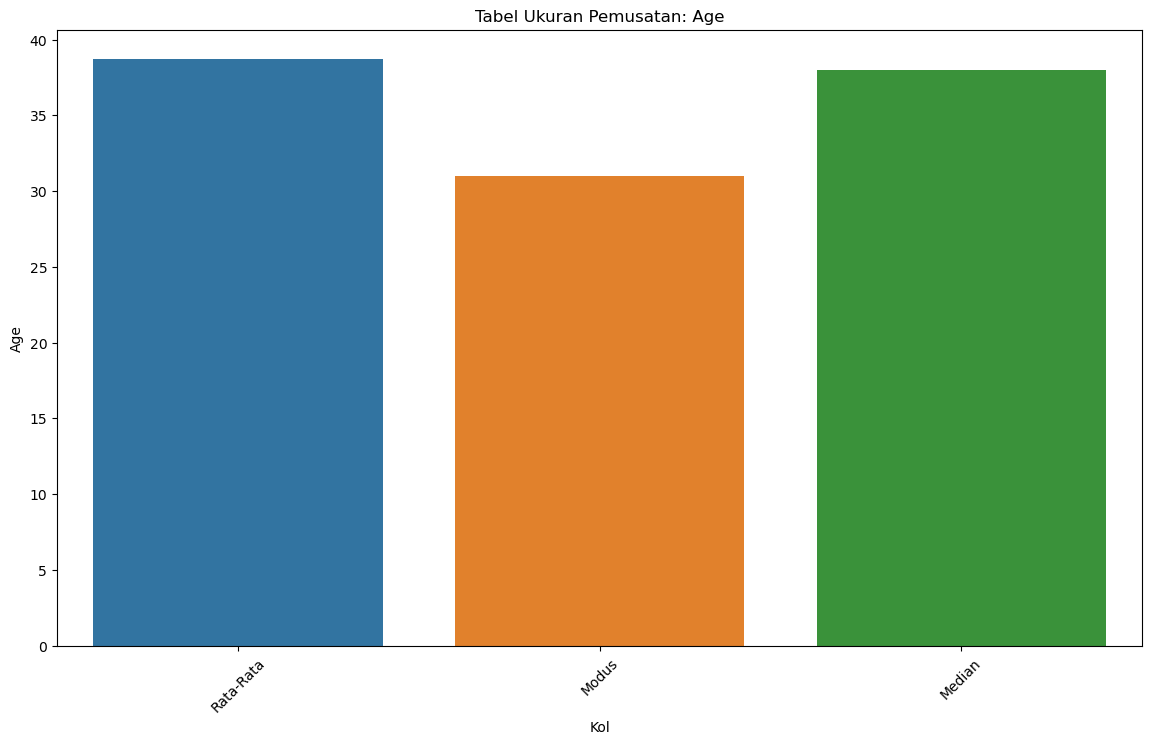

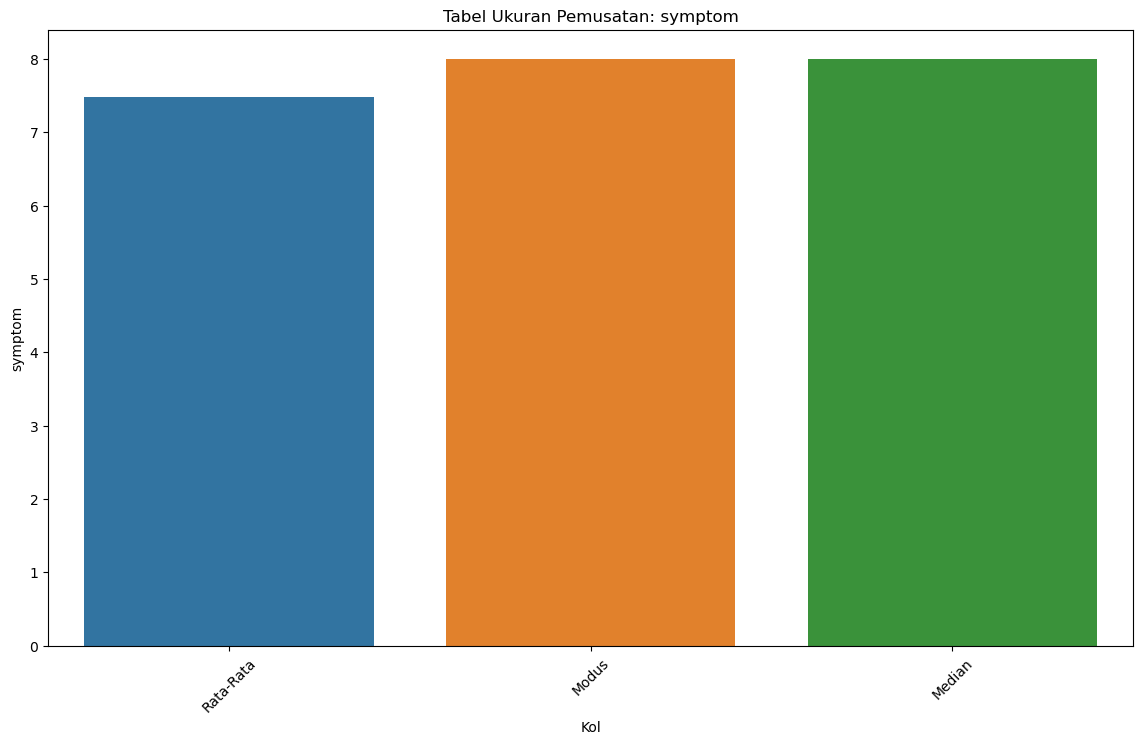

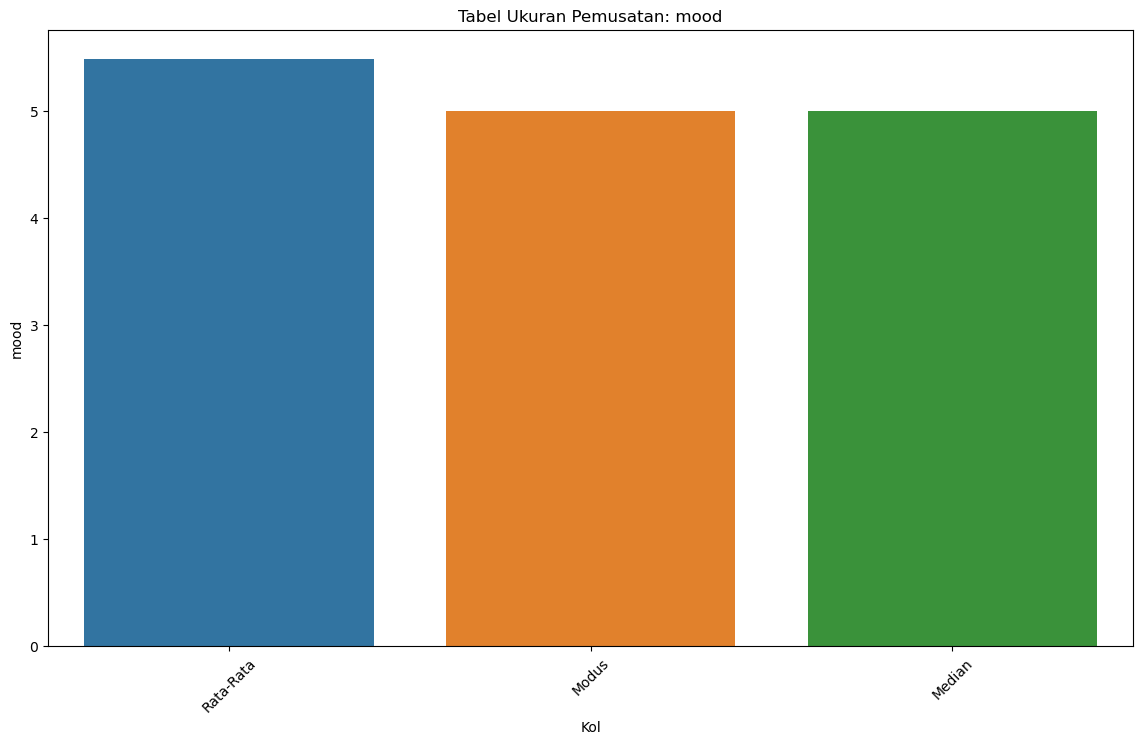

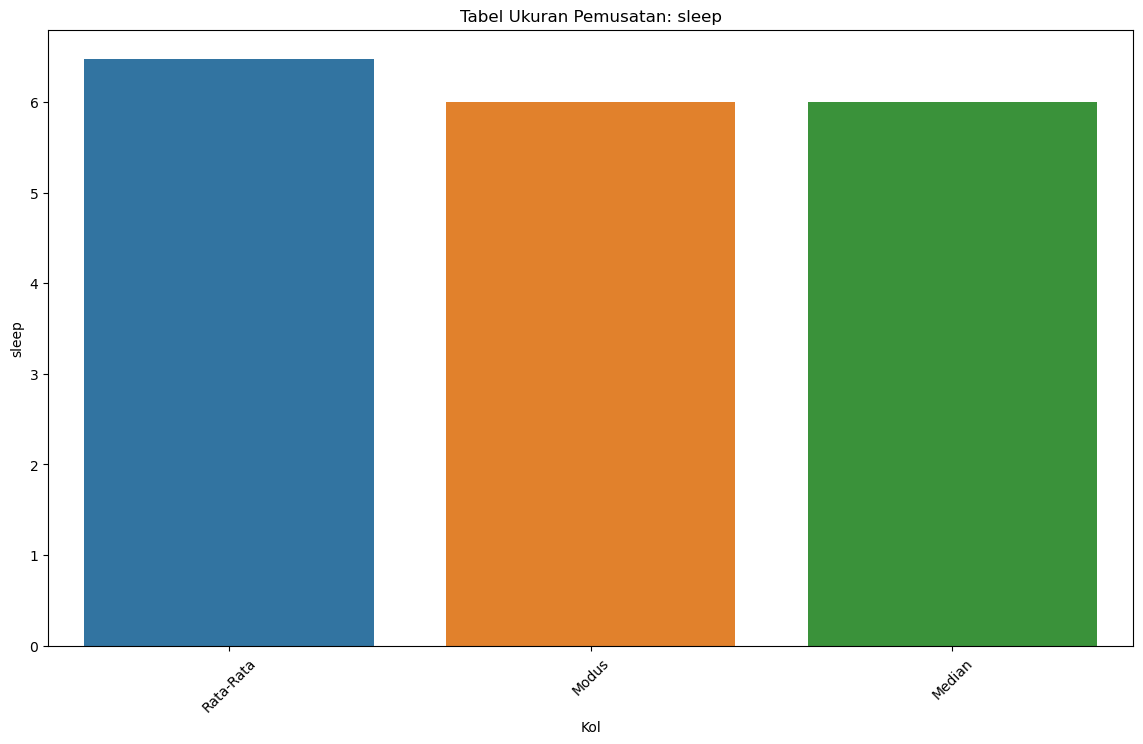

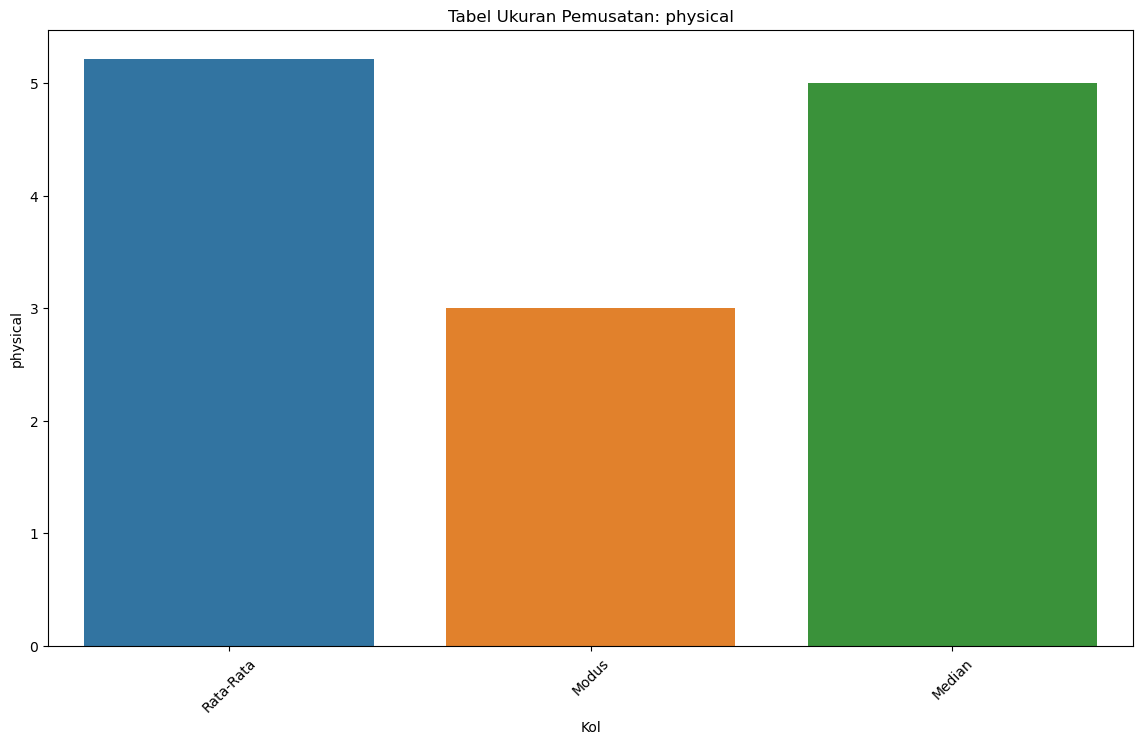

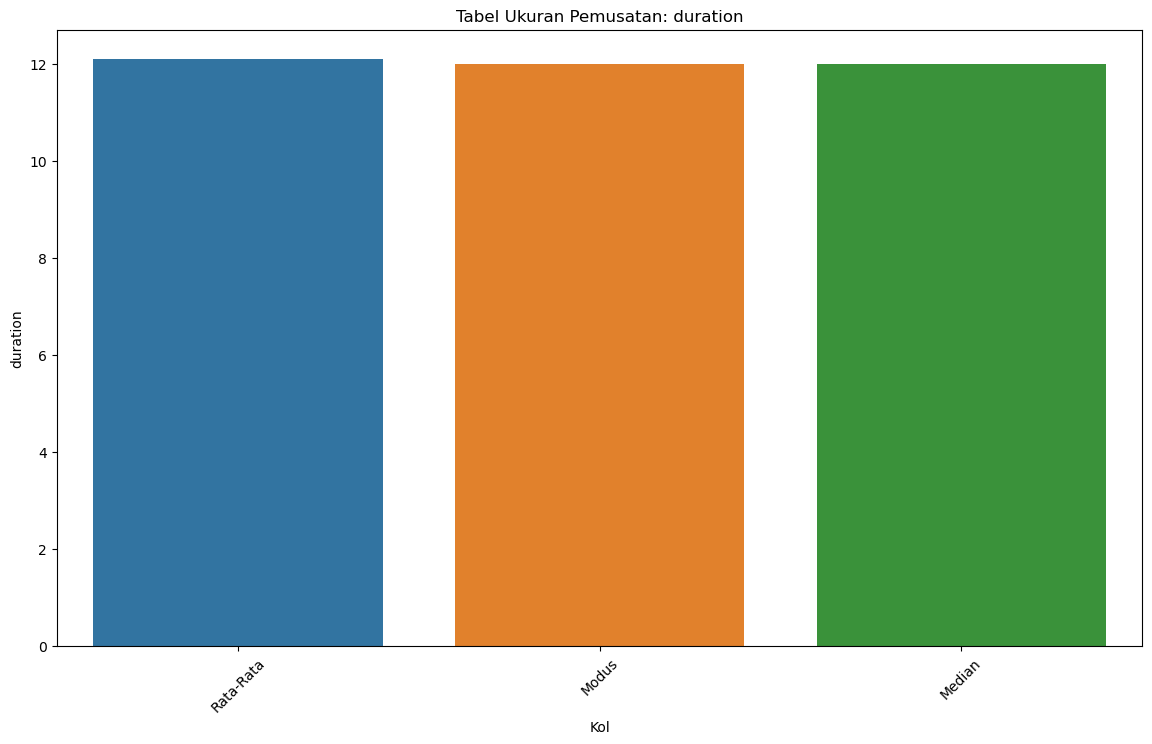

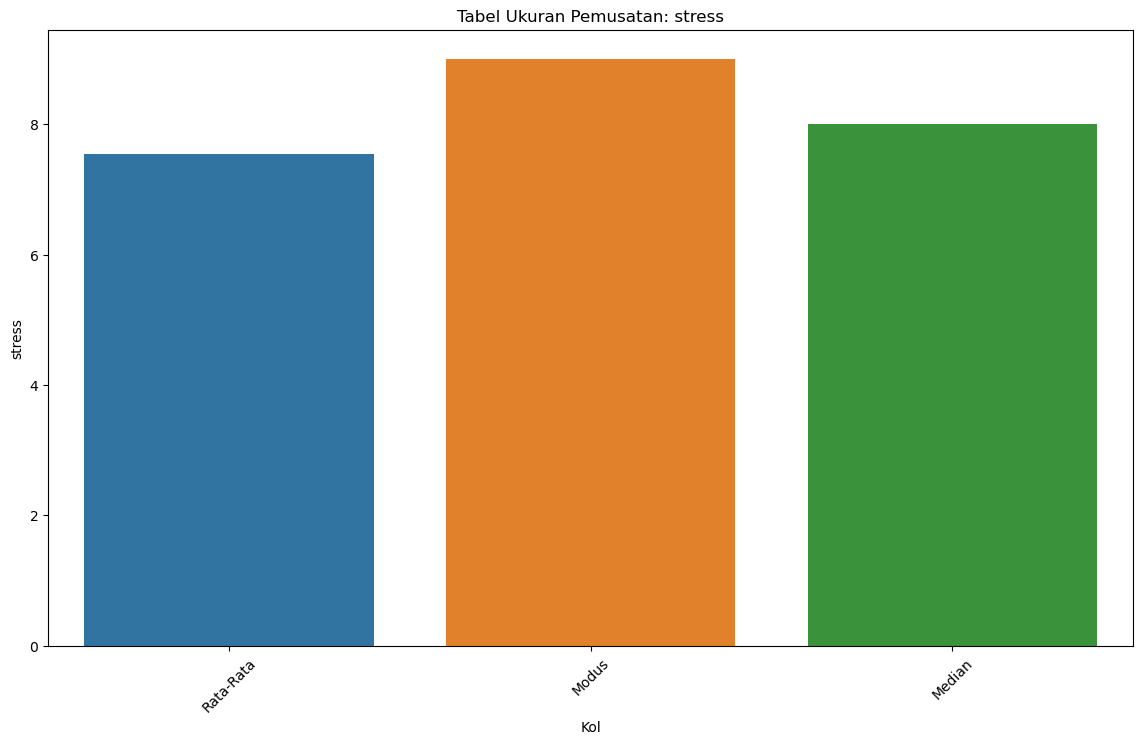

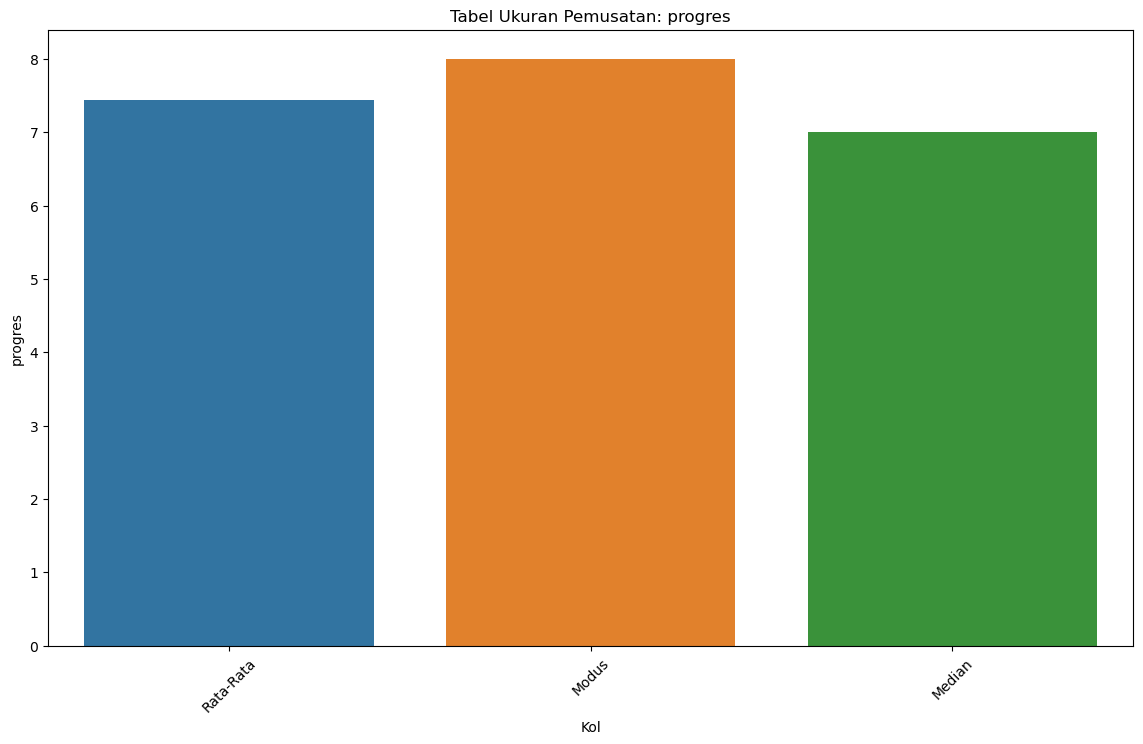

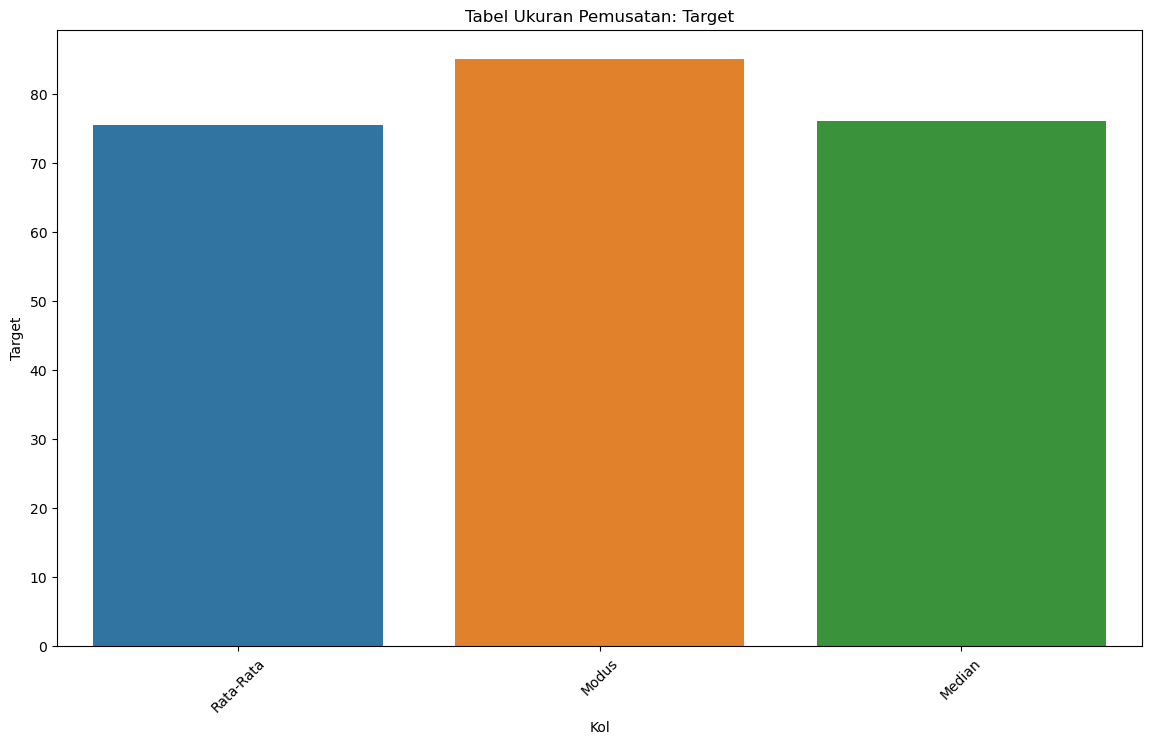

In [60]:
for col in centert.columns:
    if col != "Kol":  # Avoid plotting "Kol" against itself
        plt.figure(figsize=(14, 8))
        sns.barplot(x=centert["Kol"], y=centert[col], hue =centert["Kol"])  # x is "Kol", y is the current column
        plt.title(f"Tabel Ukuran Pemusatan: {col}")
        plt.xlabel("Kol")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.show()


Dari analisis tabel pemusatan data di atas terlihat bahwa ukuran nilai rata-rata cenderung memiliki nilai yang lebih tinggi daripada nilai modus dan median, hal ini menjadi indikasi bahwa adanya data yang berdistribusi agak sedikit menceng.

### Ukuran Persebaran Data

#### A. Varians/Ragam dan Standar Baku

Nilai Varians/Ragam adalah ukuran statistik yang umum dan penting digunakan untuk melihat seberapa besar data tersebut tersebar, dan selisih antara data dengan nilai rata-rata dari data di variabel sekaligus juga sebagai koefisien penting dalam mengecek Standar Error dari suatu variabel.

In [65]:
Ragam = pd.DataFrame({'Kolom':df_num.columns.values,
              'Varians': df_num.var(),
             'Standar Baku':df_num.std()})
Ragam

Kolom      Varians   Standar Baku
Age            Age  161.605948    12.712433 
symptom    symptom    2.911339     1.706265 
mood          mood    2.915507     1.707486 
sleep        sleep    2.782782     1.668167 
physical  physical    8.005355     2.829374 
duration  duration    5.957816     2.440864 
stress      stress    2.922080     1.709409 
progres    progres    2.975856     1.725067 
Target      Target   82.573030     9.086970

Dari data numerik di atas, dapat terlihat bahwa untuk variabel umur/age nilai varians cukup tinggi yang menandakan bahwa adanya kemungkinan heterogenitas usia responden yang cukup tinggi

#### B. Skewness and Kurtosis

In [68]:
Sebar = pd.DataFrame({'Kolom':df_num.columns.values,
              'Skewness': df_num.skew(),
             'kurtosis':df_num.kurtosis()})
Sebar

Kolom    Skewness  kurtosis
Age            Age  0.036770 -1.244631
symptom    symptom -0.001159 -1.252406
mood          mood  0.019932 -1.237839
sleep        sleep  0.033441 -1.188538
physical  physical  0.149097 -1.128785
duration  duration -0.036076 -1.131909
stress      stress -0.053779 -1.276180
progres    progres  0.053399 -1.264044
Target      Target -0.055319 -1.264945

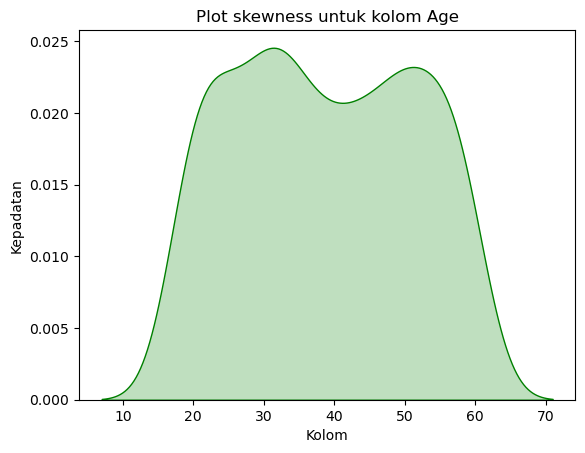

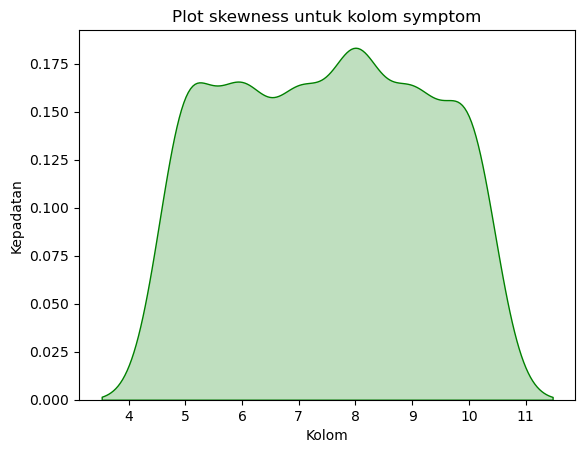

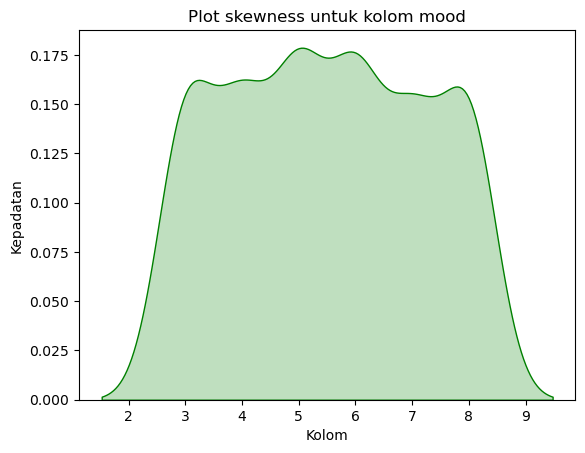

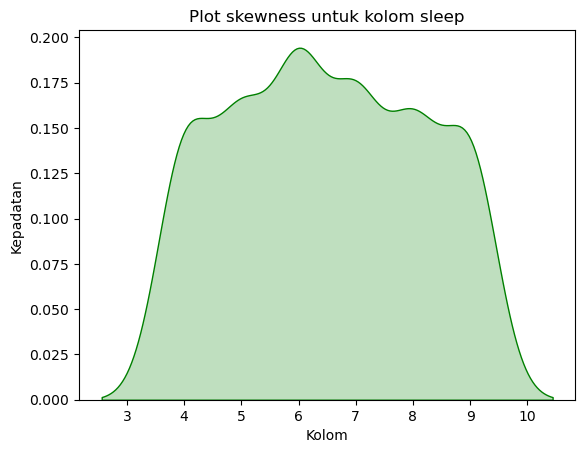

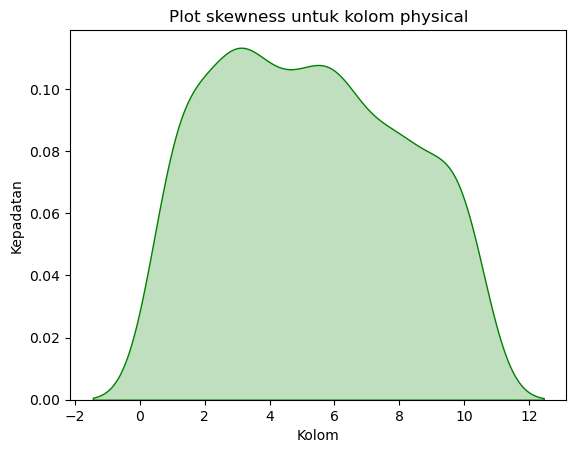

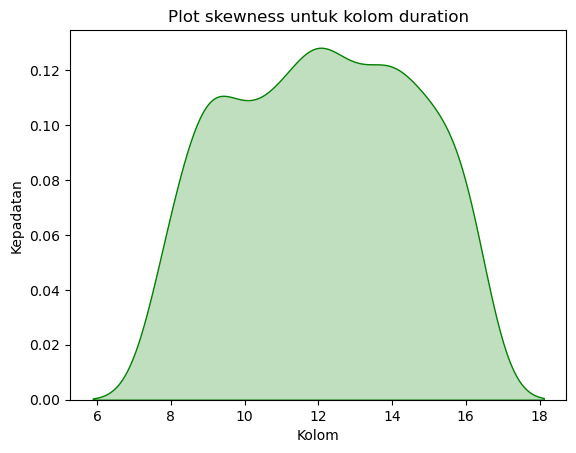

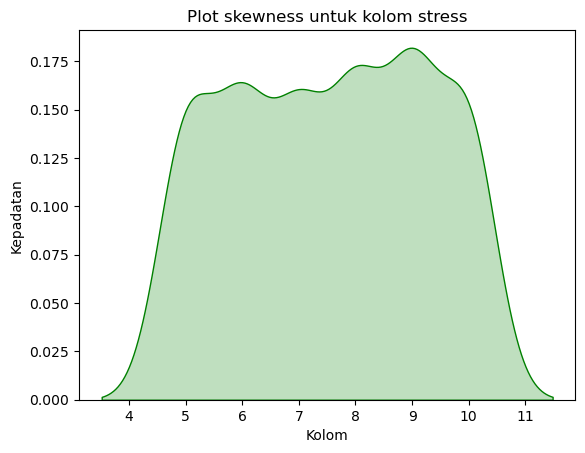

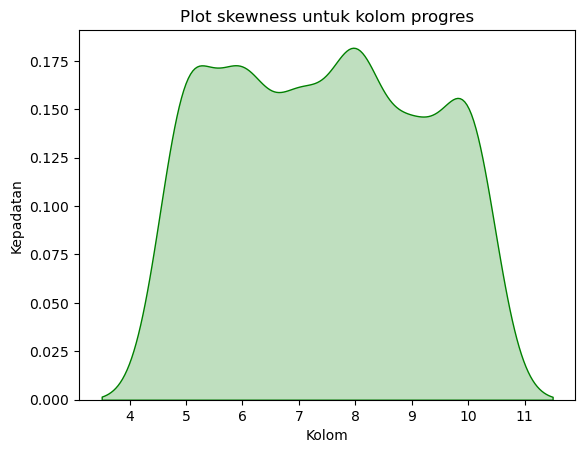

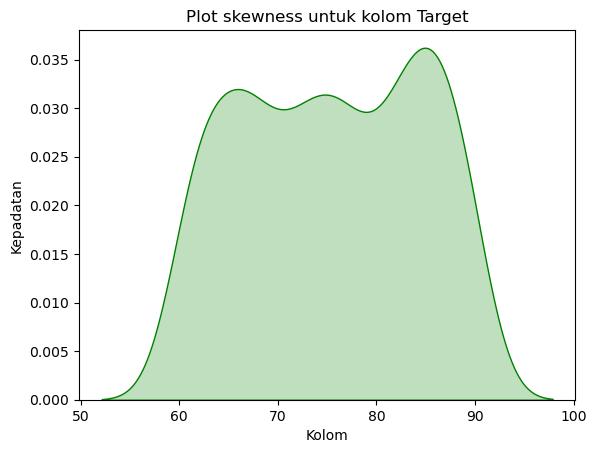

In [69]:
# Menampilkan grafik skewness
for col in df_num.columns:
    sns.kdeplot(data=df_num[col], fill=True, color='green')
    plt.title(f'Plot skewness untuk kolom {col}')
    plt.xlabel('Kolom')
    plt.ylabel('Kepadatan')
    plt.show()



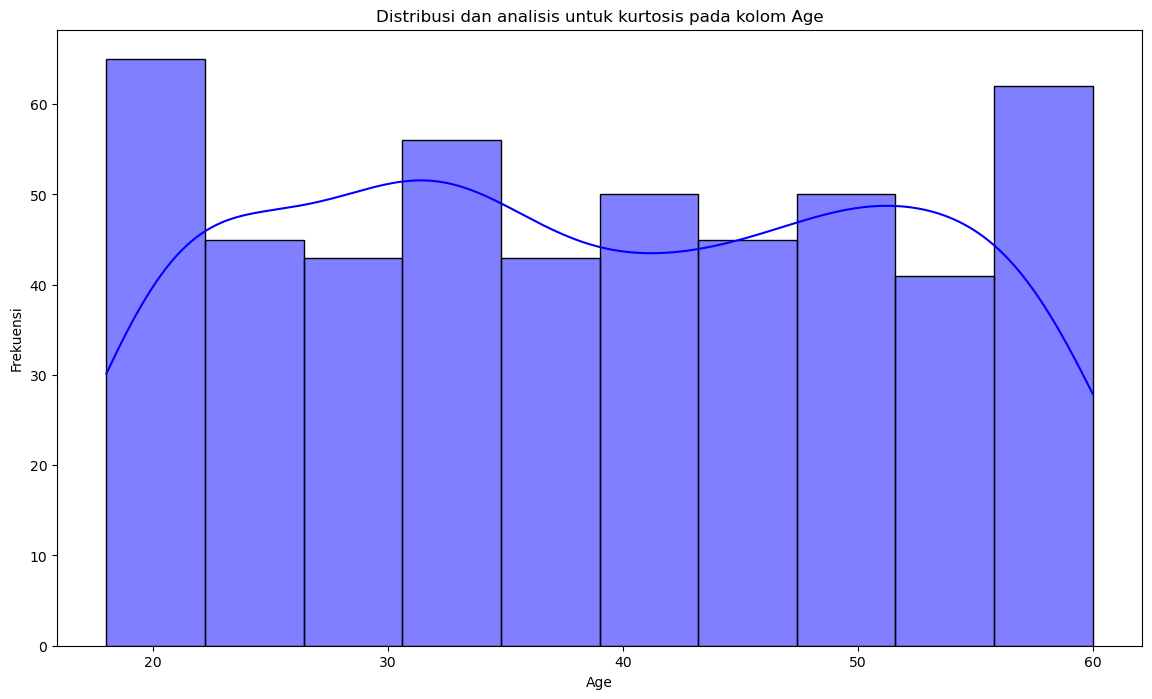

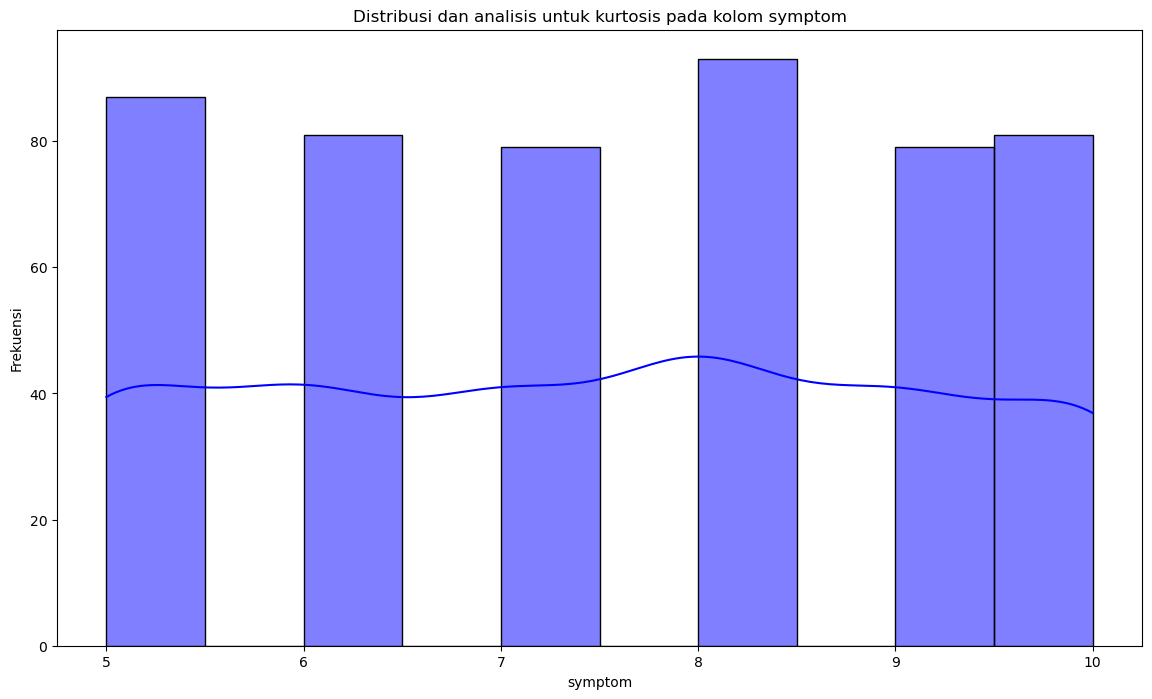

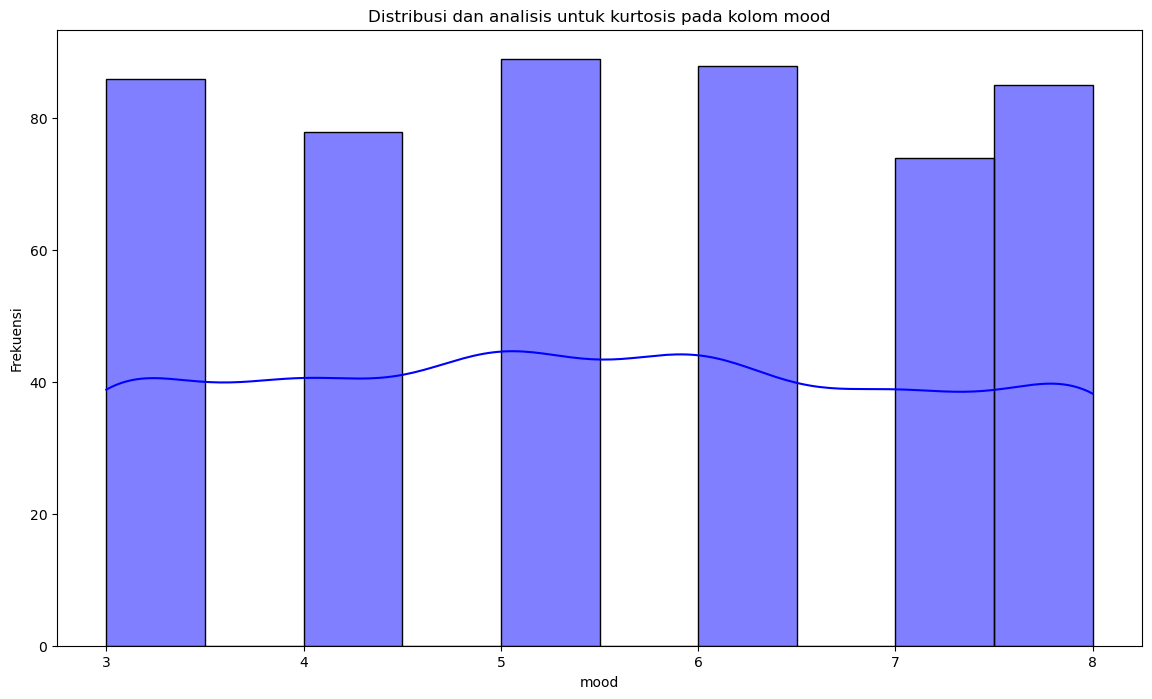

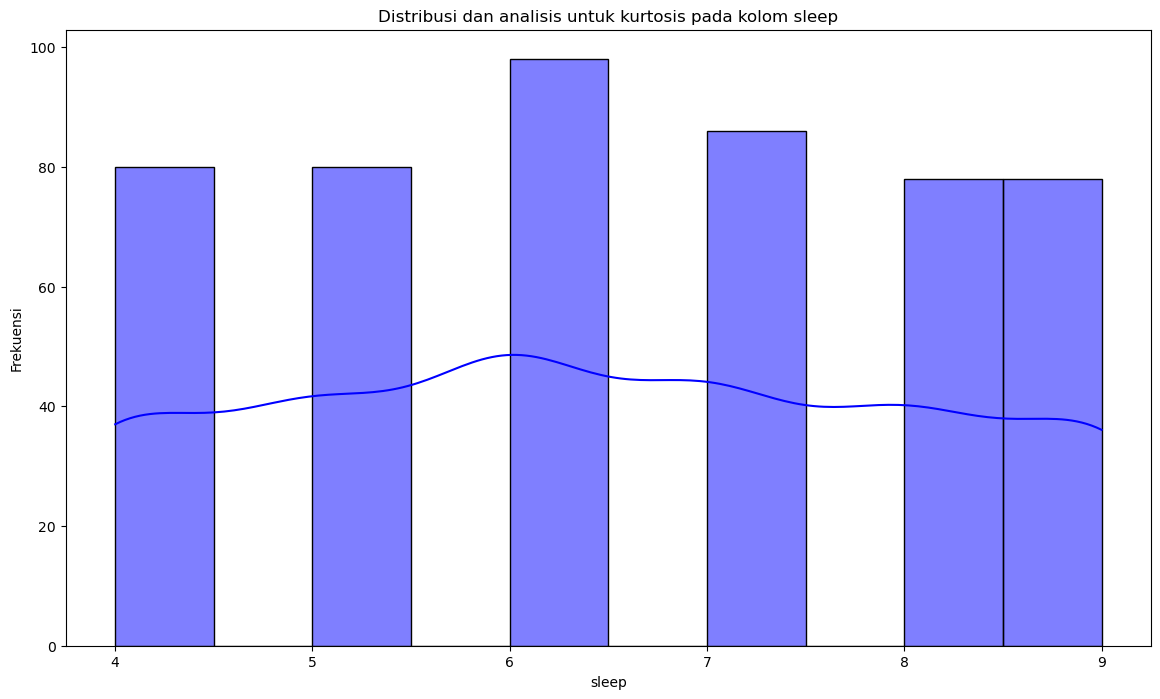

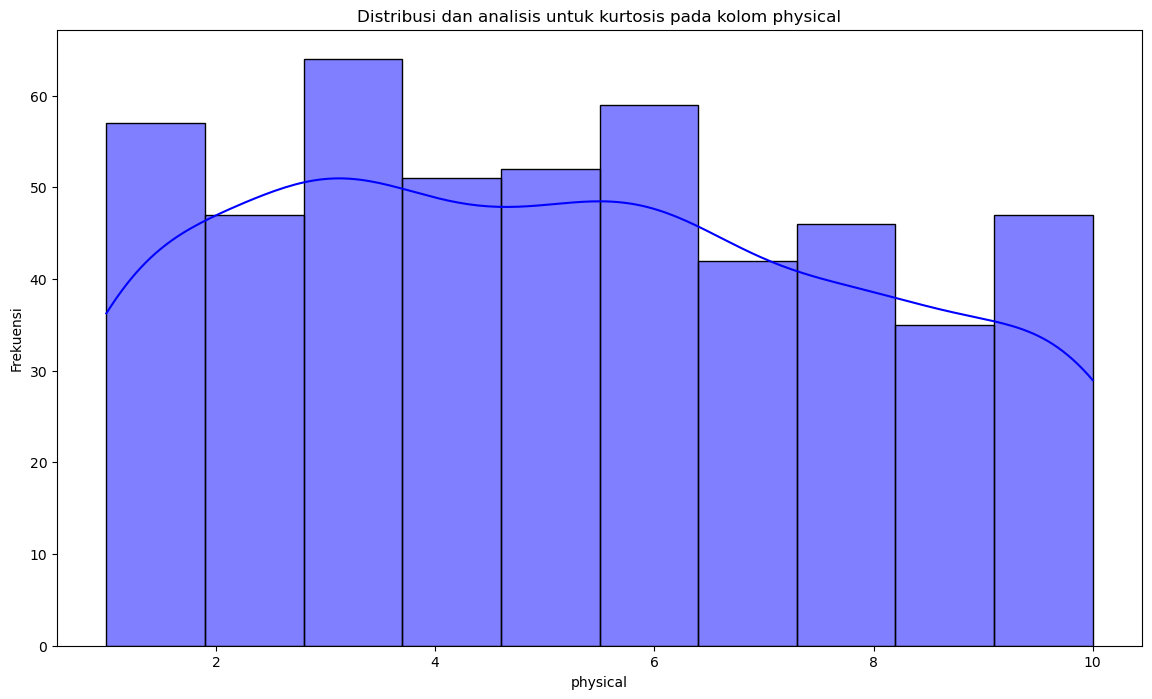

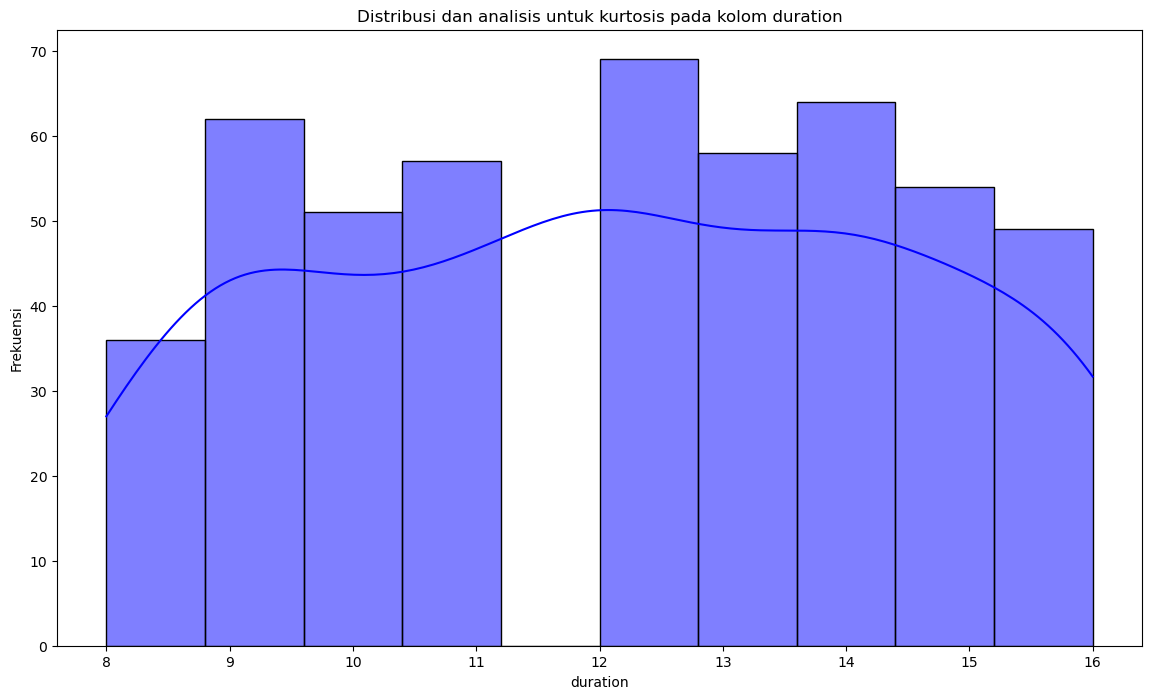

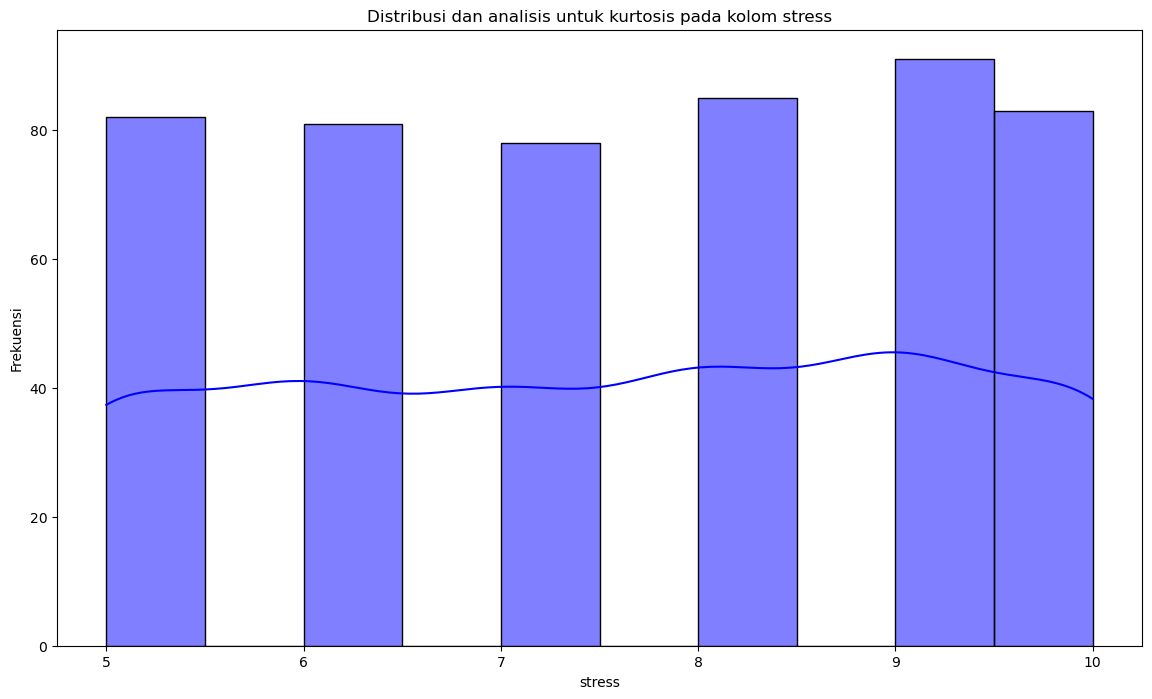

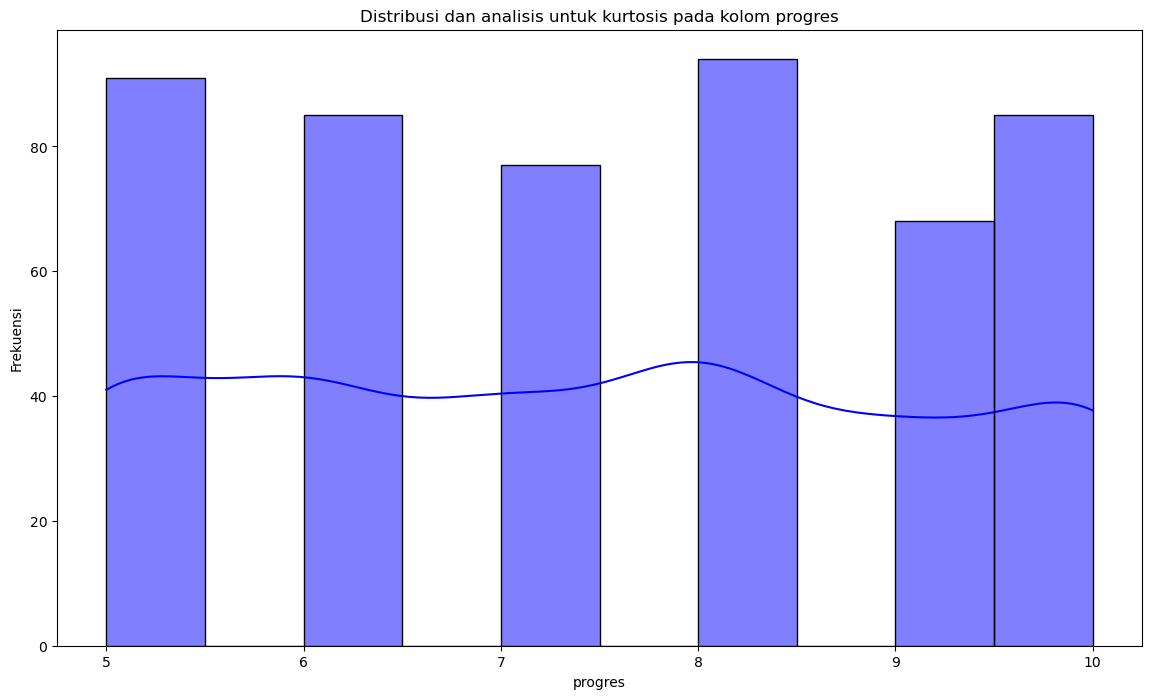

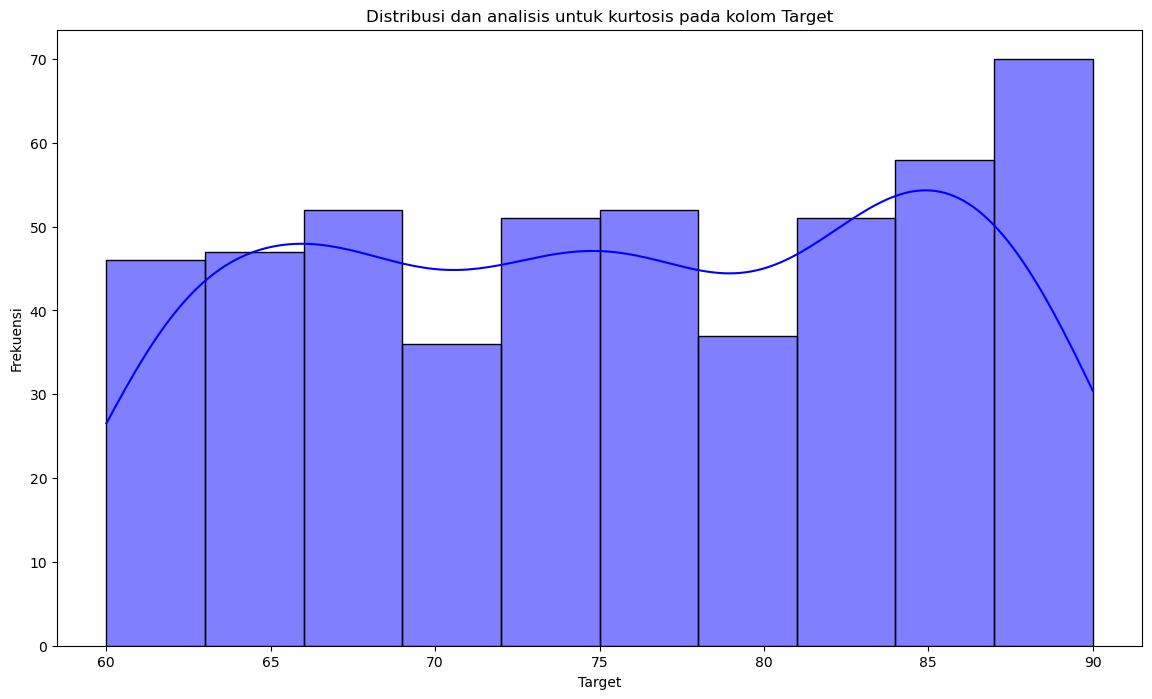

In [70]:
# Menampilkan grafik kurtosis

for col in df_num.columns:  
    plt.figure(figsize=(14, 8))
    sns.histplot(df_num[col], kde=True, color='blue') 
    plt.title(f'Distribusi dan analisis untuk kurtosis pada kolom {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


Dari ukuran Skewness dan kurtosis dapat terlihat bahwa untuk variabel 'symptom', 'duration','stress' dan 'target' memiliki nilai negatif yang berarti data agak sedikit menceng ke kiri, kolom sisanya cenderung simetris(nilai mendekati 0) sehingga data bisa dikatakan berdistribusi hampir normal/mendekati distribusi normal. Sedangkan dari nilai kurtosis dan dari grafik yang ditampilkan nilai dibawah 0 dan memiliki keruncingan yang rendah (tumpul)

#### C. Kuartil dan Kuantil

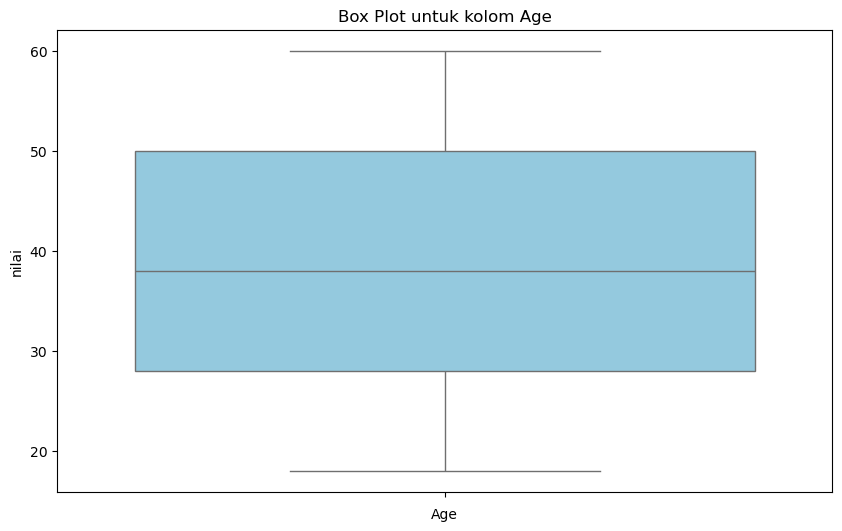

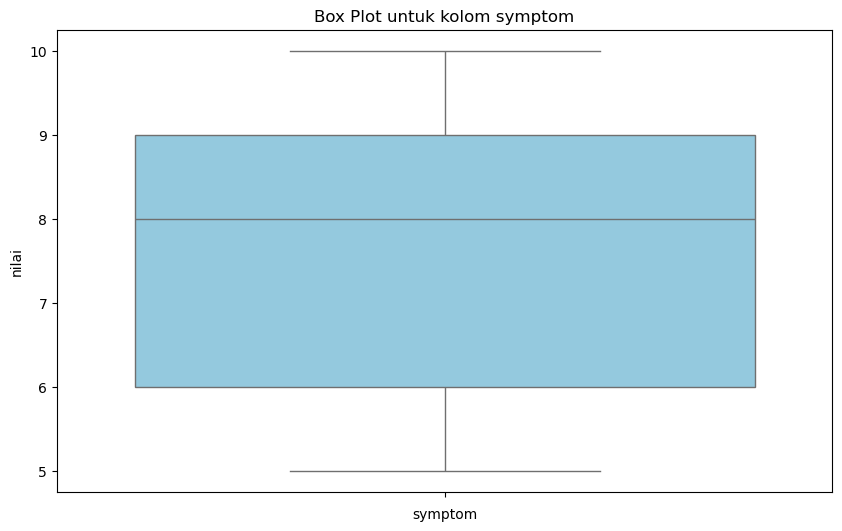

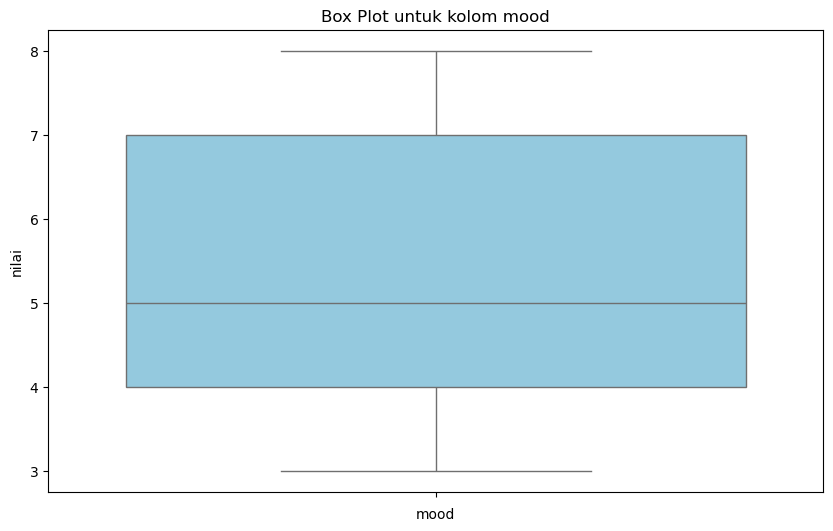

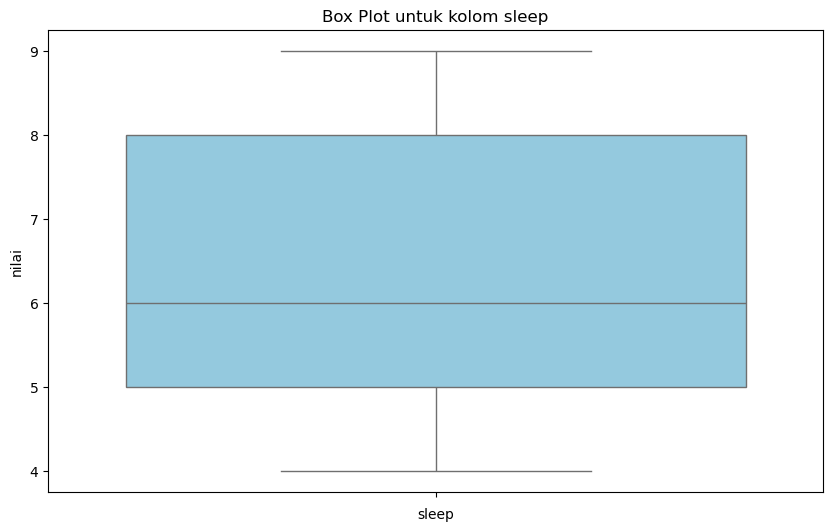

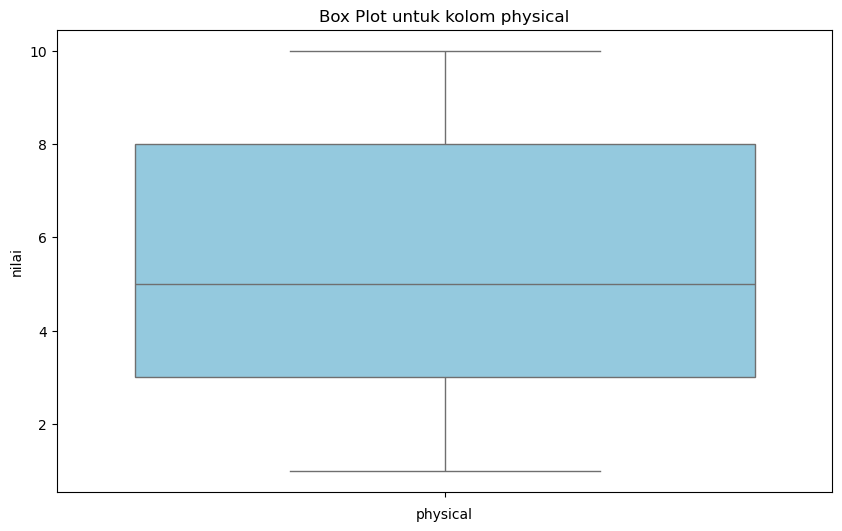

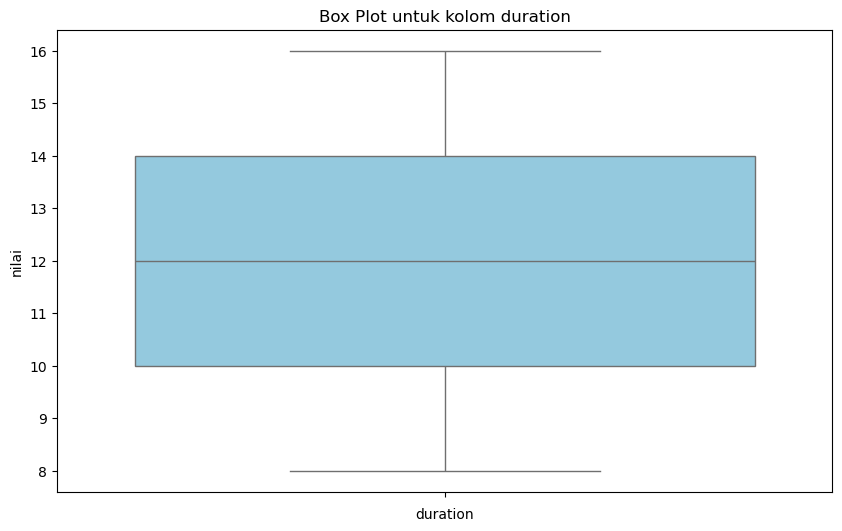

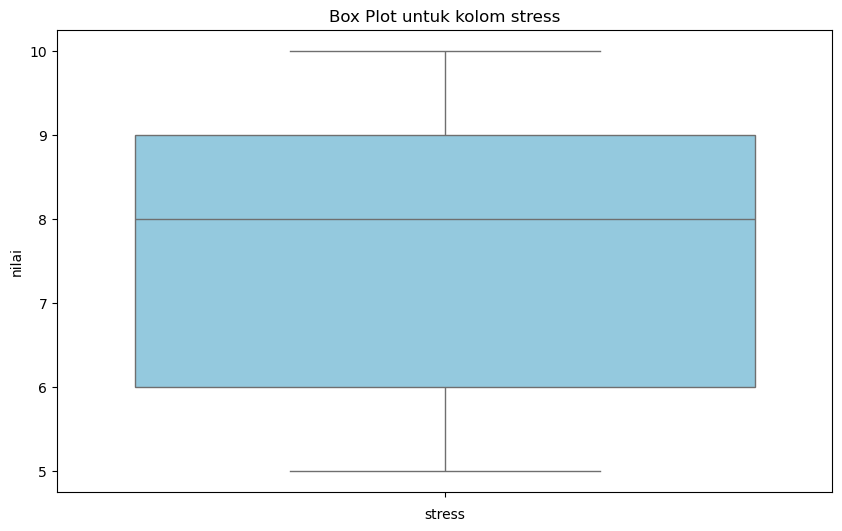

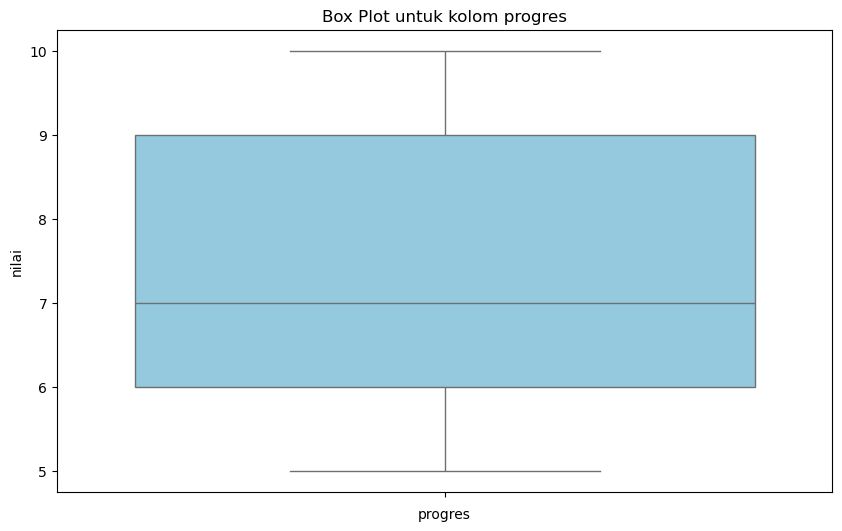

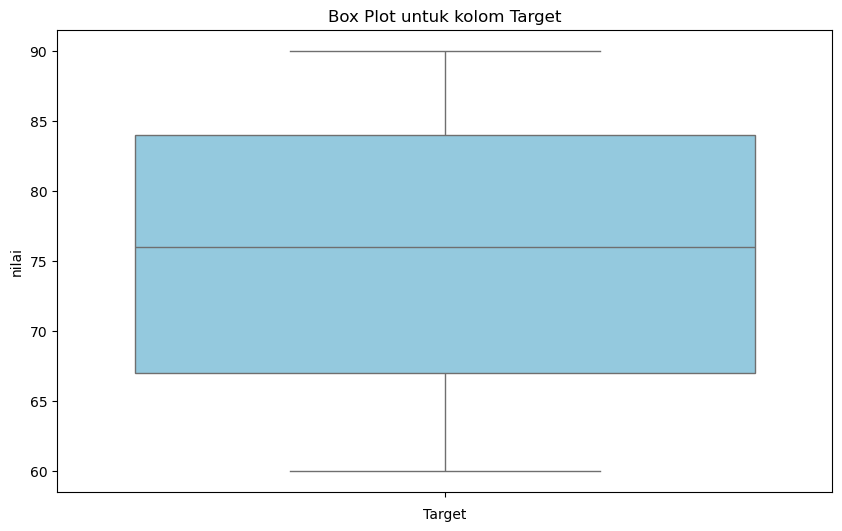

In [73]:
# Kuartil
import seaborn as sns
import matplotlib.pyplot as plt

# menampilkan boxplot untuk kuartil
for col in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_num[col], color="skyblue")
    plt.title(f'Box Plot untuk kolom {col}')
    plt.xlabel(col)
    plt.ylabel('nilai')
    plt.show()


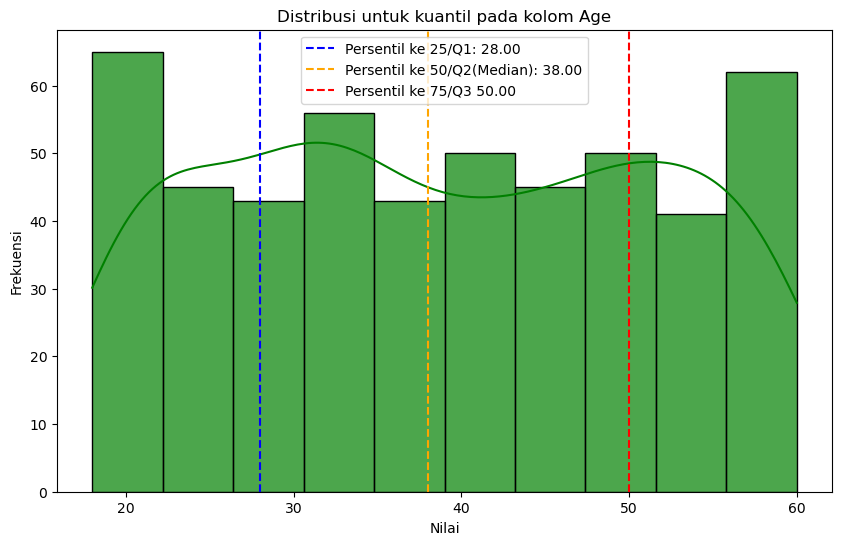

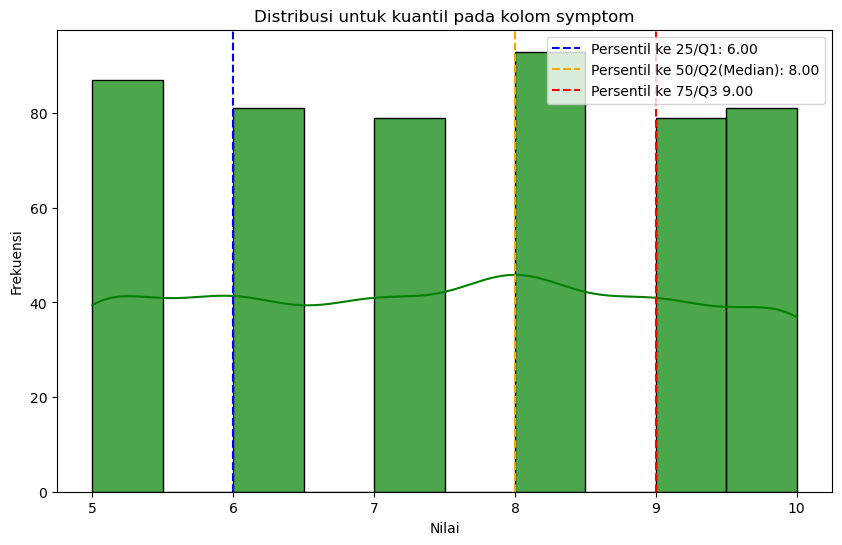

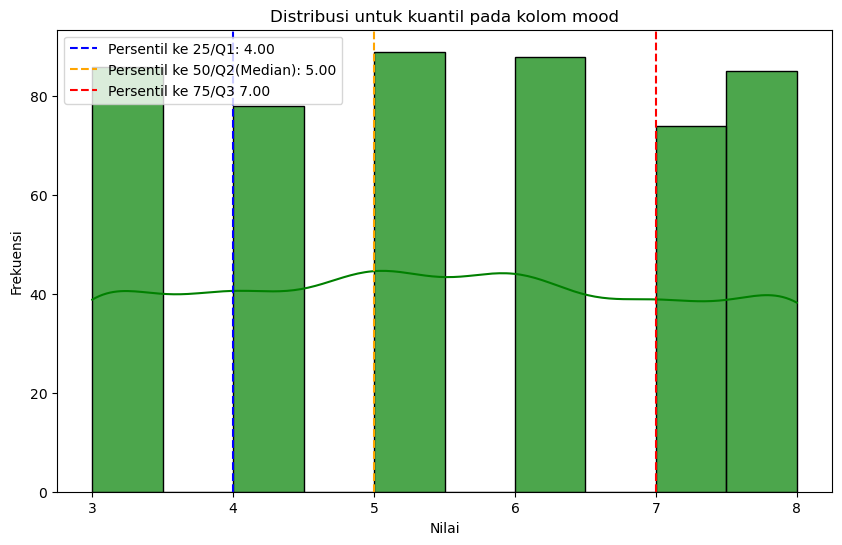

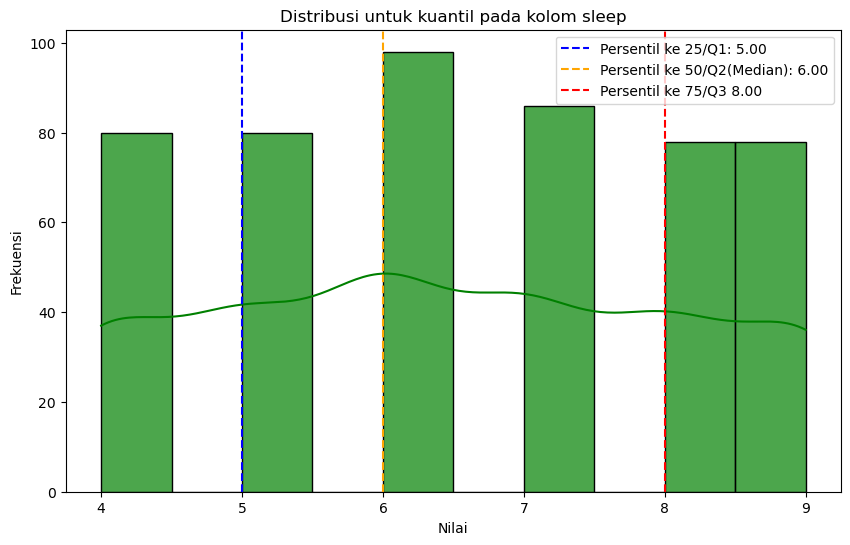

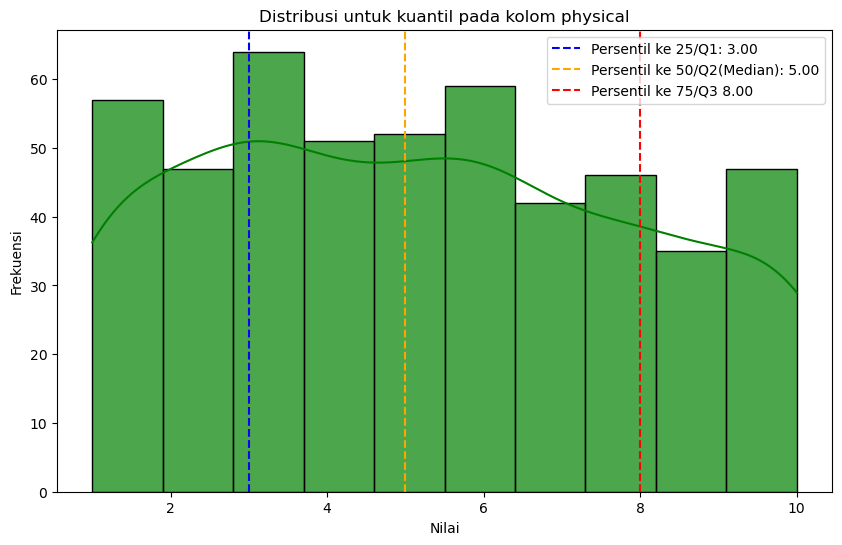

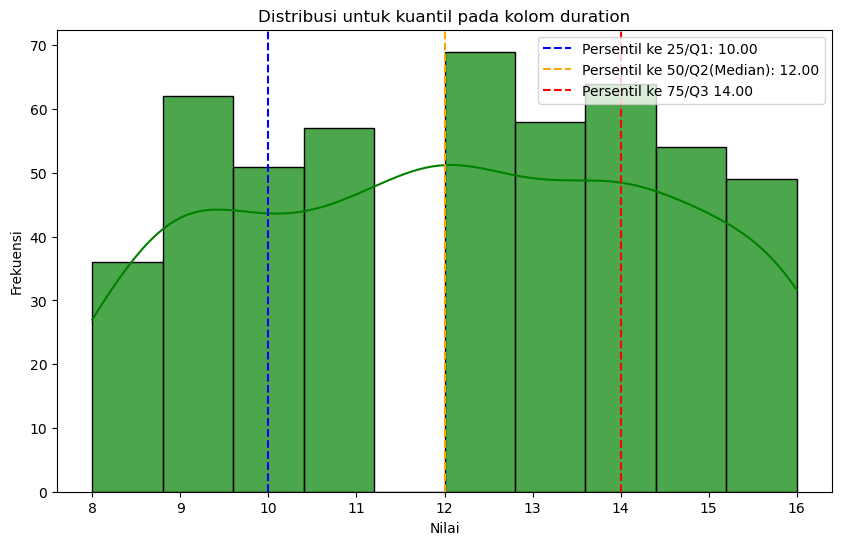

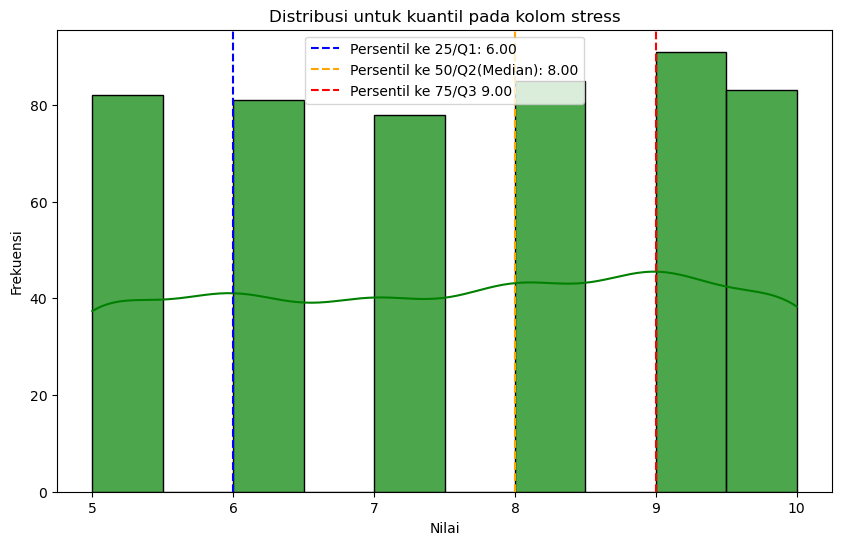

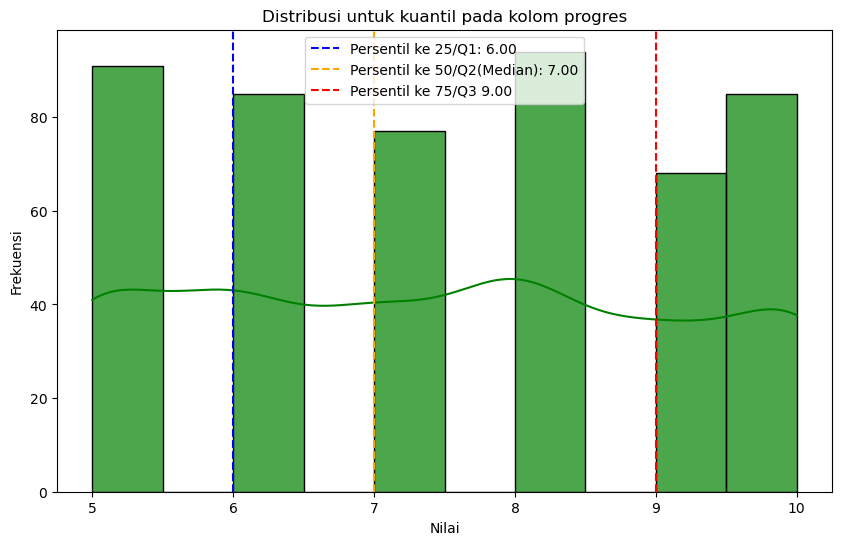

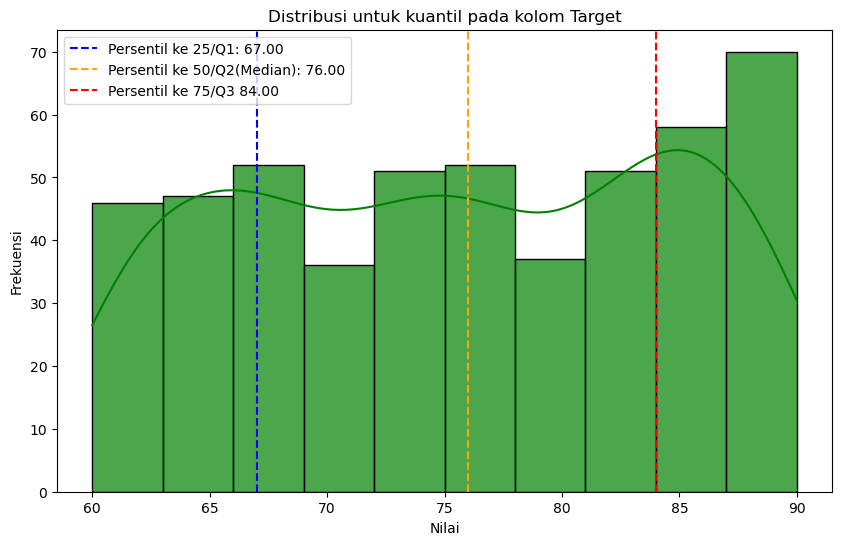

In [74]:


for col in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_num[col], kde=True, color="green", alpha=0.7)
    
    # Melihat kuartil dan kuantil data
    q25 = np.percentile(df_num[col], 25)
    q50 = np.percentile(df_num[col], 50)  # Median
    q75 = np.percentile(df_num[col], 75)
    
    plt.axvline(q25, color="blue", linestyle="--", label=f"Persentil ke 25/Q1: {q25:.2f}")
    plt.axvline(q50, color="orange", linestyle="--", label=f"Persentil ke 50/Q2(Median): {q50:.2f}")
    plt.axvline(q75, color="red", linestyle="--", label=f"Persentil ke 75/Q3 {q75:.2f}")
    
    plt.title(f'Distribusi untuk kuantil pada kolom {col}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.show()


Dari hasil grafik Boxplot dapat terlihat bahwa data numerik yang terdapat di dalam dataset hampir tidak terlihat adanya outlier dari semua kolom numerik, sedangkan dari data kuantil dapat dilihat posisi pemusatan data berada di sebelah data bagian kanan/kiri namun posisi median masih cenderung berada di tengah.

### D. Scatterplot (diagram pencar)

C:\Users\ACER\AppData\Local\Temp\ipykernel_23168\691651528.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


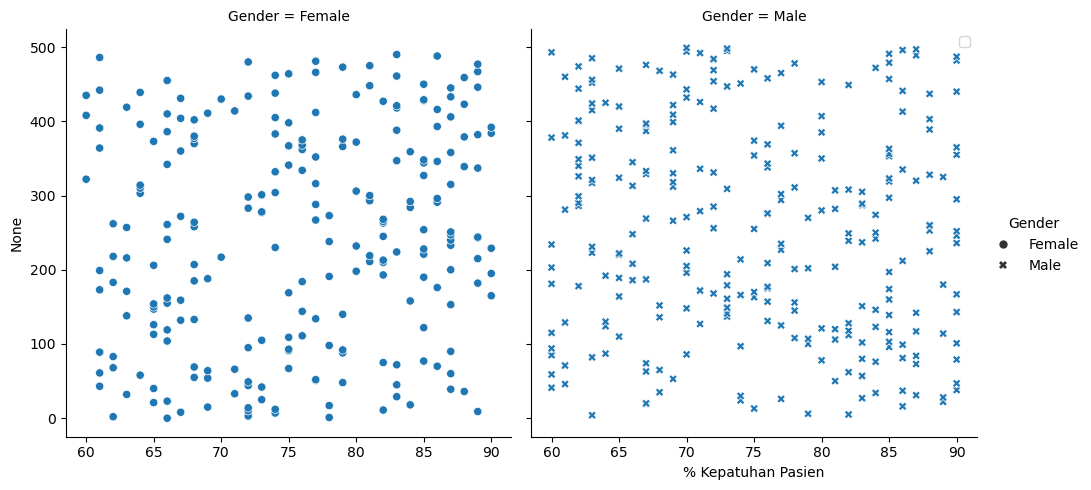

C:\Users\ACER\AppData\Local\Temp\ipykernel_23168\691651528.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


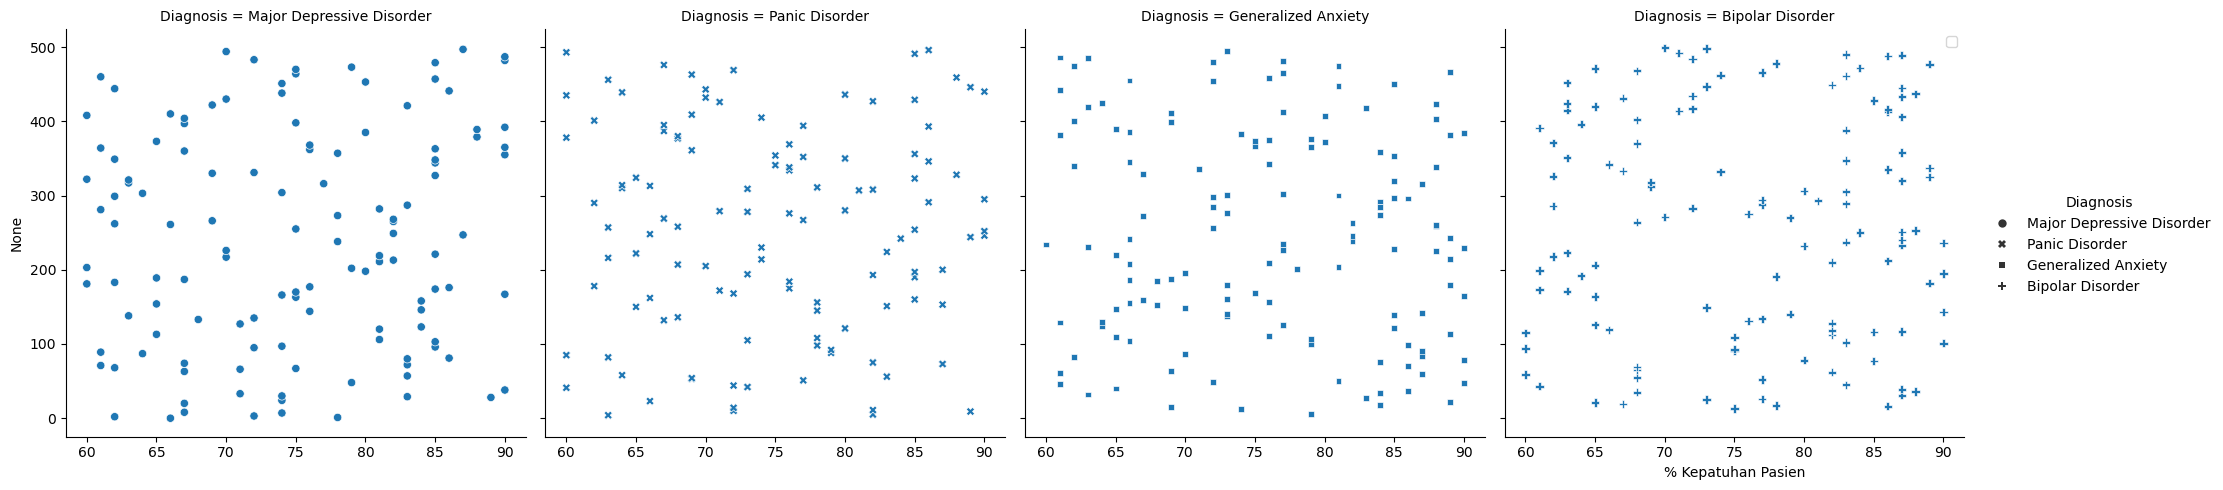

C:\Users\ACER\AppData\Local\Temp\ipykernel_23168\691651528.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


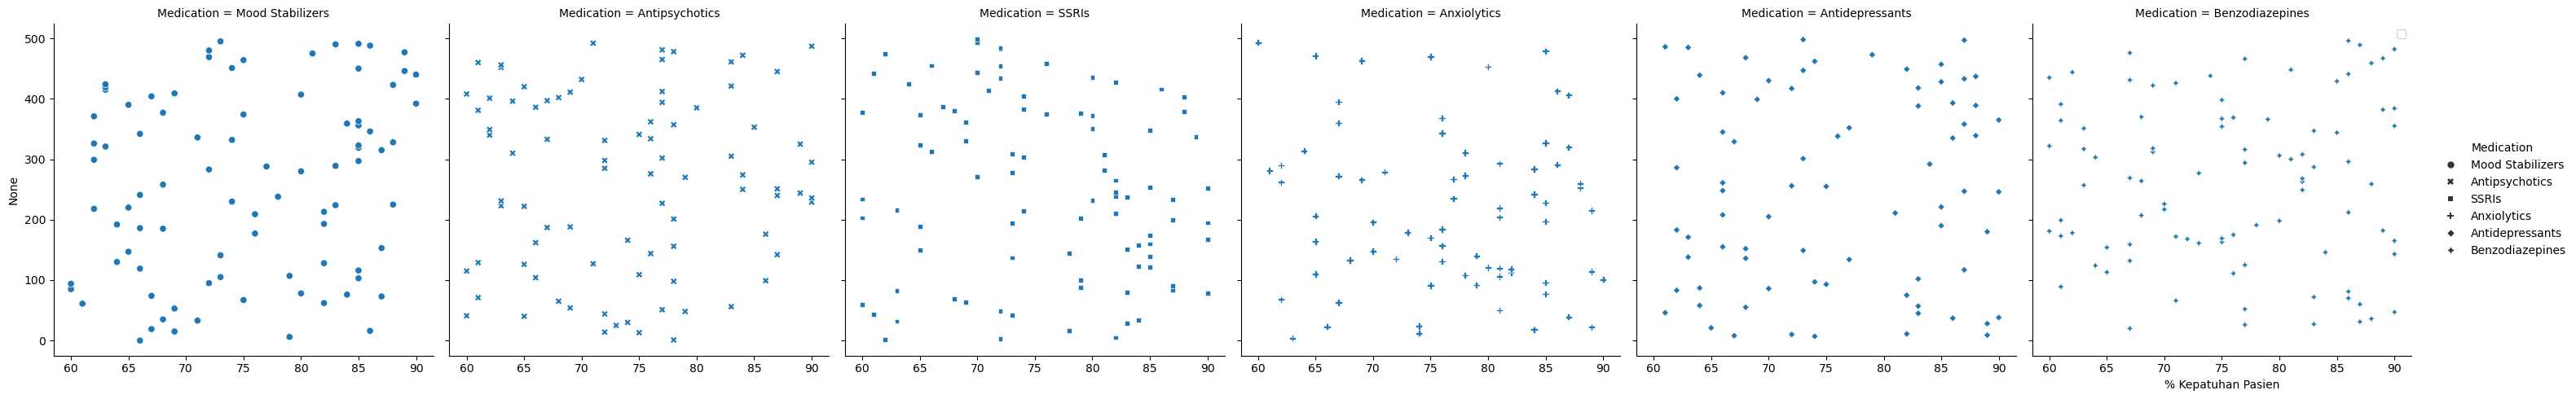

C:\Users\ACER\AppData\Local\Temp\ipykernel_23168\691651528.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


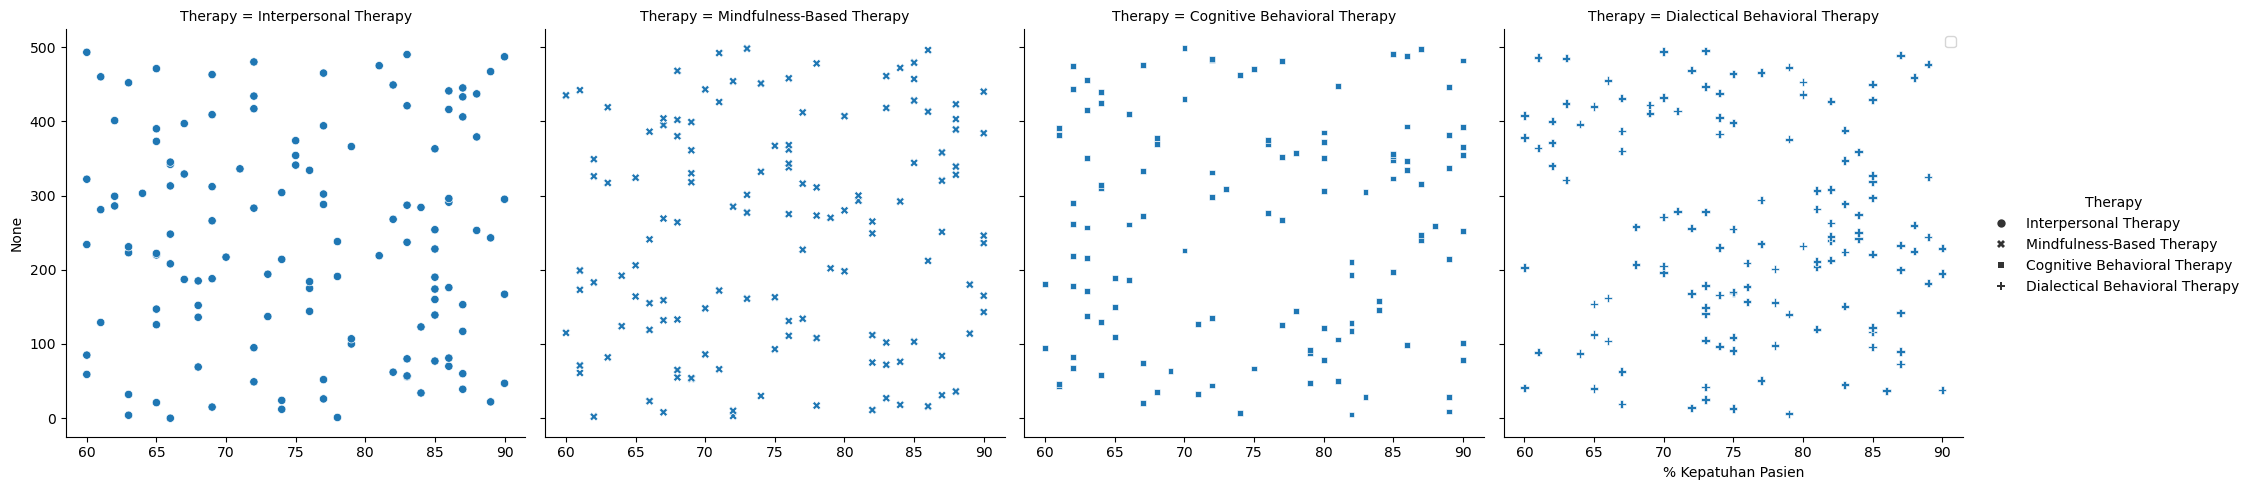

C:\Users\ACER\AppData\Local\Temp\ipykernel_23168\691651528.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


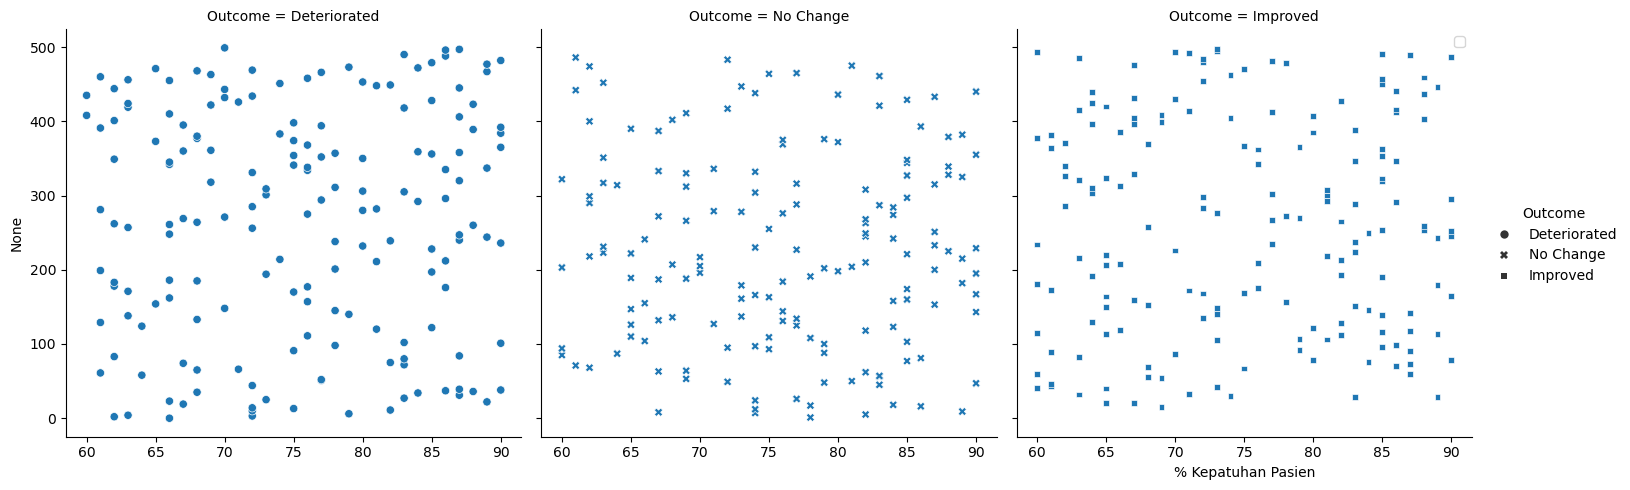

C:\Users\ACER\AppData\Local\Temp\ipykernel_23168\691651528.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


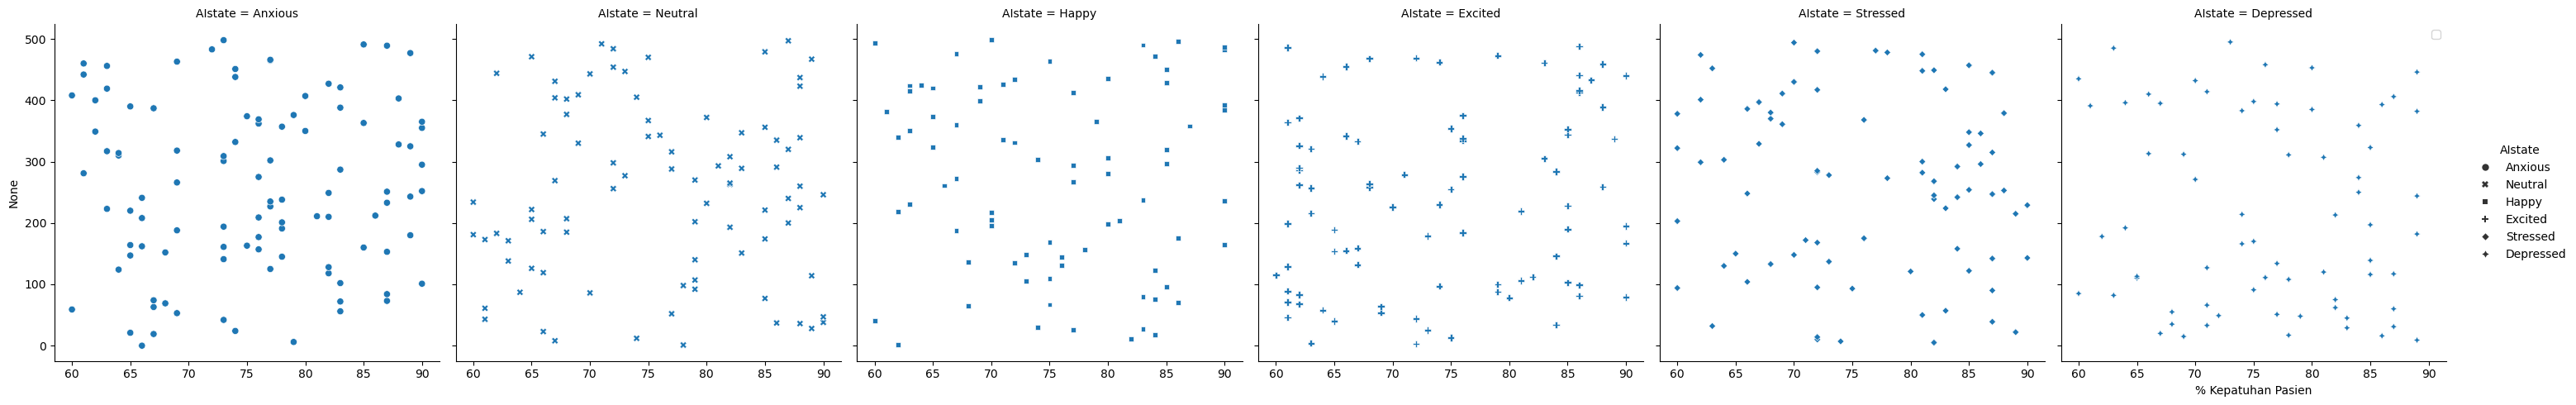

In [77]:
# Untuk melihat sebaran data maka perlu dilihat sebaran secara visual
for col in df_kat.columns:
    sns.relplot(data=df_kat, x=df_num["Target"].values, y=df_kat[col].index, col=df_kat[col], style=df_kat[col],kind="scatter")
    plt.ylabel("Jumlah Pasien")
    plt.xlabel("% Kepatuhan Pasien")
    plt.legend()
    plt.show()

Dari data diatas dapat terlihat bahwa hampir kesemua variabel yang ada di dataset memiliki plot yang cukup tersebar terbukti dari scatterplot yang menyebar secara acak.

## 5.5. Transformasi data menggunakan Label Encoder

Sebelum kita mengubah variabel kedalam label encoder, kita perlu memisahkan data-data yang bersifat kategorik yang akan kita transform ke label encoder

Label Encoder digunakan untuk melakukan kodifikasi terhadap variabel yang memiliki nilai kategorik menjadi nilai yang bersifat kuantitatif (non kategorik). Sebelum kita mengubah variabel kedalam label encoder, kita perlu memisahkan data-data yang bersifat kategorik yang akan kita transform ke label encoder

Dari dataset yang kita miliki terdapat beberapa variabel yang perlu dilakukan transformasi data ke label encoder diantaranya : 

In [148]:
pd.DataFrame(df_kat.value_counts())

count
Gender Diagnosis                 Medication       Therapy                        Outcome      AIstate         
Male   Panic Disorder            SSRIs            Cognitive Behavioral Therapy   Deteriorated Anxious      3  
       Bipolar Disorder          Antipsychotics   Mindfulness-Based Therapy      Deteriorated Happy        3  
       Major Depressive Disorder Anxiolytics      Dialectical Behavioral Therapy Deteriorated Depressed    3  
Female Generalized Anxiety       Antipsychotics   Dialectical Behavioral Therapy No Change    Stressed     3  
Male   Major Depressive Disorder Benzodiazepines  Mindfulness-Based Therapy      No Change    Anxious      3  
       Bipolar Disorder          Antipsychotics   Mindfulness-Based Therapy      Improved     Neutral      2  
Female Bipolar Disorder          Benzodiazepines  Mindfulness-Based Therapy      Deteriorated Excited      2  
Male   Generalized Anxiety       Mood Stabilizers Dialectical Behavioral Therapy Improved     Anxious      2  
Female Generalized Anxiety       SSRIs            Cognitive Behavioral Therapy   No Change    Excited      2  
       Major Depressive Disorder Mood Stabilizers Interpersonal Therapy          Deteriorated Anxious      2  
Male   Panic Disorder            Anxiolytics      Mindfulness-Based Therapy      Deteriorated Depressed    2  
Female Generalized Anxiety       Mood Stabilizers Mindfulness-Based Therapy      Deteriorated Neutral      2  
Male   Major Depressive Disorder Anxiolytics      Interpersonal Therapy          No Change    Anxious      2  
Female Major Depressive Disorder SSRIs            Cognitive Behavioral Therapy   No Change    Stressed     2  
Male   Generalized Anxiety       Antidepressants  Dialectical Behavioral Therapy Deteriorated Neutral      2  
       Major Depressive Disorder Benzodiazepines  Cognitive Behavioral Therapy   Improved     Excited      2  
       Panic Disorder            Antipsychotics   Dialectical Behavioral Therapy Improved     Happy        2  
       Generalized Anxiety       Antidepressants  Interpersonal Therapy          Improved     Anxious      2  
Female Bipolar Disorder          Benzodiazepines  Dialectical Behavioral Therapy Improved     Neutral      2  
       Generalized Anxiety       Benzodiazepines  Mindfulness-Based Therapy      Improved     Neutral      2  
Male   Generalized Anxiety       Antipsychotics   Cognitive Behavioral Therapy   Improved     Excited      2  
Female Generalized Anxiety       Antidepressants  Mindfulness-Based Therapy      Deteriorated Stressed     2  
Male   Generalized Anxiety       Anxiolytics      Mindfulness-Based Therapy      Improved     Neutral      2  
Female Generalized Anxiety       Benzodiazepines  Interpersonal Therapy          Improved     Happy        2  
Male   Major Depressive Disorder SSRIs            Mindfulness-Based Therapy      No Change    Neutral      2  
       Generalized Anxiety       Anxiolytics      Dialectical Behavioral Therapy No Change    Happy        2  
Female Panic Disorder            Antidepressants  Cognitive Behavioral Therapy   No Change    Depressed    2  
                                 Antipsychotics   Dialectical Behavioral Therapy Deteriorated Depressed    2  
Male   Panic Disorder            Benzodiazepines  Mindfulness-Based Therapy      Deteriorated Happy        2  
Female Panic Disorder            SSRIs            Dialectical Behavioral Therapy Improved     Anxious      2  
       Major Depressive Disorder Benzodiazepines  Dialectical Behavioral Therapy Improved     Excited      2  
Male   Major Depressive Disorder Antidepressants  Dialectical Behavioral Therapy No Change    Excited      2  
       Panic Disorder            Mood Stabilizers Mindfulness-Based Therapy      No Change    Anxious      2  
       Bipolar Disorder          Benzodiazepines  Mindfulness-Based Therapy      Deteriorated Anxious      2  
Female Bipolar Disorder          Antidepressants  Mindfulness-Based Therapy      Deteriorated Happy        2 

In [246]:
dle = df.copy()
dle.head()

Patient ID  Age  Gender         Diagnosis           symptom  mood  sleep  \
0       1      43   Female  Major Depressive Disorder    10       5     8     
1       2      40   Female  Major Depressive Disorder     9       5     4     
2       3      55   Female  Major Depressive Disorder     6       3     4     
3       4      34   Female  Major Depressive Disorder     6       3     6     
4       5      52     Male             Panic Disorder     7       6     6     

   physical     Medication             Therapy           treatment   duration  \
0      5     Mood Stabilizers      Interpersonal Therapy 2024-01-25     11      
1      7       Antipsychotics      Interpersonal Therapy 2024-02-27     11      
2      3                SSRIs  Mindfulness-Based Therapy 2024-03-20     14      
3      5                SSRIs  Mindfulness-Based Therapy 2024-03-29      8      
4      8          Anxiolytics      Interpersonal Therapy 2024-03-18     12      

   stress    Outcome     progres AIstate   Target  
0     9    Deteriorated     7     Anxious    66    
1     7       No Change     7     Neutral    78    
2     7    Deteriorated     5       Happy    62    
3     8    Deteriorated    10     Excited    72    
4     5    Deteriorated     6     Excited    63

untuk membedakan hasil antara data yang telah dilakukan encoding dengan yang tidak maka kita perlu membuat 1 duplikat data dari data set awal df menjadi 'data label encoder' atau dle

In [249]:
dle[["Gender","Diagnosis","Medication","Therapy","Outcome","AIstate"]].head(10)

Gender         Diagnosis              Medication     \
0  Female  Major Depressive Disorder  Mood Stabilizers   
1  Female  Major Depressive Disorder    Antipsychotics   
2  Female  Major Depressive Disorder             SSRIs   
3  Female  Major Depressive Disorder             SSRIs   
4    Male             Panic Disorder       Anxiolytics   
5    Male             Panic Disorder             SSRIs   
6    Male        Generalized Anxiety  Mood Stabilizers   
7  Female  Major Depressive Disorder   Antidepressants   
8  Female  Major Depressive Disorder   Antidepressants   
9  Female             Panic Disorder   Antidepressants   

              Therapy                Outcome     AIstate    
0           Interpersonal Therapy  Deteriorated    Anxious  
1           Interpersonal Therapy     No Change    Neutral  
2       Mindfulness-Based Therapy  Deteriorated      Happy  
3       Mindfulness-Based Therapy  Deteriorated    Excited  
4           Interpersonal Therapy  Deteriorated    Excited  
5    Cognitive Behavioral Therapy     No Change   Stressed  
6  Dialectical Behavioral Therapy  Deteriorated    Anxious  
7    Cognitive Behavioral Therapy     No Change   Stressed  
8       Mindfulness-Based Therapy     No Change    Neutral  
9    Cognitive Behavioral Therapy     No Change  Depressed

In [251]:
from sklearn.preprocessing import LabelEncoder
# Melakukan label Encoder
le = LabelEncoder()
for col in dle[["Gender","Diagnosis","Medication","Therapy","Outcome","AIstate"]].columns:
    array = np.array(dle[col].unique())
    le.fit(array)
    encoded_labels = le.transform(dle[col].unique())
    print(encoded_labels) 
    original_labels = le.inverse_transform(encoded_labels)
    print(original_labels)
  # Memaskukan Variabel Transformasi pada Dataset
    dle[f'En_{col}'] = le.fit_transform(dle[col])
dle.tail()

[0 1]
['Female' 'Male']
[2 3 1 0]
['Major Depressive Disorder' 'Panic Disorder' 'Generalized Anxiety'
 'Bipolar Disorder']
[4 1 5 2 0 3]
['Mood Stabilizers' 'Antipsychotics' 'SSRIs' 'Anxiolytics'
 'Antidepressants' 'Benzodiazepines']
[2 3 0 1]
['Interpersonal Therapy' 'Mindfulness-Based Therapy'
 'Cognitive Behavioral Therapy' 'Dialectical Behavioral Therapy']
[0 2 1]
['Deteriorated' 'No Change' 'Improved']
[0 4 3 2 5 1]
['Anxious' 'Neutral' 'Happy' 'Excited' 'Stressed' 'Depressed']


Patient ID  Age Gender         Diagnosis           symptom  mood  sleep  \
495      496     24   Male         Generalized Anxiety    10       4     8     
496      497     22   Male              Panic Disorder     5       6     6     
497      498     23   Male   Major Depressive Disorder     7       3     4     
498      499     48   Male            Bipolar Disorder     9       4     6     
499      500     58   Male            Bipolar Disorder     5       7     6     

     physical     Medication                Therapy             treatment   \
495      6     Mood Stabilizers  Dialectical Behavioral Therapy 2024-04-09   
496      7      Benzodiazepines       Mindfulness-Based Therapy 2024-02-05   
497      2      Antidepressants    Cognitive Behavioral Therapy 2024-03-24   
498      9      Antidepressants       Mindfulness-Based Therapy 2024-03-22   
499      2                SSRIs    Cognitive Behavioral Therapy 2024-03-24   

     duration  stress    Outcome     progres  AIstate    Target  En_Gender  \
495      8        9        Improved    10     Depressed    73        1       
496     13        6    Deteriorated     8         Happy    86        1       
497     10        5    Deteriorated     5       Neutral    87        1       
498     10        6        Improved     7       Anxious    73        1       
499     10        6    Deteriorated     5         Happy    70        1       

     En_Diagnosis  En_Medication  En_Therapy  En_Outcome  En_AIstate  
495        1             4             1           1           1      
496        3             3             3           0           3      
497        2             0             0           0           4      
498        0             0             3           1           0      
499        0             5             0           0           3

In [253]:
dle.columns.values

array(['Patient ID', 'Age', 'Gender', 'Diagnosis', 'symptom', 'mood',
       'sleep', 'physical', 'Medication', 'Therapy', 'treatment',
       'duration', 'stress', 'Outcome', 'progres', 'AIstate', 'Target',
       'En_Gender', 'En_Diagnosis', 'En_Medication', 'En_Therapy',
       'En_Outcome', 'En_AIstate'], dtype=object)

In [255]:
# Membuat dataset hasil label encoder dengan membuang variabel yang bersifat kategorik
df_le = dle.drop(np.array(df_kat.columns.values),axis=1)
df_le.tail()
df_le=df_le.drop(['Patient ID','treatment'],axis=1)
df_le

Age  symptom  mood  sleep  physical  duration  stress  progres  Target  \
0    43     10       5     8        5        11        9       7       66     
1    40      9       5     4        7        11        7       7       78     
2    55      6       3     4        3        14        7       5       62     
3    34      6       3     6        5         8        8      10       72     
4    52      7       6     6        8        12        5       6       63     
5    28      8       7     6        4        13        9       7       82     
6    59      6       6     5        3        13        8       5       79     
7    32      5       3     5        2        12        5       6       74     
8    21      6       7     7       10        15        5       6       67     
9    21      9       5     9        7        11        8       8       89     
10   42      6       6     7        2        11        5       8       72     
11   54      8       8     5        5        10        8      10       82     
12   46      7       4     9        4         8        9       7       74     
13   19      6       7     9       10         9       10      10       75     
14   23      9       8     6        1        10        7       6       72     
15   38     10       3     8        2        15        5       7       69     
16   30     10       8     5        5         9        9       6       86     
17   28      8       4     7        6         9        8       6       78     
18   52      7       3     4        9        12        6       5       84     
19   37      5       5     4        5        15        9       6       67     
20   19      8       4     5        7        14        5       5       67     
21   41      5       7     9        7         9        9       5       65     
22   50      7       4     5        1        16       10      10       89     
23   53      9       5     9       10        16        8       9       66     
24   60      9       6     5        8        13        9       7       74     
25   19      9       7     9        6        15        8       6       73     
26   23      7       5     7        6        15        5      10       77     
27   56     10       5     8        1        10        7       8       83     
28   58      8       6     7        6         8        6       6       89     
29   41      7       6     6        9        14        8       9       83     
30   44      6       3     5        3        15        7       6       74     
31   47      7       6     7        5         9        9       8       87     
32   39     10       6     4        3        14        6       6       63     
33   27      7       7     4        9        15        8       6       71     
34   53      6       5     6       10        10        6       9       84     
35   53     10       6     5        7        11        9       7       68     
36   45      5       5     6        6        14        9       6       88     
37   33      5       6     6        2        10        8       5       86     
38   31      6       8     4       10        12        6       9       90     
39   41      8       7     7        2        14        7       8       87     
40   46      9       8     8        1        13        7       8       65     
41   56      5       7     6        4        11        9      10       60     
42   31      6       5     9       10        13        7      10       73     
43   50      8       8     7        2        14        9       6       61     
44   40     10       8     7        8        12        5      10       72     
45   43      9       6     5       10         9       10       9       83     
46   48     10       5     5        9        16        9       6       61     
47   26      6       3     5        6        16        9       6       90     
48   41      7       6     9       10        11       10      10       79     
49   46     10       5     4        2        13        

## 5.6 Korelasi Pearson

Pada langkah ini dilakukan pendeteksian seberapa kuat hubungan antara 2 variabel yang terdapat pada data set obesitas dengan rentang nilai -1 hingga 1 tetapi korelasi Pearson tidak memberikan informasi tentang penyebab dan akibat.

- Jika mendekati 1 maka menunjukkan hubungan linear positif antara 2 variabel
- Jika mendekati -1 maka menunjukkan hubungan linear negatif antara 2 variabel
- Jika mendekati 0 maka tidak ada hubungan

In [259]:
df_kat.columns.values

array(['Gender', 'Diagnosis', 'Medication', 'Therapy', 'Outcome',
       'AIstate'], dtype=object)

In [261]:
# Menghitung korelasi antar kolom pada DataFrame 'df' menggunakan metode korelasi Pearson
pearson_corr = df_le.corr(method='pearson')

# Menampilkan nilai korelasi antar kolom dalam bentuk tabel
pearson_corr


Age     symptom    mood      sleep   physical  duration  \
Age            1.000000 -0.029307  0.033086 -0.015412  0.000531 -0.107012   
symptom       -0.029307  1.000000  0.050077  0.037451 -0.003165  0.008522   
mood           0.033086  0.050077  1.000000  0.064199  0.021962 -0.078622   
sleep         -0.015412  0.037451  0.064199  1.000000 -0.007632  0.007402   
physical       0.000531 -0.003165  0.021962 -0.007632  1.000000 -0.043202   
duration      -0.107012  0.008522 -0.078622  0.007402 -0.043202  1.000000   
stress        -0.038351 -0.018921 -0.075265  0.036606  0.013451  0.037554   
progres        0.014498 -0.005586  0.052336  0.082247  0.002838 -0.001418   
Target        -0.022374 -0.049310  0.041277  0.018225 -0.053863 -0.065593   
En_Gender     -0.026300 -0.073244 -0.054543 -0.104750  0.039059  0.012723   
En_Diagnosis  -0.059438 -0.066564  0.022068 -0.055642 -0.022092 -0.031056   
En_Medication  0.014496  0.027075  0.002921 -0.045535  0.039729 -0.032703   
En_Therapy    -0.016006  0.074246 -0.055553 -0.021608 -0.074231 -0.080661   
En_Outcome    -0.120919 -0.003271  0.034341 -0.010842 -0.056993  0.054865   
En_AIstate    -0.026362  0.001179  0.038919 -0.041945 -0.086281  0.053728   

                stress    progres   Target   En_Gender  En_Diagnosis  \
Age           -0.038351  0.014498 -0.022374 -0.026300    -0.059438     
symptom       -0.018921 -0.005586 -0.049310 -0.073244    -0.066564     
mood          -0.075265  0.052336  0.041277 -0.054543     0.022068     
sleep          0.036606  0.082247  0.018225 -0.104750    -0.055642     
physical       0.013451  0.002838 -0.053863  0.039059    -0.022092     
duration       0.037554 -0.001418 -0.065593  0.012723    -0.031056     
stress         1.000000  0.001933 -0.030839 -0.019181     0.006087     
progres        0.001933  1.000000 -0.028505  0.051224     0.093322     
Target        -0.030839 -0.028505  1.000000 -0.024180    -0.054861     
En_Gender     -0.019181  0.051224 -0.024180  1.000000     0.025679     
En_Diagnosis   0.006087  0.093322 -0.054861  0.025679     1.000000     
En_Medication -0.004979 -0.009043  0.018883 -0.019575     0.067000     
En_Therapy    -0.080786 -0.013996  0.007485  0.021466    -0.123363     
En_Outcome    -0.029560  0.083222  0.025353 -0.007976    -0.007634     
En_AIstate    -0.024896  0.007203  0.021847 -0.144594    -0.004856     

               En_Medication  En_Therapy  En_Outcome  En_AIstate  
Age              0.014496     -0.016006   -0.120919   -0.026362   
symptom          0.027075      0.074246   -0.003271    0.001179   
mood             0.002921     -0.055553    0.034341    0.038919   
sleep           -0.045535     -0.021608   -0.010842   -0.041945   
physical         0.039729     -0.074231   -0.056993   -0.086281   
duration        -0.032703     -0.080661    0.054865    0.053728   
stress          -0.004979     -0.080786   -0.029560   -0.024896   
progres         -0.009043     -0.013996    0.083222    0.007203   
Target           0.018883      0.007485    0.025353    0.021847   
En_Gender       -0.019575      0.021466   -0.007976   -0.144594   
En_Diagnosis     0.067000     -0.123363   -0.007634   -0.004856   
En_Medication    1.000000     -0.063080    0.072090   -0.028289   
En_Therapy      -0.063080      1.000000   -0.038959    0.020269   
En_Outcome       0.072090     -0.038959    1.000000    0.017207   
En_AIstate      -0.028289      0.020269    0.017207    1.000000

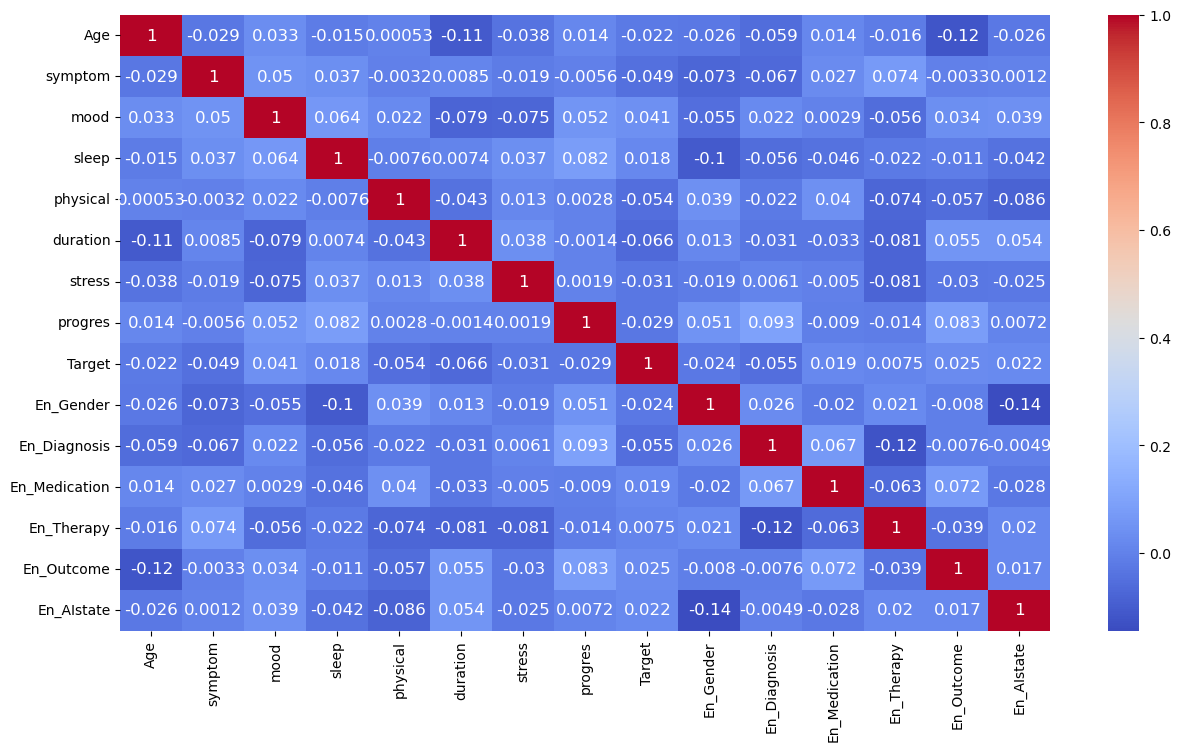

In [263]:
# Membuat gambar plot dengan ukuran (figsize) 15x8
plt.figure(figsize=(15, 8))

# Membuat heatmap menggunakan seaborn untuk memvisualisasikan matriks korelasi
# Parameter 'cmap' mengatur skema warna heatmap menjadi 'Reds'
# Parameter 'annot=True' mengaktifkan penulisan nilai korelasi di dalam sel
# Parameter 'annot_kws={'fontsize':12}' mengatur ukuran font untuk nilai korelasi menjadi 12
sns.heatmap(pearson_corr, cmap='coolwarm', annot=True, annot_kws={'fontsize': 12})

# Menampilkan gambar plot
plt.show()


Dapat terlihat bahwa setelah dilakukan label encoder sekalipun nilai untuk korelasi masih sangat rendah bahkan hampir semua korelasi masih bernilai dibawah 0,1 sehingga hal ini dapat memengaruhi terhadap nilai R2 apabila tidak dilakukan perbapihan data lebih lanjut

# 6. Preprocessing Data

Pada tahapan ini akan dilakukan beberapa perapihan data yang sekiranya perlu untuk dilakukan, seperti pengecekan outlier, penghapusan outlier, pengisian data missing value dan tindakan lainnya bila diperlukan.

## 6.1. Deteksi dan menangani Outlier

In [269]:
# Melakukan copy data
dle1 = dle.copy()

# Melihat susunan kolom dataset
dle1.columns.values

array(['Patient ID', 'Age', 'Gender', 'Diagnosis', 'symptom', 'mood',
       'sleep', 'physical', 'Medication', 'Therapy', 'treatment',
       'duration', 'stress', 'Outcome', 'progres', 'AIstate', 'Target',
       'En_Gender', 'En_Diagnosis', 'En_Medication', 'En_Therapy',
       'En_Outcome', 'En_AIstate'], dtype=object)

In [271]:
# Melakukan pengecekan Outlier
kolom = dle1.drop(['Gender', 'Diagnosis', 'Medication', 'Therapy', 'Outcome',
       'AIstate','treatment'],axis=1)

In [273]:
kolom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Patient ID     500 non-null    int64
 1   Age            500 non-null    int64
 2   symptom        500 non-null    int64
 3   mood           500 non-null    int64
 4   sleep          500 non-null    int64
 5   physical       500 non-null    int64
 6   duration       500 non-null    int64
 7   stress         500 non-null    int64
 8   progres        500 non-null    int64
 9   Target         500 non-null    int64
 10  En_Gender      500 non-null    int32
 11  En_Diagnosis   500 non-null    int32
 12  En_Medication  500 non-null    int32
 13  En_Therapy     500 non-null    int32
 14  En_Outcome     500 non-null    int32
 15  En_AIstate     500 non-null    int32
dtypes: int32(6), int64(10)
memory usage: 50.9 KB


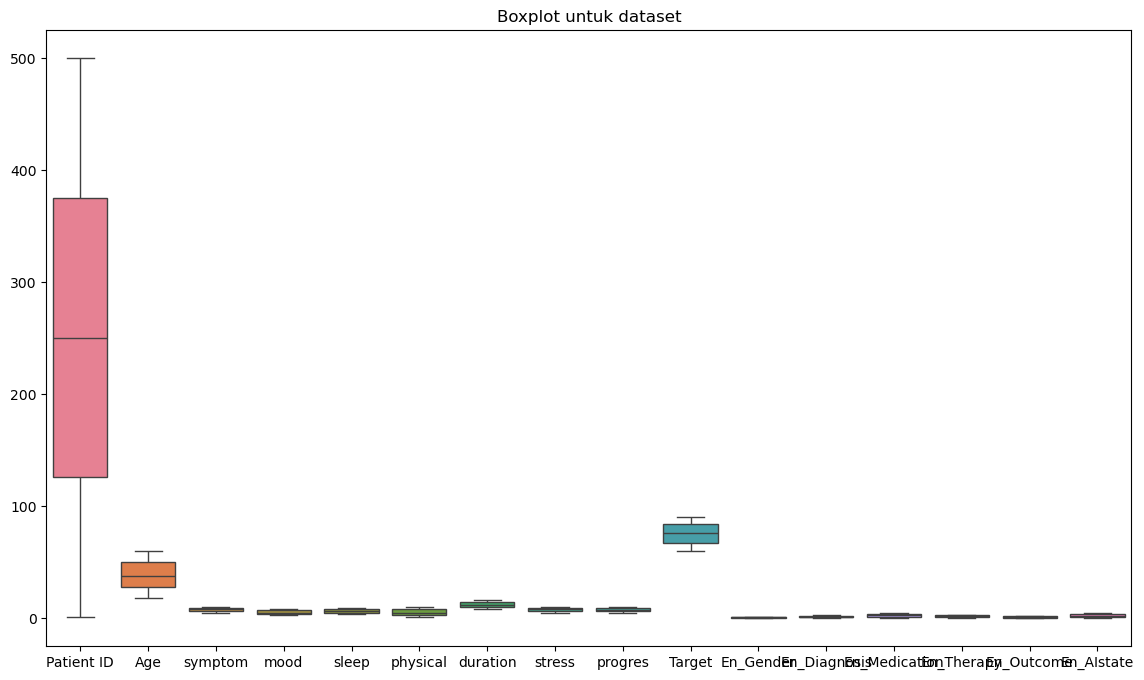

In [275]:
# Membuat iterasi pengecekan outlier dengan boxplot
plt.figure(figsize=(14,8))
sns.boxplot(data=kolom)
plt.title("Boxplot untuk dataset")
plt.show()

Dari boxplot diatas dapat terlihat bahwa ke semua variabel yang ada di dataset tidak terlihat memiliki adanya outlier

## 6.2. Transformasi data menggunakan Label Encoder

Sebelum kita mengubah variabel kedalam label encoder, kita perlu memisahkan data-data yang bersifat kategorik yang akan kita transform ke label encoder

Label Encoder digunakan untuk melakukan kodifikasi terhadap variabel yang memiliki nilai kategorik menjadi nilai yang bersifat kuantitatif (non kategorik). Sebelum kita mengubah variabel kedalam label encoder, kita perlu memisahkan data-data yang bersifat kategorik yang akan kita transform ke label encoder

Dari dataset yang kita miliki terdapat beberapa variabel yang perlu dilakukan transformasi data ke label encoder diantaranya : 

In [282]:
pd.DataFrame(df_kat.value_counts())

count
Gender Diagnosis                 Medication       Therapy                        Outcome      AIstate         
Male   Panic Disorder            SSRIs            Cognitive Behavioral Therapy   Deteriorated Anxious      3  
       Bipolar Disorder          Antipsychotics   Mindfulness-Based Therapy      Deteriorated Happy        3  
       Major Depressive Disorder Anxiolytics      Dialectical Behavioral Therapy Deteriorated Depressed    3  
Female Generalized Anxiety       Antipsychotics   Dialectical Behavioral Therapy No Change    Stressed     3  
Male   Major Depressive Disorder Benzodiazepines  Mindfulness-Based Therapy      No Change    Anxious      3  
       Bipolar Disorder          Antipsychotics   Mindfulness-Based Therapy      Improved     Neutral      2  
Female Bipolar Disorder          Benzodiazepines  Mindfulness-Based Therapy      Deteriorated Excited      2  
Male   Generalized Anxiety       Mood Stabilizers Dialectical Behavioral Therapy Improved     Anxious      2  
Female Generalized Anxiety       SSRIs            Cognitive Behavioral Therapy   No Change    Excited      2  
       Major Depressive Disorder Mood Stabilizers Interpersonal Therapy          Deteriorated Anxious      2  
Male   Panic Disorder            Anxiolytics      Mindfulness-Based Therapy      Deteriorated Depressed    2  
Female Generalized Anxiety       Mood Stabilizers Mindfulness-Based Therapy      Deteriorated Neutral      2  
Male   Major Depressive Disorder Anxiolytics      Interpersonal Therapy          No Change    Anxious      2  
Female Major Depressive Disorder SSRIs            Cognitive Behavioral Therapy   No Change    Stressed     2  
Male   Generalized Anxiety       Antidepressants  Dialectical Behavioral Therapy Deteriorated Neutral      2  
       Major Depressive Disorder Benzodiazepines  Cognitive Behavioral Therapy   Improved     Excited      2  
       Panic Disorder            Antipsychotics   Dialectical Behavioral Therapy Improved     Happy        2  
       Generalized Anxiety       Antidepressants  Interpersonal Therapy          Improved     Anxious      2  
Female Bipolar Disorder          Benzodiazepines  Dialectical Behavioral Therapy Improved     Neutral      2  
       Generalized Anxiety       Benzodiazepines  Mindfulness-Based Therapy      Improved     Neutral      2  
Male   Generalized Anxiety       Antipsychotics   Cognitive Behavioral Therapy   Improved     Excited      2  
Female Generalized Anxiety       Antidepressants  Mindfulness-Based Therapy      Deteriorated Stressed     2  
Male   Generalized Anxiety       Anxiolytics      Mindfulness-Based Therapy      Improved     Neutral      2  
Female Generalized Anxiety       Benzodiazepines  Interpersonal Therapy          Improved     Happy        2  
Male   Major Depressive Disorder SSRIs            Mindfulness-Based Therapy      No Change    Neutral      2  
       Generalized Anxiety       Anxiolytics      Dialectical Behavioral Therapy No Change    Happy        2  
Female Panic Disorder            Antidepressants  Cognitive Behavioral Therapy   No Change    Depressed    2  
                                 Antipsychotics   Dialectical Behavioral Therapy Deteriorated Depressed    2  
Male   Panic Disorder            Benzodiazepines  Mindfulness-Based Therapy      Deteriorated Happy        2  
Female Panic Disorder            SSRIs            Dialectical Behavioral Therapy Improved     Anxious      2  
       Major Depressive Disorder Benzodiazepines  Dialectical Behavioral Therapy Improved     Excited      2  
Male   Major Depressive Disorder Antidepressants  Dialectical Behavioral Therapy No Change    Excited      2  
       Panic Disorder            Mood Stabilizers Mindfulness-Based Therapy      No Change    Anxious      2  
       Bipolar Disorder          Benzodiazepines  Mindfulness-Based Therapy      Deteriorated Anxious      2  
Female Bipolar Disorder          Antidepressants  Mindfulness-Based Therapy      Deteriorated Happy        2 

untuk membedakan hasil antara data yang telah dilakukan encoding dengan yang tidak maka kita perlu membuat 1 duplikat data dari data set awal df menjadi 'data label encoder' atau dle

In [285]:
dle[["Gender","Diagnosis","Medication","Therapy","Outcome","AIstate"]].head(10)

Gender         Diagnosis              Medication     \
0  Female  Major Depressive Disorder  Mood Stabilizers   
1  Female  Major Depressive Disorder    Antipsychotics   
2  Female  Major Depressive Disorder             SSRIs   
3  Female  Major Depressive Disorder             SSRIs   
4    Male             Panic Disorder       Anxiolytics   
5    Male             Panic Disorder             SSRIs   
6    Male        Generalized Anxiety  Mood Stabilizers   
7  Female  Major Depressive Disorder   Antidepressants   
8  Female  Major Depressive Disorder   Antidepressants   
9  Female             Panic Disorder   Antidepressants   

              Therapy                Outcome     AIstate    
0           Interpersonal Therapy  Deteriorated    Anxious  
1           Interpersonal Therapy     No Change    Neutral  
2       Mindfulness-Based Therapy  Deteriorated      Happy  
3       Mindfulness-Based Therapy  Deteriorated    Excited  
4           Interpersonal Therapy  Deteriorated    Excited  
5    Cognitive Behavioral Therapy     No Change   Stressed  
6  Dialectical Behavioral Therapy  Deteriorated    Anxious  
7    Cognitive Behavioral Therapy     No Change   Stressed  
8       Mindfulness-Based Therapy     No Change    Neutral  
9    Cognitive Behavioral Therapy     No Change  Depressed

In [287]:
from sklearn.preprocessing import LabelEncoder
# Melakukan label Encoder
le = LabelEncoder()
for col in dle[["Gender","Diagnosis","Medication","Therapy","Outcome","AIstate"]].columns:
    array = np.array(dle[col].unique())
    le.fit(array)
    encoded_labels = le.transform(dle[col].unique())
    print(encoded_labels) 
    original_labels = le.inverse_transform(encoded_labels)
    print(original_labels)
  # Memaskukan Variabel Transformasi pada Dataset
    dle[f'En_{col}'] = le.fit_transform(dle[col])
dle.tail()

[0 1]
['Female' 'Male']
[2 3 1 0]
['Major Depressive Disorder' 'Panic Disorder' 'Generalized Anxiety'
 'Bipolar Disorder']
[4 1 5 2 0 3]
['Mood Stabilizers' 'Antipsychotics' 'SSRIs' 'Anxiolytics'
 'Antidepressants' 'Benzodiazepines']
[2 3 0 1]
['Interpersonal Therapy' 'Mindfulness-Based Therapy'
 'Cognitive Behavioral Therapy' 'Dialectical Behavioral Therapy']
[0 2 1]
['Deteriorated' 'No Change' 'Improved']
[0 4 3 2 5 1]
['Anxious' 'Neutral' 'Happy' 'Excited' 'Stressed' 'Depressed']


Patient ID  Age Gender         Diagnosis           symptom  mood  sleep  \
495      496     24   Male         Generalized Anxiety    10       4     8     
496      497     22   Male              Panic Disorder     5       6     6     
497      498     23   Male   Major Depressive Disorder     7       3     4     
498      499     48   Male            Bipolar Disorder     9       4     6     
499      500     58   Male            Bipolar Disorder     5       7     6     

     physical     Medication                Therapy             treatment   \
495      6     Mood Stabilizers  Dialectical Behavioral Therapy 2024-04-09   
496      7      Benzodiazepines       Mindfulness-Based Therapy 2024-02-05   
497      2      Antidepressants    Cognitive Behavioral Therapy 2024-03-24   
498      9      Antidepressants       Mindfulness-Based Therapy 2024-03-22   
499      2                SSRIs    Cognitive Behavioral Therapy 2024-03-24   

     duration  stress    Outcome     progres  AIstate    Target  En_Gender  \
495      8        9        Improved    10     Depressed    73        1       
496     13        6    Deteriorated     8         Happy    86        1       
497     10        5    Deteriorated     5       Neutral    87        1       
498     10        6        Improved     7       Anxious    73        1       
499     10        6    Deteriorated     5         Happy    70        1       

     En_Diagnosis  En_Medication  En_Therapy  En_Outcome  En_AIstate  
495        1             4             1           1           1      
496        3             3             3           0           3      
497        2             0             0           0           4      
498        0             0             3           1           0      
499        0             5             0           0           3

In [289]:
dle.columns.values

array(['Patient ID', 'Age', 'Gender', 'Diagnosis', 'symptom', 'mood',
       'sleep', 'physical', 'Medication', 'Therapy', 'treatment',
       'duration', 'stress', 'Outcome', 'progres', 'AIstate', 'Target',
       'En_Gender', 'En_Diagnosis', 'En_Medication', 'En_Therapy',
       'En_Outcome', 'En_AIstate'], dtype=object)

In [291]:
# Membuat dataset hasil label encoder dengan membuang variabel yang bersifat kategorik
df_le = dle.drop(np.array(df_kat.columns.values),axis=1)
df_le.tail()

Patient ID  Age  symptom  mood  sleep  physical treatment   duration  \
495      496     24     10       4     8        6    2024-04-09      8      
496      497     22      5       6     6        7    2024-02-05     13      
497      498     23      7       3     4        2    2024-03-24     10      
498      499     48      9       4     6        9    2024-03-22     10      
499      500     58      5       7     6        2    2024-03-24     10      

     stress  progres  Target  En_Gender  En_Diagnosis  En_Medication  \
495     9      10       73        1            1             4         
496     6       8       86        1            3             3         
497     5       5       87        1            2             0         
498     6       7       73        1            0             0         
499     6       5       70        1            0             5         

     En_Therapy  En_Outcome  En_AIstate  
495       1           1           1      
496       3           0           3      
497       0           0           4      
498       3           1           0      
499       0           0           3

## 6.3. Transformasi data menggunakan One Hot Encoder

In [294]:
df_kat.columns.values

array(['Gender', 'Diagnosis', 'Medication', 'Therapy', 'Outcome',
       'AIstate'], dtype=object)

In [296]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(data, feature, keep_first=True):
    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)
    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [298]:
# Melakukan copy dataframe df_modeling menjadi new_df_onehot
df_oh = df.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in df_oh.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    df_oh = one_hot_encoder(df_oh, col)

# Menampilkan 5 baris pertama dari dataframe new_df_onehot
df_oh.head()

Patient ID  Age  symptom  mood  sleep  physical treatment   duration  \
0       1      43     10       5     8        5    2024-01-25     11      
1       2      40      9       5     4        7    2024-02-27     11      
2       3      55      6       3     4        3    2024-03-20     14      
3       4      34      6       3     6        5    2024-03-29      8      
4       5      52      7       6     6        8    2024-03-18     12      

   stress  progres  Target  Gender_Female  Gender_Male  \
0     9       7       66         True         False      
1     7       7       78         True         False      
2     7       5       62         True         False      
3     8      10       72         True         False      
4     5       6       63        False          True      

   Diagnosis_Bipolar Disorder  Diagnosis_Generalized Anxiety  \
0             False                        False               
1             False                        False               
2             False                        False               
3             False                        False               
4             False                        False               

   Diagnosis_Major Depressive Disorder  Diagnosis_Panic Disorder  \
0                  True                           False            
1                  True                           False            
2                  True                           False            
3                  True                           False            
4                 False                            True            

   Medication_Antidepressants  Medication_Antipsychotics  \
0             False                      False             
1             False                       True             
2             False                      False             
3             False                      False             
4             False                      False             

   Medication_Anxiolytics  Medication_Benzodiazepines  \
0           False                     False             
1           False                     False             
2           False                     False             
3           False                     False             
4            True                     False             

   Medication_Mood Stabilizers  Medication_SSRIs  \
0              True                   False        
1             False                   False        
2             False                    True        
3             False                    True        
4             False                   False        

   Therapy_Cognitive Behavioral Therapy  \
0                  False                  
1                  False                  
2                  False                  
3                  False                  
4                  False                  

   Therapy_Dialectical Behavioral Therapy  Therapy_Interpersonal Therapy  \
0                   False                               True               
1                   False                               True               
2                   False                              False               
3                   False                              False               
4                   False                               True               

   Therapy_Mindfulness-Based Therapy  Outcome_Deteriorated  Outcome_Improved  \
0                False                         True               False        
1                False                        False               False        
2                 True                         True               False        
3                 True                         True               False        
4                False                         True               False        

   Outcome_No Change  AIstate_Anxious  AIstate_Depressed  AIstate_Excited  \
0        False              True             False             False        
1         True             False         

In [300]:
ohcorr = df_oh.corr()
ohcorr

Patient ID     Age     symptom  \
Patient ID                               1.000000   0.023352 -0.025521   
Age                                      0.023352   1.000000 -0.029307   
symptom                                 -0.025521  -0.029307  1.000000   
mood                                    -0.032326   0.033086  0.050077   
sleep                                    0.011557  -0.015412  0.037451   
physical                                 0.009613   0.000531 -0.003165   
treatment                                0.070139   0.027580 -0.024767   
duration                                -0.037996  -0.107012  0.008522   
stress                                   0.029450  -0.038351 -0.018921   
progres                                 -0.064460   0.014498 -0.005586   
Target                                   0.008495  -0.022374 -0.049310   
Gender_Female                           -0.029964   0.026300  0.073244   
Gender_Male                              0.029964  -0.026300 -0.073244   
Diagnosis_Bipolar Disorder               0.038664  -0.003206  0.040015   
Diagnosis_Generalized Anxiety           -0.019897   0.077834  0.043528   
Diagnosis_Major Depressive Disorder     -0.031696   0.000909 -0.039968   
Diagnosis_Panic Disorder                 0.013886  -0.079516 -0.045720   
Medication_Antidepressants              -0.003975   0.031667 -0.030485   
Medication_Antipsychotics                0.035874  -0.052173  0.032231   
Medication_Anxiolytics                  -0.102638  -0.037569 -0.013238   
Medication_Benzodiazepines               0.033975   0.039467 -0.036710   
Medication_Mood Stabilizers              0.026188   0.017199  0.004376   
Medication_SSRIs                         0.001757  -0.000417  0.041281   
Therapy_Cognitive Behavioral Therapy     0.019195   0.005269 -0.055223   
Therapy_Dialectical Behavioral Therapy   0.027980   0.009959 -0.052727   
Therapy_Interpersonal Therapy           -0.036257   0.005546  0.078053   
Therapy_Mindfulness-Based Therapy       -0.010741  -0.020479  0.029050   
Outcome_Deteriorated                     0.072805   0.115838 -0.006772   
Outcome_Improved                         0.041566  -0.024721  0.019171   
Outcome_No Change                       -0.116442  -0.092851 -0.012602   
AIstate_Anxious                          0.026511   0.079641 -0.040053   
AIstate_Depressed                       -0.091097  -0.019110  0.064698   
AIstate_Excited                         -0.044174  -0.102372 -0.008215   
AIstate_Happy                            0.066828   0.010753 -0.007386   
AIstate_Neutral                          0.002540   0.051263  0.010566   
AIstate_Stressed                         0.033222  -0.028467 -0.012102   

                                          mood      sleep   physical  \
Patient ID                             -0.032326  0.011557  0.009613   
Age                                     0.033086 -0.015412  0.000531   
symptom                                 0.050077  0.037451 -0.003165   
mood                                    1.000000  0.064199  0.021962   
sleep                                   0.064199  1.000000 -0.007632   
physical                                0.021962 -0.007632  1.000000   
treatment                              -0.037532 -0.007094 -0.022777   
duration                               -0.078622  0.007402 -0.043202   
stress                                 -0.075265  0.036606  0.013451   
progres                                 0.052336  0.082247  0.002838   
Target                                  0.041277  0.018225 -0.053863   
Gender_Female                           0.054543  0.104750 -0.039059   
Gender_Male                            -0.054543 -0.104750  0.039059   
Diagnosis_Bipolar Disorder              0.019635  0.045776  0.023293   
Diagnosis_Generalized Anxiety          -0.045081  0.054821  0.036402   
Diagnosis_Major Depressive Disorder    -0.022339 -0.108091 -0.088240   
Diagnosis_Panic Disorder                0.050243  0.006391  0.028403   
Medic

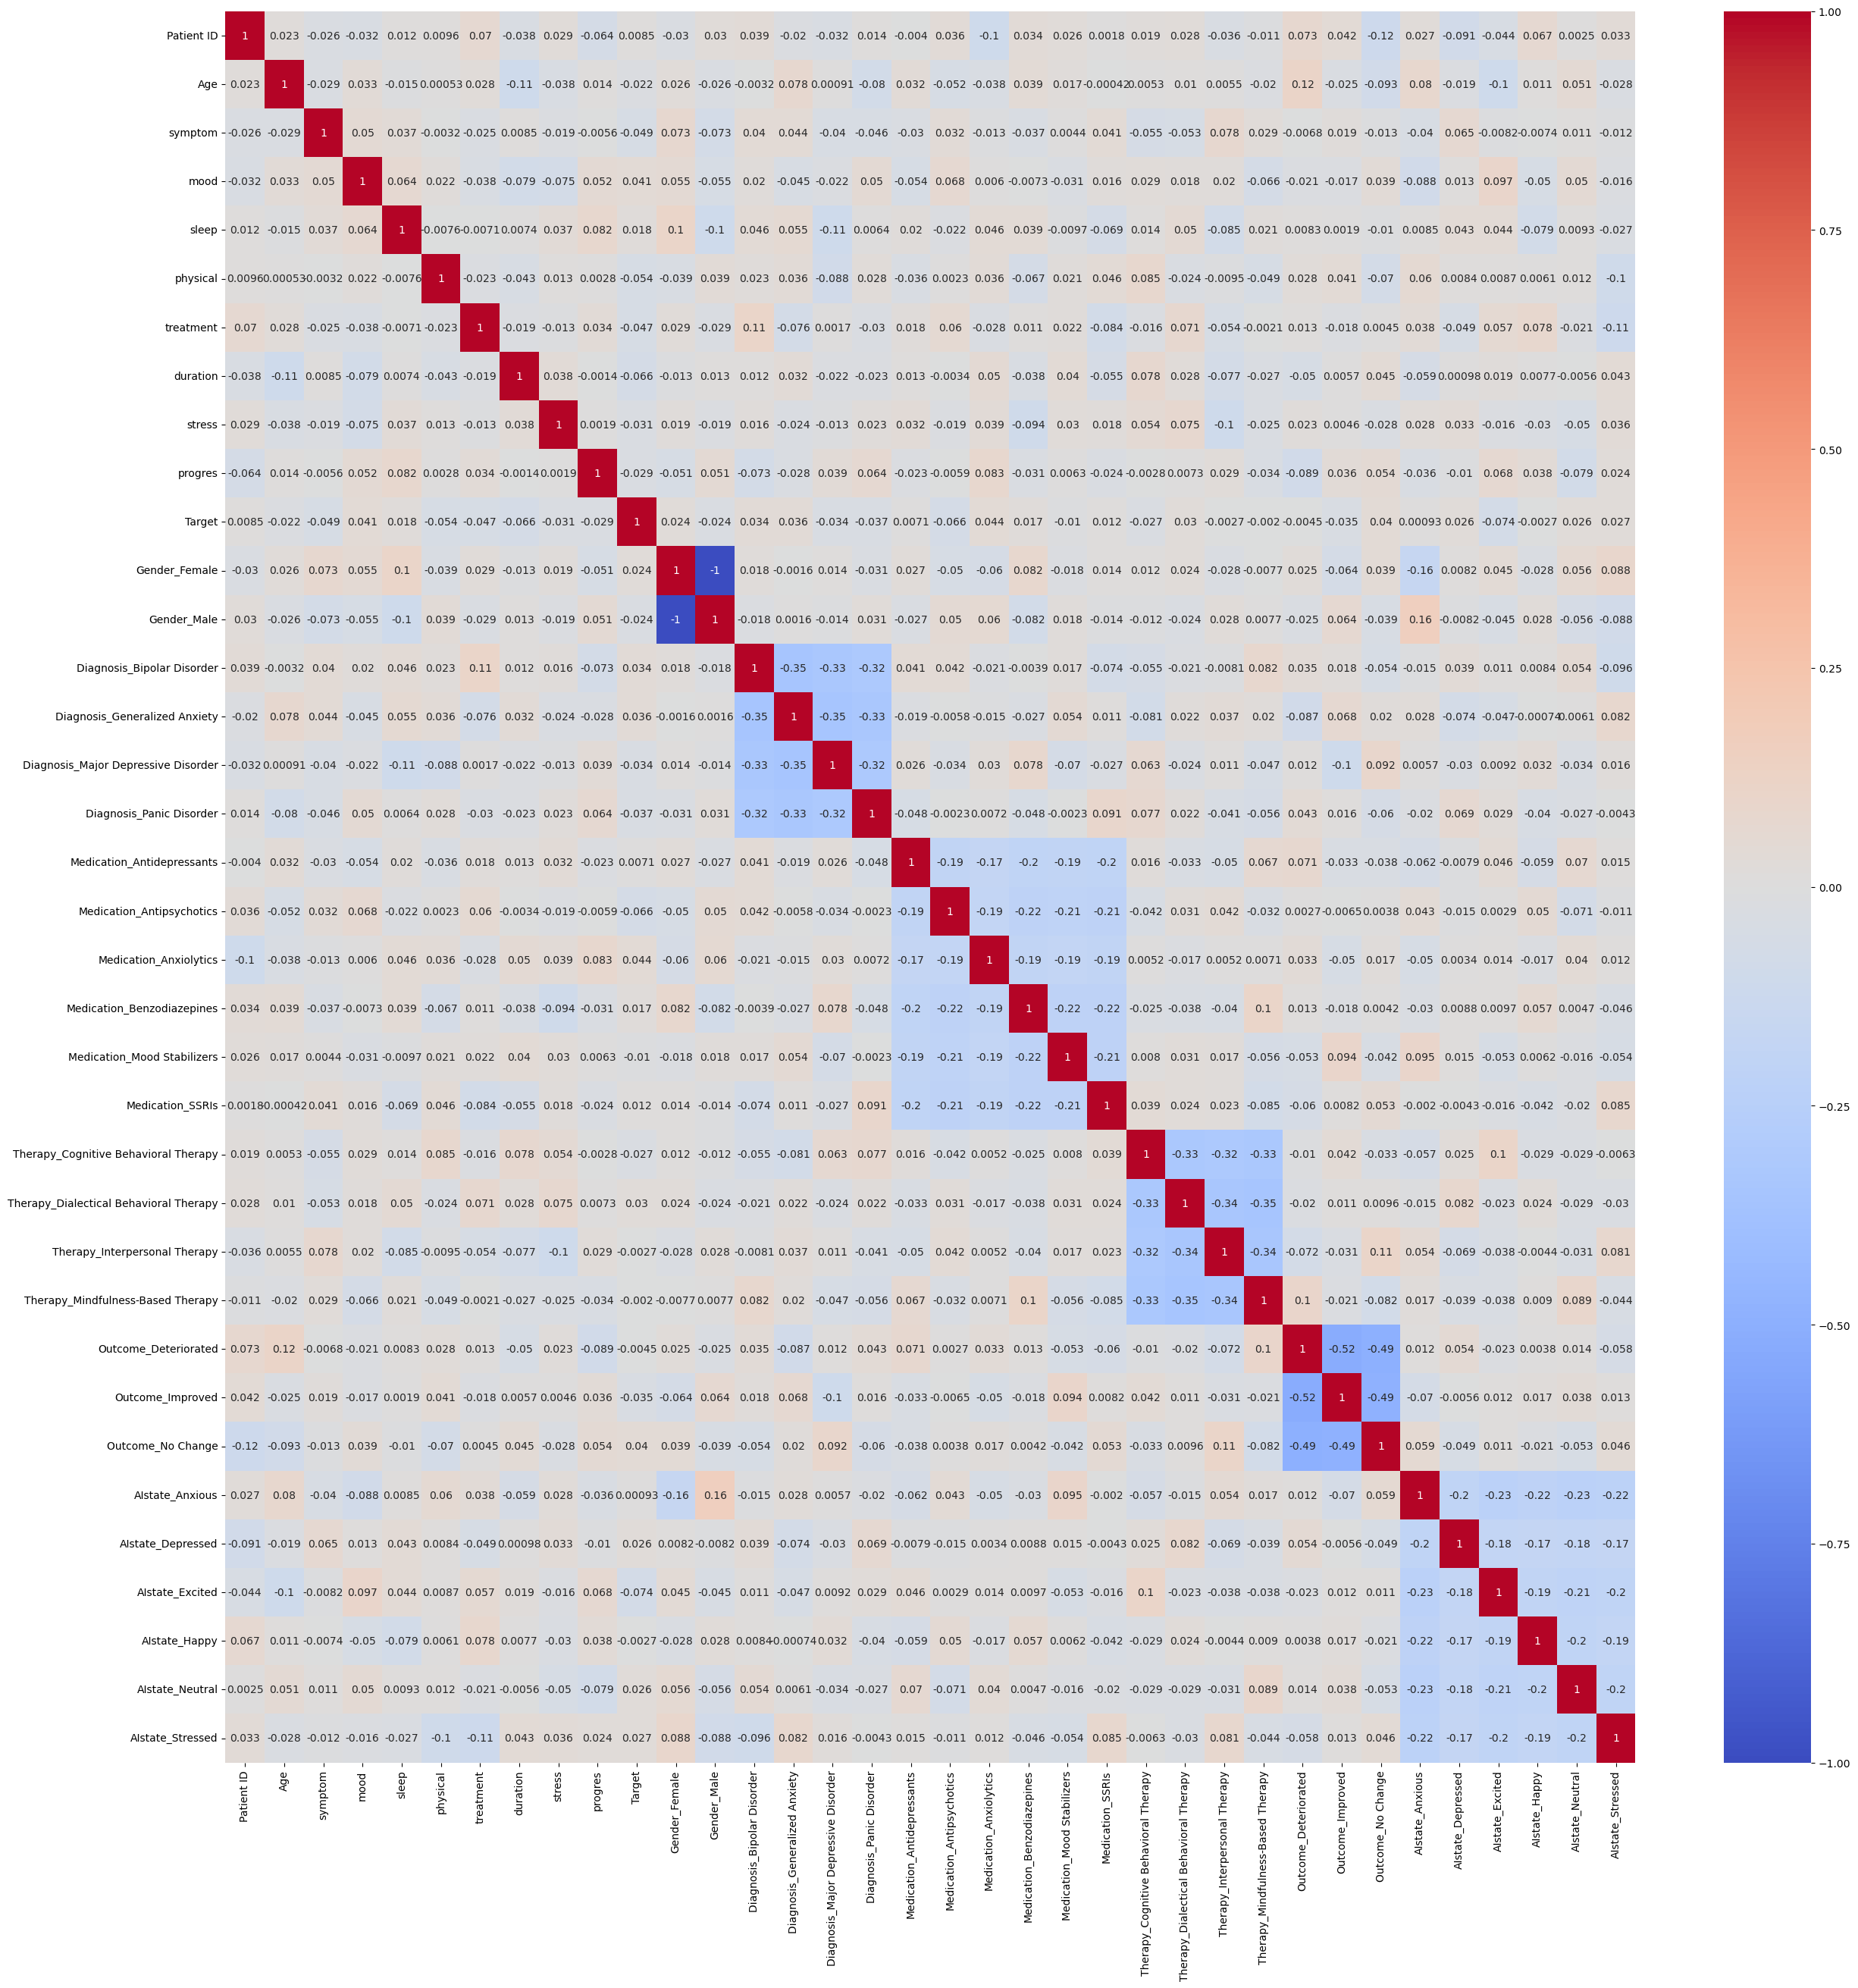

In [302]:
# Membuat gambar plot dengan ukuran (figsize) 30x10
plt.figure(figsize=(30,30))

# Membuat heatmap menggunakan seaborn untuk memvisualisasikan matriks korelasi
# Parameter 'cmap' mengatur skema warna heatmap menjadi 'Reds'
# Parameter 'annot=True' mengaktifkan penulisan nilai korelasi di dalam sel
# Parameter 'annot_kws={'fontsize':12}' mengatur ukuran font untuk nilai korelasi menjadi 12
sns.heatmap(ohcorr, cmap='coolwarm', annot=True)

# Menampilkan gambar plot
plt.show()


Dari matriks korelasi data kategorik yang telah ditransformasi melalui one hot encoding, terdapat peningkatan korelasi antar variabel akan tetapi dari matriks juga terlihat bahwa tiap kategori dalam 1 variabel memiliki korelasi yang cukup kuat sehingga dapat menimbulkan kecenderungan adanya autokorelasi.

## 6.3. Transformasi Min Max (variabel numerik)

In [305]:
df_le

Patient ID  Age  symptom  mood  sleep  physical treatment   duration  \
0          1     43     10       5     8        5    2024-01-25     11      
1          2     40      9       5     4        7    2024-02-27     11      
2          3     55      6       3     4        3    2024-03-20     14      
3          4     34      6       3     6        5    2024-03-29      8      
4          5     52      7       6     6        8    2024-03-18     12      
5          6     28      8       7     6        4    2024-01-11     13      
6          7     59      6       6     5        3    2024-02-21     13      
7          8     32      5       3     5        2    2024-02-03     12      
8          9     21      6       7     7       10    2024-01-16     15      
9         10     21      9       5     9        7    2024-01-03     11      
10        11     42      6       6     7        2    2024-02-01     11      
11        12     54      8       8     5        5    2024-02-19     10      
12        13     46      7       4     9        4    2024-01-16      8      
13        14     19      6       7     9       10    2024-01-24      9      
14        15     23      9       8     6        1    2024-04-01     10      
15        16     38     10       3     8        2    2024-03-23     15      
16        17     30     10       8     5        5    2024-01-19      9      
17        18     28      8       4     7        6    2024-02-09      9      
18        19     52      7       3     4        9    2024-03-23     12      
19        20     37      5       5     4        5    2024-03-31     15      
20        21     19      8       4     5        7    2024-01-01     14      
21        22     41      5       7     9        7    2024-01-30      9      
22        23     50      7       4     5        1    2024-01-02     16      
23        24     53      9       5     9       10    2024-01-25     16      
24        25     60      9       6     5        8    2024-01-24     13      
25        26     19      9       7     9        6    2024-02-07     15      
26        27     23      7       5     7        6    2024-03-25     15      
27        28     56     10       5     8        1    2024-04-09     10      
28        29     58      8       6     7        6    2024-02-08      8      
29        30     41      7       6     6        9    2024-01-12     14      
30        31     44      6       3     5        3    2024-02-17     15      
31        32     47      7       6     7        5    2024-03-14      9      
32        33     39     10       6     4        3    2024-01-22     14      
33        34     27      7       7     4        9    2024-02-10     15      
34        35     53      6       5     6       10    2024-02-04     10      
35        36     53     10       6     5        7    2024-01-08     11      
36        37     45      5       5     6        6    2024-01-18     14      
37        38     33      5       6     6        2    2024-02-28     10      
38        39     31      6       8     4       10    2024-01-02     12      
39        40     41      8       7     7        2    2024-01-08     14      
40        41     46      9       8     8        1    2024-02-25     13      
41        42     56      5       7     6        4    2024-04-05     11      
42        43     31      6       5     9       10    2024-03-27     13      
43        44     50      8       8     7        2    2024-02-17     14      
44        45     40     10       8     7        8    2024-03-18     12      
45        46     43      9       6     5       10    2024-03-29      9      
46        47     48     10       5     5        9    2024-01-30     16      
47        48     26      6       3     5        6    2024-02-01     16      
48        49     41      7       6     9       10    2024-01-28     11      
49        50     46     10       5     4        2    2024-03-08     13      
50        51     40      6       5     7        2    2024-01-01     14      
5

In [306]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Contoh DataFrame (Pastikan df_le sudah ada dalam kode Anda)
# df_le = pd.read_csv('data.csv')  # Jika membaca dari file

# Copy DataFrame
mm = df.copy()

# Hanya memilih kolom numerik
mm = mm.select_dtypes(include=['number'])

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Transformasi data
df_mm = pd.DataFrame(scaler.fit_transform(mm), columns=mm.columns)

# Menampilkan hasil
print(df_mm.head())  # Tampilkan 5 baris pertama
df_mm.head()


   Patient ID     Age    symptom  mood  sleep  physical  duration  stress  \
0   0.000000   0.595238    1.0     0.4   0.8   0.444444    0.375     0.8    
1   0.002004   0.523810    0.8     0.4   0.0   0.666667    0.375     0.4    
2   0.004008   0.880952    0.2     0.0   0.0   0.222222    0.750     0.4    
3   0.006012   0.380952    0.2     0.0   0.4   0.444444    0.000     0.6    
4   0.008016   0.809524    0.4     0.6   0.4   0.777778    0.500     0.0    

   progres   Target   
0    0.4    0.200000  
1    0.4    0.600000  
2    0.0    0.066667  
3    1.0    0.400000  
4    0.2    0.100000  


Patient ID     Age    symptom  mood  sleep  physical  duration  stress  \
0   0.000000   0.595238    1.0     0.4   0.8   0.444444    0.375     0.8    
1   0.002004   0.523810    0.8     0.4   0.0   0.666667    0.375     0.4    
2   0.004008   0.880952    0.2     0.0   0.0   0.222222    0.750     0.4    
3   0.006012   0.380952    0.2     0.0   0.4   0.444444    0.000     0.6    
4   0.008016   0.809524    0.4     0.6   0.4   0.777778    0.500     0.0    

   progres   Target   
0    0.4    0.200000  
1    0.4    0.600000  
2    0.0    0.066667  
3    1.0    0.400000  
4    0.2    0.100000

In [307]:
# melihat matrik korelasi
mmcorr = df_mm.corr()
mmcorr


Patient ID     Age     symptom    mood      sleep   physical  \
Patient ID   1.000000   0.023352 -0.025521 -0.032326  0.011557  0.009613   
Age          0.023352   1.000000 -0.029307  0.033086 -0.015412  0.000531   
symptom     -0.025521  -0.029307  1.000000  0.050077  0.037451 -0.003165   
mood        -0.032326   0.033086  0.050077  1.000000  0.064199  0.021962   
sleep        0.011557  -0.015412  0.037451  0.064199  1.000000 -0.007632   
physical     0.009613   0.000531 -0.003165  0.021962 -0.007632  1.000000   
duration    -0.037996  -0.107012  0.008522 -0.078622  0.007402 -0.043202   
stress       0.029450  -0.038351 -0.018921 -0.075265  0.036606  0.013451   
progres     -0.064460   0.014498 -0.005586  0.052336  0.082247  0.002838   
Target       0.008495  -0.022374 -0.049310  0.041277  0.018225 -0.053863   

            duration   stress    progres   Target   
Patient ID -0.037996  0.029450 -0.064460  0.008495  
Age        -0.107012 -0.038351  0.014498 -0.022374  
symptom     0.008522 -0.018921 -0.005586 -0.049310  
mood       -0.078622 -0.075265  0.052336  0.041277  
sleep       0.007402  0.036606  0.082247  0.018225  
physical   -0.043202  0.013451  0.002838 -0.053863  
duration    1.000000  0.037554 -0.001418 -0.065593  
stress      0.037554  1.000000  0.001933 -0.030839  
progres    -0.001418  0.001933  1.000000 -0.028505  
Target     -0.065593 -0.030839 -0.028505  1.000000

<Figure size 3000x3000 with 0 Axes>

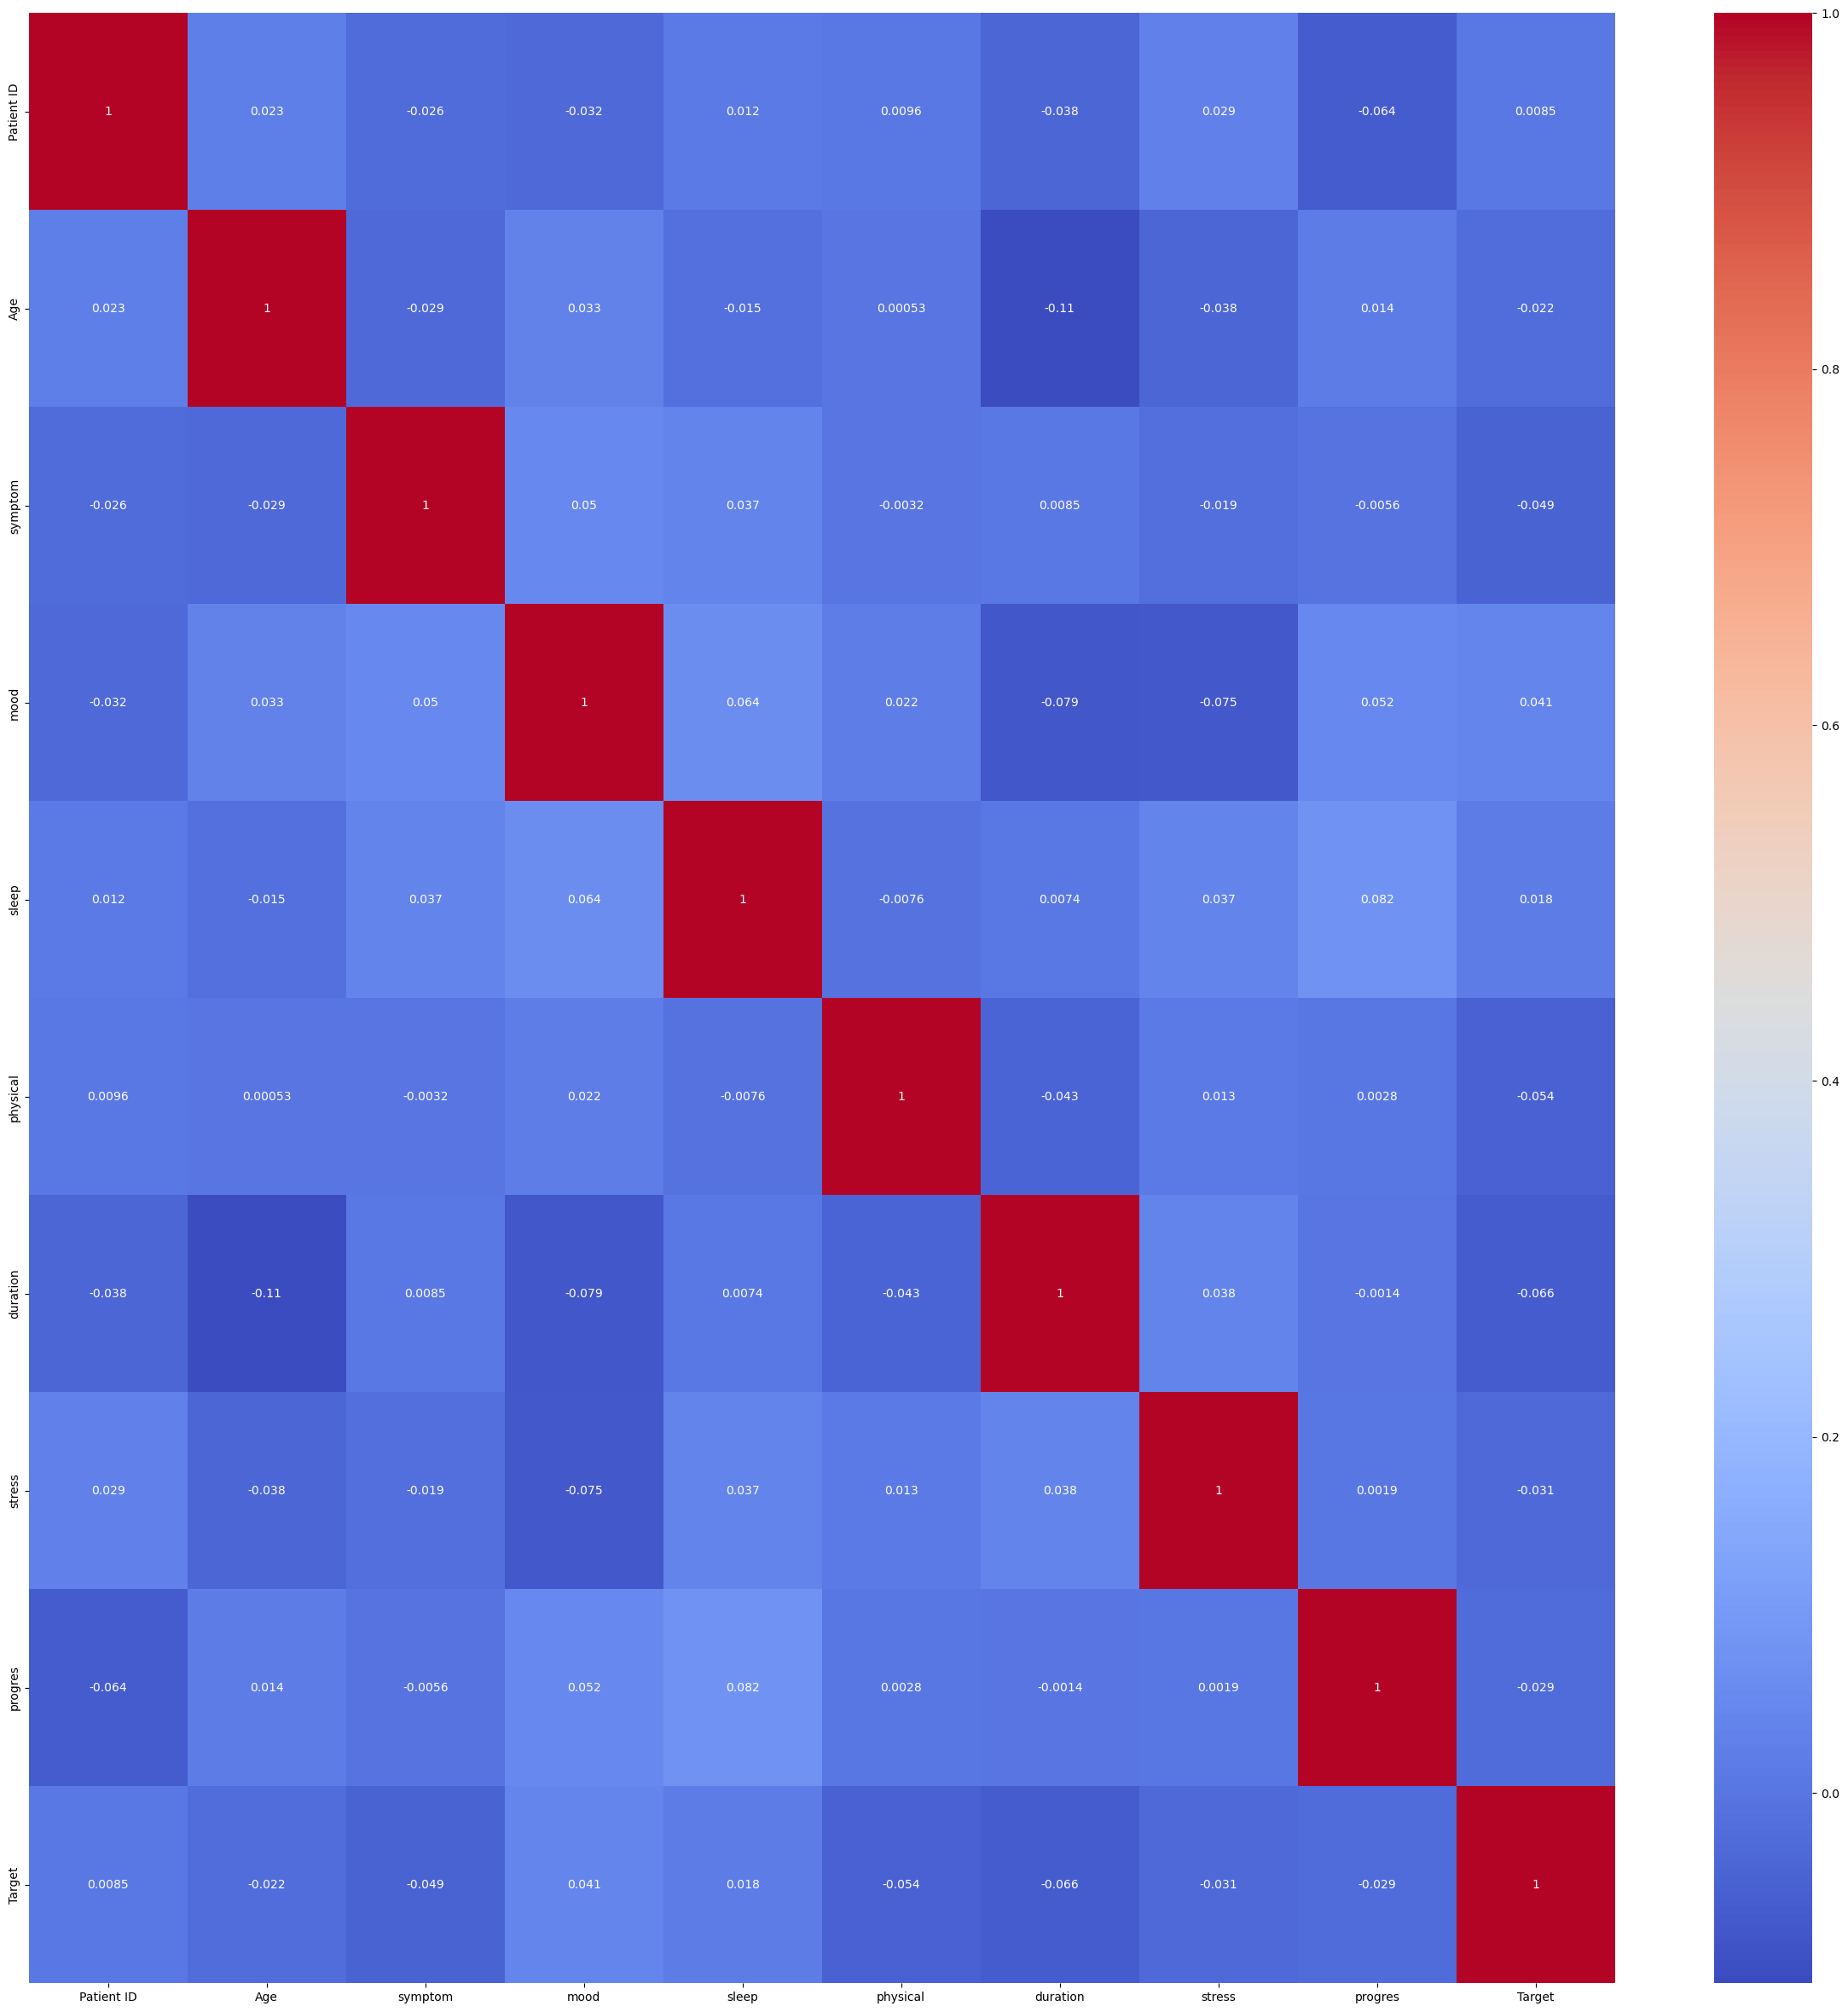

In [219]:
plt.figure(figsize=(30,30))

# Membuat heatmap menggunakan seaborn untuk memvisualisasikan matriks korelasi
# Parameter 'cmap' mengatur skema warna heatmap menjadi 'Reds'
# Parameter 'annot=True' mengaktifkan penulisan nilai korelasi di dalam sel
# Parameter 'annot_kws={'fontsize':12}' mengatur ukuran font untuk nilai korelasi menjadi 12
sns.heatmap(mmcorr, cmap='coolwarm', annot=True)

# Menampilkan gambar plot
plt.show()


## 6.4. Transformasi Min Max (Label Encoder)

In [221]:
df_le

Age  symptom  mood  sleep  physical  duration  stress  progres  Target  \
0    43     10       5     8        5        11        9       7       66     
1    40      9       5     4        7        11        7       7       78     
2    55      6       3     4        3        14        7       5       62     
3    34      6       3     6        5         8        8      10       72     
4    52      7       6     6        8        12        5       6       63     
5    28      8       7     6        4        13        9       7       82     
6    59      6       6     5        3        13        8       5       79     
7    32      5       3     5        2        12        5       6       74     
8    21      6       7     7       10        15        5       6       67     
9    21      9       5     9        7        11        8       8       89     
10   42      6       6     7        2        11        5       8       72     
11   54      8       8     5        5        10        8      10       82     
12   46      7       4     9        4         8        9       7       74     
13   19      6       7     9       10         9       10      10       75     
14   23      9       8     6        1        10        7       6       72     
15   38     10       3     8        2        15        5       7       69     
16   30     10       8     5        5         9        9       6       86     
17   28      8       4     7        6         9        8       6       78     
18   52      7       3     4        9        12        6       5       84     
19   37      5       5     4        5        15        9       6       67     
20   19      8       4     5        7        14        5       5       67     
21   41      5       7     9        7         9        9       5       65     
22   50      7       4     5        1        16       10      10       89     
23   53      9       5     9       10        16        8       9       66     
24   60      9       6     5        8        13        9       7       74     
25   19      9       7     9        6        15        8       6       73     
26   23      7       5     7        6        15        5      10       77     
27   56     10       5     8        1        10        7       8       83     
28   58      8       6     7        6         8        6       6       89     
29   41      7       6     6        9        14        8       9       83     
30   44      6       3     5        3        15        7       6       74     
31   47      7       6     7        5         9        9       8       87     
32   39     10       6     4        3        14        6       6       63     
33   27      7       7     4        9        15        8       6       71     
34   53      6       5     6       10        10        6       9       84     
35   53     10       6     5        7        11        9       7       68     
36   45      5       5     6        6        14        9       6       88     
37   33      5       6     6        2        10        8       5       86     
38   31      6       8     4       10        12        6       9       90     
39   41      8       7     7        2        14        7       8       87     
40   46      9       8     8        1        13        7       8       65     
41   56      5       7     6        4        11        9      10       60     
42   31      6       5     9       10        13        7      10       73     
43   50      8       8     7        2        14        9       6       61     
44   40     10       8     7        8        12        5      10       72     
45   43      9       6     5       10         9       10       9       83     
46   48     10       5     5        9        16        9       6       61     
47   26      6       3     5        6        16        9       6       90     
48   41      7       6     9       10        11       10      10       79     
49   46     10       5     4        2        13        

In [223]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Contoh DataFrame (Pastikan df_le sudah ada dalam kode Anda)
# df_le = pd.read_csv('data.csv')  # Jika membaca dari file

# Copy DataFrame
mm_le = df_le.copy()

# Hanya memilih kolom numerik
mm_le = mm_le.select_dtypes(include=['number'])

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Transformasi data
df_ml = pd.DataFrame(scaler.fit_transform(mm_le), columns=mm_le.columns)

# Menampilkan hasil
print(df_ml.head())  # Tampilkan 5 baris pertama
df_ml.head()


      Age    symptom  mood  sleep  physical  duration  stress  progres  \
0  0.595238    1.0     0.4   0.8   0.444444    0.375     0.8     0.4     
1  0.523810    0.8     0.4   0.0   0.666667    0.375     0.4     0.4     
2  0.880952    0.2     0.0   0.0   0.222222    0.750     0.4     0.0     
3  0.380952    0.2     0.0   0.4   0.444444    0.000     0.6     1.0     
4  0.809524    0.4     0.6   0.4   0.777778    0.500     0.0     0.2     

    Target   En_Gender  En_Diagnosis  En_Medication  En_Therapy  En_Outcome  \
0  0.200000     0.0       0.666667         0.8        0.666667       0.0      
1  0.600000     0.0       0.666667         0.2        0.666667       1.0      
2  0.066667     0.0       0.666667         1.0        1.000000       0.0      
3  0.400000     0.0       0.666667         1.0        1.000000       0.0      
4  0.100000     1.0       1.000000         0.4        0.666667       0.0      

   En_AIstate  
0      0.0     
1      0.8     
2      0.6     
3      0.4     


Age    symptom  mood  sleep  physical  duration  stress  progres  \
0  0.595238    1.0     0.4   0.8   0.444444    0.375     0.8     0.4     
1  0.523810    0.8     0.4   0.0   0.666667    0.375     0.4     0.4     
2  0.880952    0.2     0.0   0.0   0.222222    0.750     0.4     0.0     
3  0.380952    0.2     0.0   0.4   0.444444    0.000     0.6     1.0     
4  0.809524    0.4     0.6   0.4   0.777778    0.500     0.0     0.2     

    Target   En_Gender  En_Diagnosis  En_Medication  En_Therapy  En_Outcome  \
0  0.200000     0.0       0.666667         0.8        0.666667       0.0      
1  0.600000     0.0       0.666667         0.2        0.666667       1.0      
2  0.066667     0.0       0.666667         1.0        1.000000       0.0      
3  0.400000     0.0       0.666667         1.0        1.000000       0.0      
4  0.100000     1.0       1.000000         0.4        0.666667       0.0      

   En_AIstate  
0      0.0     
1      0.8     
2      0.6     
3      0.4     
4      0.4

In [224]:
# melihat matrik korelasi
mlcorr = df_ml.corr()
mlcorr


Age     symptom    mood      sleep   physical  duration  \
Age            1.000000 -0.029307  0.033086 -0.015412  0.000531 -0.107012   
symptom       -0.029307  1.000000  0.050077  0.037451 -0.003165  0.008522   
mood           0.033086  0.050077  1.000000  0.064199  0.021962 -0.078622   
sleep         -0.015412  0.037451  0.064199  1.000000 -0.007632  0.007402   
physical       0.000531 -0.003165  0.021962 -0.007632  1.000000 -0.043202   
duration      -0.107012  0.008522 -0.078622  0.007402 -0.043202  1.000000   
stress        -0.038351 -0.018921 -0.075265  0.036606  0.013451  0.037554   
progres        0.014498 -0.005586  0.052336  0.082247  0.002838 -0.001418   
Target        -0.022374 -0.049310  0.041277  0.018225 -0.053863 -0.065593   
En_Gender     -0.026300 -0.073244 -0.054543 -0.104750  0.039059  0.012723   
En_Diagnosis  -0.059438 -0.066564  0.022068 -0.055642 -0.022092 -0.031056   
En_Medication  0.014496  0.027075  0.002921 -0.045535  0.039729 -0.032703   
En_Therapy    -0.016006  0.074246 -0.055553 -0.021608 -0.074231 -0.080661   
En_Outcome    -0.120919 -0.003271  0.034341 -0.010842 -0.056993  0.054865   
En_AIstate    -0.026362  0.001179  0.038919 -0.041945 -0.086281  0.053728   

                stress    progres   Target   En_Gender  En_Diagnosis  \
Age           -0.038351  0.014498 -0.022374 -0.026300    -0.059438     
symptom       -0.018921 -0.005586 -0.049310 -0.073244    -0.066564     
mood          -0.075265  0.052336  0.041277 -0.054543     0.022068     
sleep          0.036606  0.082247  0.018225 -0.104750    -0.055642     
physical       0.013451  0.002838 -0.053863  0.039059    -0.022092     
duration       0.037554 -0.001418 -0.065593  0.012723    -0.031056     
stress         1.000000  0.001933 -0.030839 -0.019181     0.006087     
progres        0.001933  1.000000 -0.028505  0.051224     0.093322     
Target        -0.030839 -0.028505  1.000000 -0.024180    -0.054861     
En_Gender     -0.019181  0.051224 -0.024180  1.000000     0.025679     
En_Diagnosis   0.006087  0.093322 -0.054861  0.025679     1.000000     
En_Medication -0.004979 -0.009043  0.018883 -0.019575     0.067000     
En_Therapy    -0.080786 -0.013996  0.007485  0.021466    -0.123363     
En_Outcome    -0.029560  0.083222  0.025353 -0.007976    -0.007634     
En_AIstate    -0.024896  0.007203  0.021847 -0.144594    -0.004856     

               En_Medication  En_Therapy  En_Outcome  En_AIstate  
Age              0.014496     -0.016006   -0.120919   -0.026362   
symptom          0.027075      0.074246   -0.003271    0.001179   
mood             0.002921     -0.055553    0.034341    0.038919   
sleep           -0.045535     -0.021608   -0.010842   -0.041945   
physical         0.039729     -0.074231   -0.056993   -0.086281   
duration        -0.032703     -0.080661    0.054865    0.053728   
stress          -0.004979     -0.080786   -0.029560   -0.024896   
progres         -0.009043     -0.013996    0.083222    0.007203   
Target           0.018883      0.007485    0.025353    0.021847   
En_Gender       -0.019575      0.021466   -0.007976   -0.144594   
En_Diagnosis     0.067000     -0.123363   -0.007634   -0.004856   
En_Medication    1.000000     -0.063080    0.072090   -0.028289   
En_Therapy      -0.063080      1.000000   -0.038959    0.020269   
En_Outcome       0.072090     -0.038959    1.000000    0.017207   
En_AIstate      -0.028289      0.020269    0.017207    1.000000

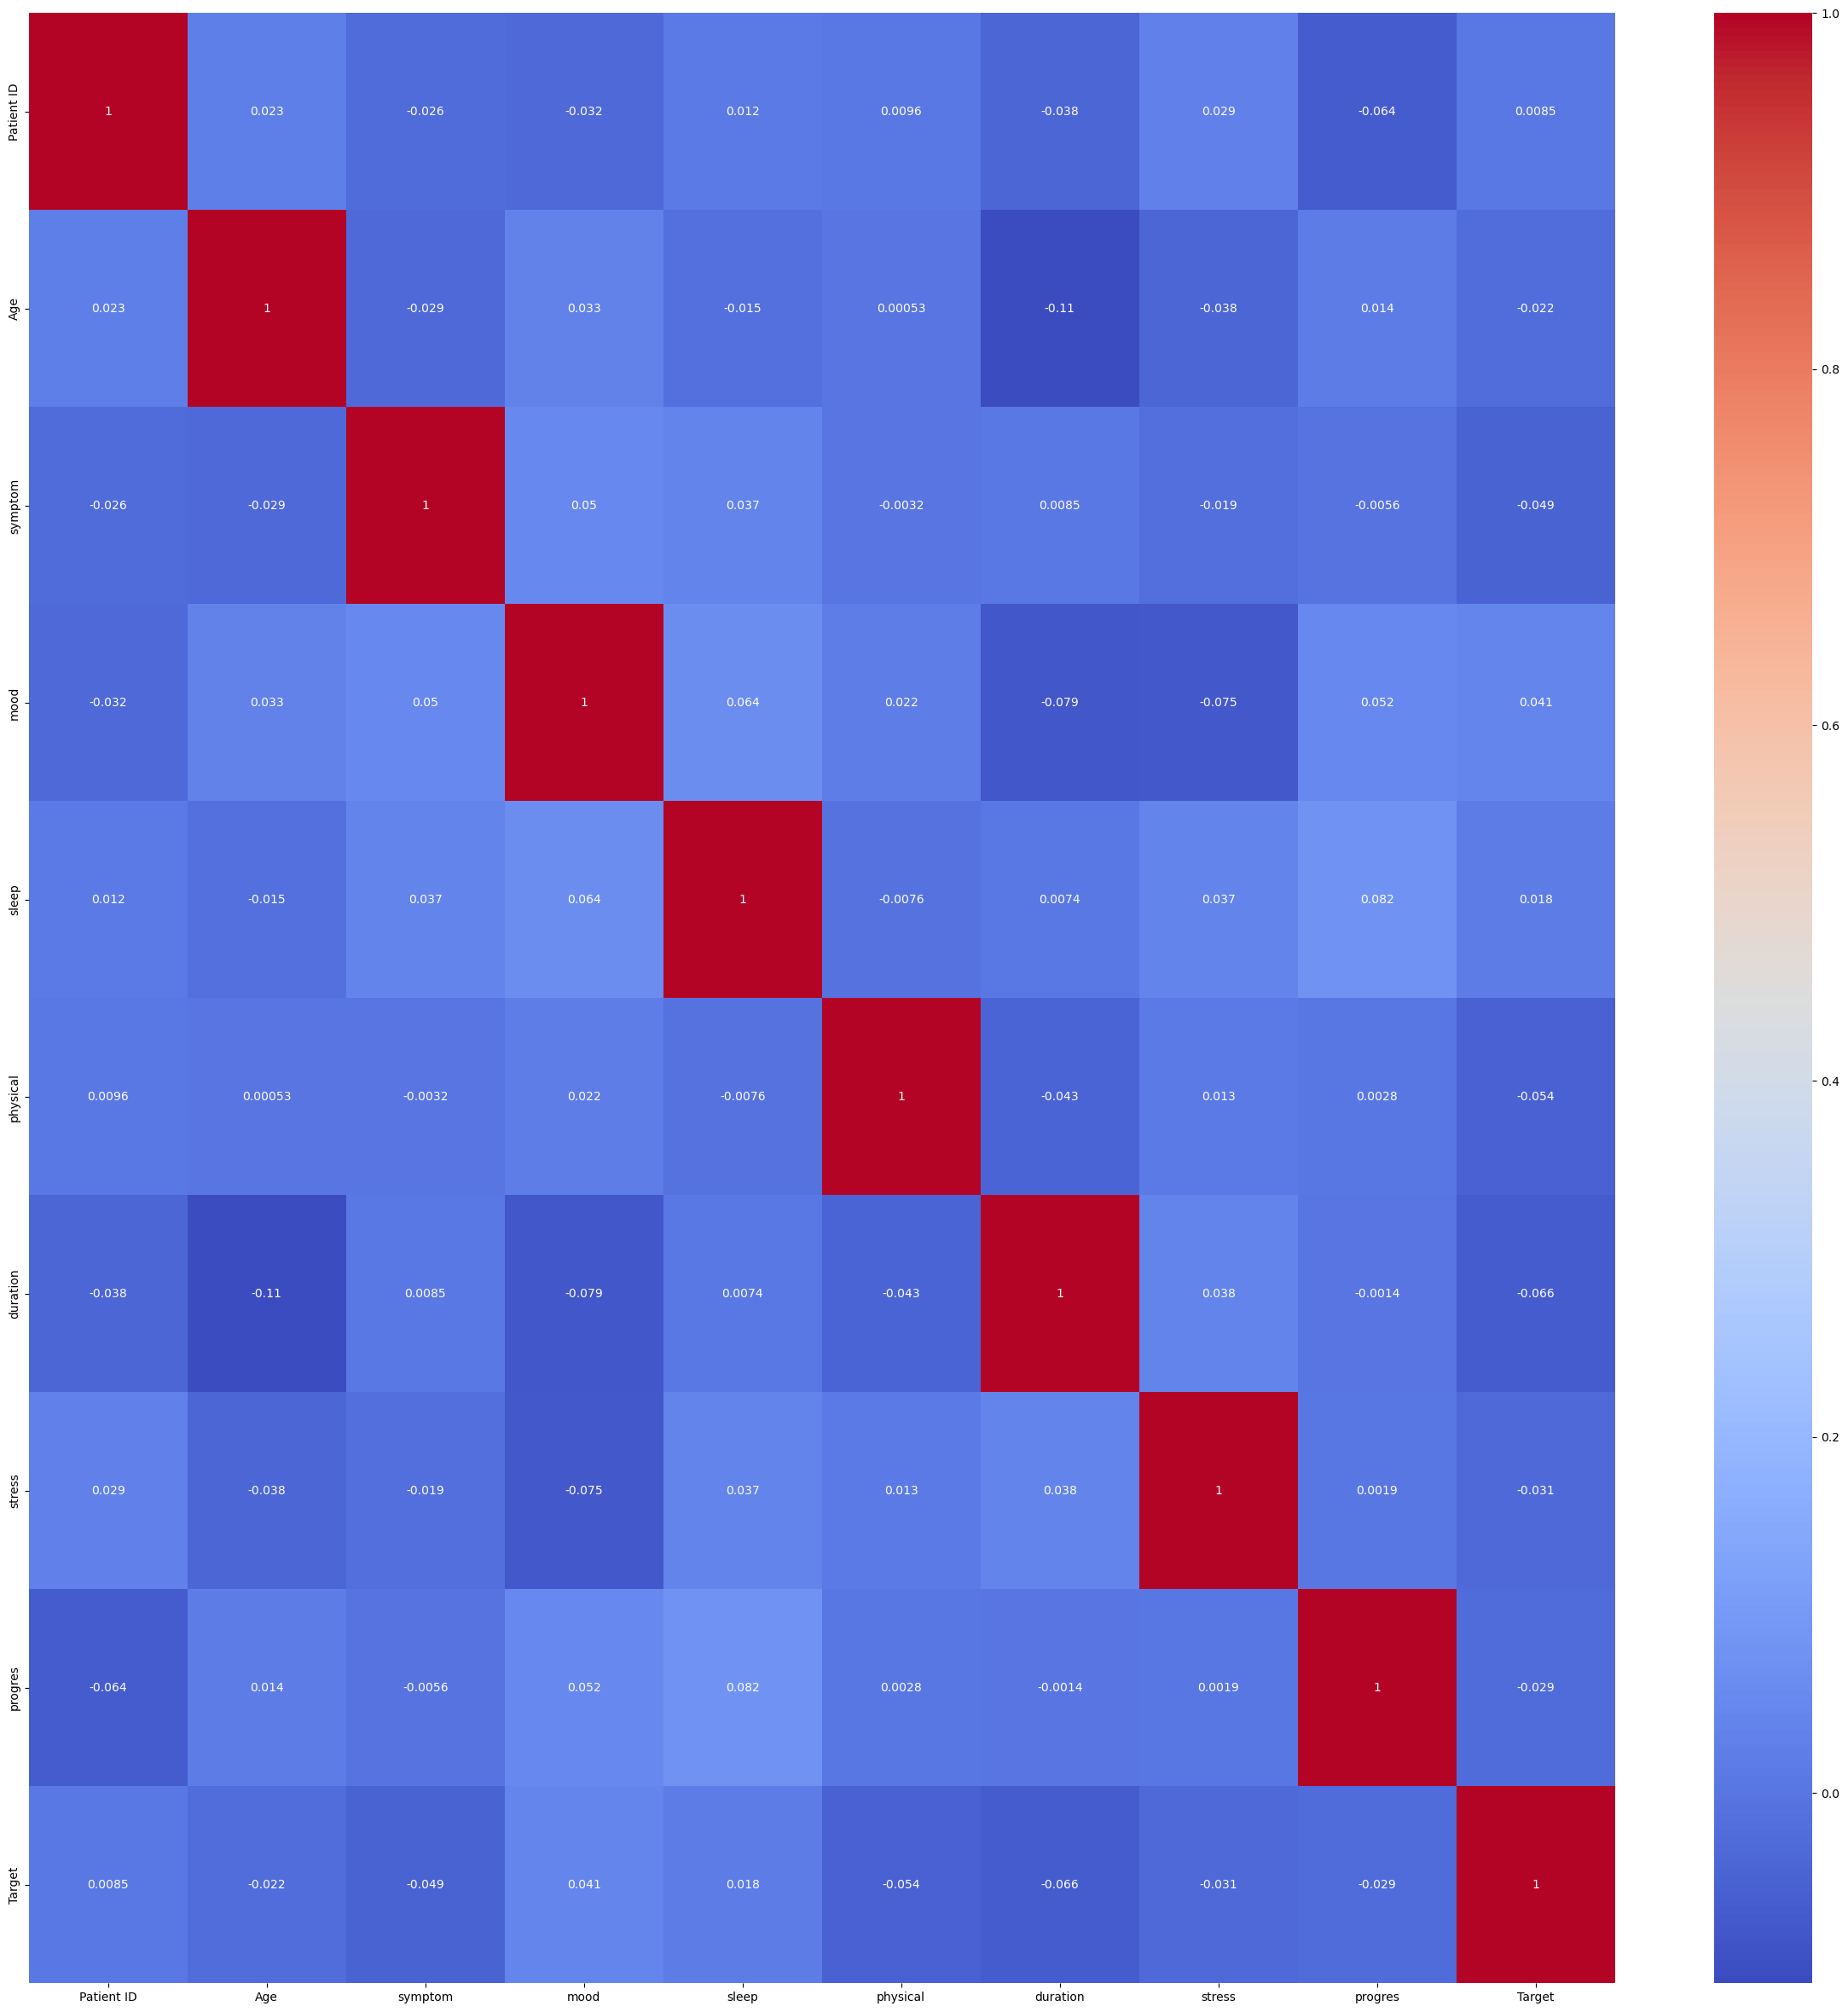

In [228]:
plt.figure(figsize=(30,30))

# Membuat heatmap menggunakan seaborn untuk memvisualisasikan matriks korelasi
# Parameter 'cmap' mengatur skema warna heatmap menjadi 'Reds'
# Parameter 'annot=True' mengaktifkan penulisan nilai korelasi di dalam sel
# Parameter 'annot_kws={'fontsize':12}' mengatur ukuran font untuk nilai korelasi menjadi 12
sns.heatmap(mmcorr, cmap='coolwarm', annot=True)

# Menampilkan gambar plot
plt.show()


Hasil korelasi untuk Transformasi minmax tidak berbeda jauh dengan korelasi label encoder sehingga tidak ada perbedaan yang cukup signifikan antara transformasi minmax label encoder dengan label encoder saja.

## 7. Model Inference

Untuk melakukan pelatihan model maka dilakukan pemanggilan model terlebih dahulu, model yang dipilih dibatasi yaitu 6 model yang umumnya punya R2 score terbesar :
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regressor
- Gradient Boosting Regressor
- Extreme Gradient Boosting Regressor


In [332]:
#Memanggil library dan model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
rr = Ridge()
ls = Lasso()
dr = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
xg = XGBRegressor()

## 8. Pelatihan Model

In [336]:
def latih_model(X, y):
    # Inisialisasi model
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Decision Tree Regression': DecisionTreeRegressor(),
        'Gradient Boosting Regressor': GradientBoostingRegressor(),
        'Extreme Gradient Boosting Regressor': XGBRegressor()
    }
    
    tests = [0.2, 0.3, 0.4]  # Rasio split data
    
    results = []  # Untuk menyimpan hasil evaluasi
    
    for name, model in models.items():
        print(f"\n=== {name} ===")
        for test in tests:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_train = model.predict(X_train)
            r2_test = r2_score(y_test, y_pred)
            mse_test = mean_squared_error(y_test, y_pred)
            r2_train = r2_score(y_train, y_pred_train)
            mse_train = mean_squared_error(y_train, y_pred_train)
            results.append([name, test, r2_train, mse_train, r2_test, mse_test])
    
    # Membuat dataframe hasil
    df_results = pd.DataFrame(results, columns=['Model', 'Test Ratio', 'R² Train', 'MSE Train', 'R² Test', 'MSE Test'])
    print("\nHasil Evaluasi Model:")
    print(df_results)
    return df_results  # Mengembalikan hasil dalam bentuk DataFrame

In [346]:
df_ml

Age    symptom  mood  sleep  physical  duration  stress  progres  \
0    0.595238    1.0     0.4   0.8   0.444444    0.375     0.8     0.4     
1    0.523810    0.8     0.4   0.0   0.666667    0.375     0.4     0.4     
2    0.880952    0.2     0.0   0.0   0.222222    0.750     0.4     0.0     
3    0.380952    0.2     0.0   0.4   0.444444    0.000     0.6     1.0     
4    0.809524    0.4     0.6   0.4   0.777778    0.500     0.0     0.2     
5    0.238095    0.6     0.8   0.4   0.333333    0.625     0.8     0.4     
6    0.976190    0.2     0.6   0.2   0.222222    0.625     0.6     0.0     
7    0.333333    0.0     0.0   0.2   0.111111    0.500     0.0     0.2     
8    0.071429    0.2     0.8   0.6   1.000000    0.875     0.0     0.2     
9    0.071429    0.8     0.4   1.0   0.666667    0.375     0.6     0.6     
10   0.571429    0.2     0.6   0.6   0.111111    0.375     0.0     0.6     
11   0.857143    0.6     1.0   0.2   0.444444    0.250     0.6     1.0     
12   0.666667    0.4     0.2   1.0   0.333333    0.000     0.8     0.4     
13   0.023810    0.2     0.8   1.0   1.000000    0.125     1.0     1.0     
14   0.119048    0.8     1.0   0.4   0.000000    0.250     0.4     0.2     
15   0.476190    1.0     0.0   0.8   0.111111    0.875     0.0     0.4     
16   0.285714    1.0     1.0   0.2   0.444444    0.125     0.8     0.2     
17   0.238095    0.6     0.2   0.6   0.555556    0.125     0.6     0.2     
18   0.809524    0.4     0.0   0.0   0.888889    0.500     0.2     0.0     
19   0.452381    0.0     0.4   0.0   0.444444    0.875     0.8     0.2     
20   0.023810    0.6     0.2   0.2   0.666667    0.750     0.0     0.0     
21   0.547619    0.0     0.8   1.0   0.666667    0.125     0.8     0.0     
22   0.761905    0.4     0.2   0.2   0.000000    1.000     1.0     1.0     
23   0.833333    0.8     0.4   1.0   1.000000    1.000     0.6     0.8     
24   1.000000    0.8     0.6   0.2   0.777778    0.625     0.8     0.4     
25   0.023810    0.8     0.8   1.0   0.555556    0.875     0.6     0.2     
26   0.119048    0.4     0.4   0.6   0.555556    0.875     0.0     1.0     
27   0.904762    1.0     0.4   0.8   0.000000    0.250     0.4     0.6     
28   0.952381    0.6     0.6   0.6   0.555556    0.000     0.2     0.2     
29   0.547619    0.4     0.6   0.4   0.888889    0.750     0.6     0.8     
30   0.619048    0.2     0.0   0.2   0.222222    0.875     0.4     0.2     
31   0.690476    0.4     0.6   0.6   0.444444    0.125     0.8     0.6     
32   0.500000    1.0     0.6   0.0   0.222222    0.750     0.2     0.2     
33   0.214286    0.4     0.8   0.0   0.888889    0.875     0.6     0.2     
34   0.833333    0.2     0.4   0.4   1.000000    0.250     0.2     0.8     
35   0.833333    1.0     0.6   0.2   0.666667    0.375     0.8     0.4     
36   0.642857    0.0     0.4   0.4   0.555556    0.750     0.8     0.2     
37   0.357143    0.0     0.6   0.4   0.111111    0.250     0.6     0.0     
38   0.309524    0.2     1.0   0.0   1.000000    0.500     0.2     0.8     
39   0.547619    0.6     0.8   0.6   0.111111    0.750     0.4     0.6     
40   0.666667    0.8     1.0   0.8   0.000000    0.625     0.4     0.6     
41   0.904762    0.0     0.8   0.4   0.333333    0.375     0.8     1.0     
42   0.309524    0.2     0.4   1.0   1.000000    0.625     0.4     1.0     
43   0.761905    0.6     1.0   0.6   0.111111    0.750     0.8     0.2     
44   0.523810    1.0     1.0   0.6   0.777778    0.500     0.0     1.0     
45   0.595238    0.8     0.6   0.2   1.000000    0.125     1.0     0.8     
46   0.714286    1.0     0.4   0.2   0.888889    1.000     0.8     0.2     
47   0.190476    0.2     0.0   0.2   0.555556    1.000     0.8     0.2     
48   0.547619    0.4     0.6   1.0   1.000000    0.375     1.0     1.0     
49   0.666667    1.0     0.4   0.0   0.111111    0.625     0.8     0.4     
50   0.523810    0.2     0.4   0.6   0.111111    0.750     0.4     1.0     
51   0.309524    0.6     0.6   1.0   0.444444    0.125  

In [322]:
latih_model(df_ml.drop(['Target'],axis=1),df_ml['Target'])


=== Linear Regression ===

=== Ridge Regression ===

=== Lasso Regression ===

=== Decision Tree Regression ===

=== Gradient Boosting Regressor ===

=== Extreme Gradient Boosting Regressor ===

Hasil Evaluasi Model:
                  Model                  Test Ratio  R² Train  MSE Train  \
0                     Linear Regression      0.2     0.018424  0.089637    
1                     Linear Regression      0.3     0.019509  0.089175    
2                     Linear Regression      0.4     0.022712  0.091443    
3                      Ridge Regression      0.2     0.018413  0.089638    
4                      Ridge Regression      0.3     0.019495  0.089176    
5                      Ridge Regression      0.4     0.022691  0.091445    
6                      Lasso Regression      0.2     0.000000  0.091319    
7                      Lasso Regression      0.3     0.000000  0.090949    
8                      Lasso Regression      0.4     0.000000  0.093568    
9              Decisio

Model                  Test Ratio  R² Train  MSE Train  \
0                     Linear Regression      0.2     0.018424  0.089637    
1                     Linear Regression      0.3     0.019509  0.089175    
2                     Linear Regression      0.4     0.022712  0.091443    
3                      Ridge Regression      0.2     0.018413  0.089638    
4                      Ridge Regression      0.3     0.019495  0.089176    
5                      Ridge Regression      0.4     0.022691  0.091445    
6                      Lasso Regression      0.2     0.000000  0.091319    
7                      Lasso Regression      0.3     0.000000  0.090949    
8                      Lasso Regression      0.4     0.000000  0.093568    
9              Decision Tree Regression      0.2     1.000000  0.000000    
10             Decision Tree Regression      0.3     1.000000  0.000000    
11             Decision Tree Regression      0.4     1.000000  0.000000    
12          Gradient Boosting Regressor      0.2     0.606189  0.035963    
13          Gradient Boosting Regressor      0.3     0.656006  0.031286    
14          Gradient Boosting Regressor      0.4     0.720195  0.026181    
15  Extreme Gradient Boosting Regressor      0.2     0.999983  0.000002    
16  Extreme Gradient Boosting Regressor      0.3     0.999982  0.000002    
17  Extreme Gradient Boosting Regressor      0.4     0.999982  0.000002    

     R² Test  MSE Test  
0   0.003829  0.091985  
1  -0.020126  0.094445  
2  -0.028675  0.090917  
3   0.004037  0.091966  
4  -0.019556  0.094392  
5  -0.027544  0.090817  
6  -0.002772  0.092595  
7  -0.006471  0.093180  
8  -0.003334  0.088677  
9  -0.790985  0.165378  
10 -0.808463  0.167430  
11 -0.973751  0.174444  
12 -0.151220  0.106303  
13 -0.124240  0.104083  
14 -0.228792  0.108603  
15 -0.251205  0.115535  
16 -0.247002  0.115449  
17 -0.381856  0.122131

## 9. Seleksi Model

In [ ]:
# Memanggil library untuk analisis statistik menggunkan stats models
import statsmodels.api as sm
from patsy import dmatrices

Dalam menjalankan seleksi model yang terbaik ada beberapa skenario yang akan di uji pada tahapan ini, antara lain :
- Skenario 1 : Model tanpa reduksi variabel dan dengan melakukan konversi ke Label Encoder untuk variabel kategorik
- Skenario 2 : Model tanpa reduksi variabel dan dengan melakukan konversi ke One Hot Encoder untuk variabel kategorik
- Skenario 3 : Model dengan reduksi variabel dan dengan melakukan konversi ke Label Encoder untuk variabel kategorik
- Skenario 4 : Model dengan reduksi variabel dan dengan melakukan konversi ke One Hot Encoder untuk variabel kategorik

Dari ke 4 Skenario tersebut akan dilihat model mana yang merupakan model terbaik dengan mempertimbangkan penilaian:
1. R2 model
2. MSE
3. RSE

Model yang memiliki nilai R2(R-Square) mendekati 1 atau -1 menandakan bahwa variabel-variabel prediktor semakin kuat dalam menjelaskan/mempengaruhi variabel prediktor, sementara untuk indikator MSE menunjukkan nilai kesalahan/eror pada model, sehingga nilai MSE/RSE yang semakin kecil akan menunjukkan tingkat kesalahan/error yang semakin baik.

## 9.1. Skenario 1 (Model tanpa reduksi variabel dan dengan melakukan konversi ke Label Encoder untuk variabel kategorik)

In [ ]:
latih_model(df_ml.drop(['Patient ID'],axis=1),df_ml['Target'])

## 10. Model Inference

In [ ]:
test1 = {'Age' : [15,25,38],
         'Height' : [165,178,183],
         'Weight' : [76,64,59],
         'FCVC' : [0,1,2],
         'NCP' : [3,1,2],
         'CH2O' : [2,1,1],
         'FAF' : [0,2,3],
         'TUE' : [0,0,1],
         'En_Fam' : [0,1,1],
         'En_FAVC' : [0,1,1],
         'En_CAEC' : [2,1,1],
         'En_SMOKE' : [0,0,1],
         'En_SCC' : [0,1,0],
         'En_CALC' : [0,1,0],
         'En_MTRANS ' : [2,3,4],
         'En_Gender' : [1,0,1]
        }
test1 = pd.DataFrame(test1)
test1

## 11. Referensi dan Seleksi Variabel pada Model 

Berdasarkan penelitian yang dilakukan oleh RezkiaNadiaPutri,et al 2022, Terdapat beberapa Faktor yang berhubungan dengan kejadian obesitas sentral pada remaja usia 15-18 tahun di Provinsi DKI Jakarta, faktor tersebut diantaranya : 
1. Jenis Kelamin 
2. Status Merokok

sumber : https://ejournal.undip.ac.id/index.php/mkmi/article/view/43473/22052

sedangkan menurut Syifa Arifani dan Zulia Setiyaningrum, 2021, adapun faktor Perilaku Berisiko Yang Berhubungan Dengan Kejadian diantaranya : 
1. Perilaku merokok
2. Makanan Manis
3. Minuman Manis
4. Soft Drink
5. Makanan Instan

pada poin ke 2 s.d 4 terdapat hubungan antara variabel yang digunakan pada dataset, yaitu pola konsumsi makanan tinggi kalori. 
sumber : https://www.bing.com/ck/a?!&&p=2193fd3a35a03985b63f4d265b23988b71822176abb5cdf5c9fccb785e40d1c1JmltdHM9MTc0MTgyNDAwMA&ptn=3&ver=2&hsh=4&fclid=161541b8-bd45-6014-2770-5064bc25616b&psq=penyebab+obesitas+jurnal&u=a1aHR0cHM6Ly9qb3VybmFscy51bXMuYWMuaWQvaW5kZXgucGhwL2prL2FydGljbGUvZG93bmxvYWQvMTM3MzgvcGRm&ntb=1


berdasarkan hal tersebut maka perlu dilakukan uji korelasi antara variabel prediktor dengan variabel target melalui uji statistik untuk menentukan apakah variabel tersebut dapat kita gunakan ke dalam model.

In [ ]:
df_clean2.info()

## Uji Korelasi Matrix

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t

# Example correlation matrix
correlation_matrix = korelasi

# Assume a sample size (n)
n = 10  # Replace with your actual sample size
df = n - 2  # Degrees of freedom

# Function to compute p-value matrix from correlation matrix
def calculate_pval_from_corr(corr_matrix, sample_size):
    n = sample_size
    df = n - 2
    t_values = corr_matrix * np.sqrt(df / (1 - corr_matrix**2))  # t-statistic
    p_values = 2 * (1 - t.cdf(abs(t_values), df))  # two-tailed p-values
    np.fill_diagonal(p_values, 0)  # Set diagonal to 0 (self-correlation p-values)
    return p_values

# Compute p-value matrix
pvalue_matrix = calculate_pval_from_corr(correlation_matrix, n)

# Convert to pandas DataFrame for display
pvalue_df = pd.DataFrame(pvalue_matrix, columns=[korelasi.columns], index=[korelasi.columns])
print("P-Value Matrix:")
print(pvalue_df)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# mengambil dataset
dfc = df_clean2.copy()
dfc = dfc.drop(['Age','Height','Weight'],axis=1)

# membuat fungsi Cramers V untuk korelasi data kategorik
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# melakukan looping untuk setiap kolom dataset
columns = dfc.columns
results = {}

for col1 in columns:
    for col2 in columns:
        if col1 != col2:  #menghindari perbandingnan sendiri
            key = f"{col1} vs {col2}"
            results[key] = cramers_v(dfc[col1], dfc[col2])

# hasil
for pair, value in results.items():
    print(f"{pair}: {value:.2f}")



In [ ]:
cramers_v()

## 12. Kesimpulan

In [ ]:
penjelasan

In [ ]:
df_clean2.info()

Dari final proyek yang telah dibuat dapat disimpulkan bahwa : 
dataset yang digunakan berisi 17 kolom dan 1932 baris (setelah dilakukan pembersihan outlier), selanjutnya dilakukan eksplorasi data (bar chart, pie chart, boxplot) dimana dilakukan visualisasi yaitu perbandingan nilai pada kolom obesitas kepada kolom2 lain sebagai variabel.kolom prediktor, diantaranya : 
1. perbandingan Kolom "Age/Usia" dengan "Level Obesitas"
2. perbandingan Kolom "Height/Tinggi badan" dengan "Level Obesitas"
3. perbandingan Kolom "Weight/Berat Badan" dengan "Level Obesitas"
4. perbandingan Kolom "FCVC/Pola Konsumsi Buah-buahan" dengan "Level Obesitas"
5. perbandingan Kolom "NCP/Jumlah makan utama perhari" dengan "Level Obesitas"
6. perbandingan Kolom "CH2O/Pola konsumsi air" dengan "Level Obesitas"
7. perbandingan Kolom "FAF/Frekuensi Aktifitas Fisik" dengan "Level Obesitas"
8. perbandingan Kolom "TUE/Pemakaian Teknologi" dengan "Level Obesitas"
9. perbandingan Kolom "Fam/Riwayat Obesitas Keluarga" dengan "Level Obesitas"
10. perbandingan Kolom "FAVC/Konsumsi makanan tinggi kalori" dengan "Level Obesitas"
11. perbandingan Kolom "CAEC/Konsumsi cemilan dintara waktu makan" dengan "Level Obesitas"
12. perbandingan Kolom "SMOKE/Konsumsi Rokok" dengan "Level Obesitas"
13. perbandingan Kolom "SCC/Kontrol kalori" dengan "Level Obesitas"
14. perbandingan Kolom "CALC/Konsumsi Alkohol" dengan "Level Obesitas"
15. perbandingan Kolom "MTRANS/Transportasi publik yang digunakan" dengan "Level Obesitas"
16. perbandingan Kolom "Gender/Jenis Kelamin" dengan "Level Obesitas"

In [ ]:
labelobes

Dari tabel di atas, terlihat bahwa Kolom **En_Obes** merupakan target yang ingin diprediksi dengan nilai 0-6 yang menunjukkan level atau tingkat keparahan obesitas yang cenderung diderita seseorang, apakah masuk kedalam kategori, kurang berat badan, ideal atau berat badan berlebih hingga level obesitas tertentu. kategori obesitas akan diprediksi berdasarkan bebarapa variabel-variabel prediktor yang sudah dilakukan analisis.


# 13. Program Deployment (basic)

Dari hasil diatas running model terdapat 3 model terbaik yang dapat kita pertimbangkan untuk dibuat deployment nya, yaitu model Random Forest dengan akurasi 95 persen, model Extra Trees dengan akurasi 96 persen dan Gradient Boosting dengan Akurasi 97 persen. Ketiga model tersebut dijalankan dengan mode rasio test 20 persen data tanpa menggunakan oversampling/under sampling

In [ ]:
import joblib
joblib.dump(rf,"model_random_forest.joblib")

In [ ]:
import joblib
joblib.dump(et,"model_extra_trees.joblib")

In [ ]:
import joblib
joblib.dump(gb,"model_gradient_boosting.joblib")

In [ ]:
import pickle
with open ('model_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
import pickle
with open ('model_et.pkl', 'wb') as f:
    pickle.dump(et, f)

In [ ]:
import pickle
with open ('model_gb.pkl', 'wb') as f:
    pickle.dump(gb, f)

In [ ]:
muat_model_rf = joblib.load("model_random_forest.joblib")
muat_model_et = joblib.load("model_extra_trees.joblib")
muat_model_gb = joblib.load("model_gradient_boosting.joblib")

In [ ]:
df_clean2.info()

In [ ]:
def prediksi_obesitas(model) : 
    print("=== Silakan masukkan data pasien ===") 
    Age = float(input("Masukan Usia : "))
    Height = float(input("Masukan Tinggi Badan : "))
    Weight = float(input("Masukan Berat Badan : "))     
    FCVC	= float(input("Frekuensi mengonsumsi buah-buahan (1=Tidak Pernah,2=Jarang, 3 = Sering):"))
    NCP = float(input("Jumlah makanan utama per hariJumlah makanan utama per hari : "))     
    CH2O = float(input("Konsumsi minum perhari  :"))
    FAF = float(input("Frekuensi melakukan aktivitas fisik (skala 0 s.d 3) :"))
    TUE = float(input("Waktu dihabiskan menggunakan teknologi (skala 0 s.d 3):"))
    En_Fam = int(input("Apakah ada riwayat Obesitas [0=tidak, 1=ya]: "))
    En_FAVC = int(input("Apakah seseorang sering mengkonsumsi makanan tinggi kalori [0=tidak, 1=ya] : "))          
    En_CAEC = int(input("Frekuensi mengkonsumsi cemilan diantara waktu makan (3 = Tidak pernah,2=jarang,1=sering,0=selalu) :"))           
    En_SMOKE = int(input("Frekuensi mengkonsumsi ROKOK(1=YA,0=TIDAK) :"))          
    En_SCC	= int(input("Apakah seseorang melakukan kontrol terhadap kalori harian(ya = 1/tidak = 0) :"))
    En_CALC = int(input("Frekuensi mengkonsumsi alkohol (3=Tidak pernah,2=Jarang,1=Sering,0=Selalu):"))
    En_MTRANS = int(input("Moda utama yang digunakan untuk transportasi (0=Mobil,1=Sepeda,2=Sepeda Motor,3=Transportasi umum,4= Jalan kaki):"))
    En_Gender = int(input("Masukan Jenis Kelamin [0=Laki-Laki,1=Perempuan]: "))                
                        
    data_baru = np.array(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','En_Fam', 'En_FAVC', 'En_CAEC', 'En_SMOKE', 'En_SCC','En_CALC', 'En_MTRANS', 'En_Gender'])
    data_baru = data_baru.reshape(1,-1)
    prediksi_baru = model.predict(data_baru)
    
    if prediksi_baru ==0:
        print("Pasien kekurangan Berat Badan")
    elif prediksi_baru ==1:
        print("Pasien Berat Badan Normal")
    elif prediksi_baru ==2:
        print("Pasien Berat Badan Obesitas Tipe I")
    elif prediksi_baru ==3:
        print("Pasien Berat Badan Obesitas Tipe II")
    elif prediksi_baru ==4:
        print("Pasien Berat Badan Obesitas Tipe III")
    elif prediksi_baru ==5:
        print("Pasien Berat Badan Lebih Tipe I")
    else : 
        print("Pasien Berat Badan Lebih Tipe II")
        

In [ ]:
df_clean2.to_csv("df_clean2.csv")

In [ ]:
prediksi_obesitas(muat_model_rf)

In [ ]:
labelGender